# Introductory Statistics with Python
- *by Attius!*
- *Last updated December 2021*

---

# Learning Resources
1. *Statistics with Python Specialization*--3 part Coursera course series from the University of Michigan on introductory statistics using the Python programming language.  Taught by Brenda Gunderson, Brady T. West, and Kerby Shedden.
1. *Statistics with R Specialization*--5 part Coursera course series from Duke University on introductory statistics.  Primarily taught by Mine Cetinkaya-Rundel.  This course series in turn uses the [OpenIntro Statistics](input/openintro_statistics.pdf) textbook written by David Diez and Mine Cetinkaya-Rundel.  Though the specialization is written for the R programming language, it remains a good resource for anyone learning statistics.  The authors have also written the [Introduction to Modern Statistics](input/Introduction_Modern_Statistics.pdf) textbook that focuses on resampling simulations for confidence intervals and hypothesis testing.
1. [ModernDive](https://moderndive.com/index.html)---textbook written by Chester Ismay and Albert Y. Kim that also focuses on resampling simulations for confidence intervals and hypothesis testing.  It also uses the R programming language.
1. *[SciPy Documentation](https://scipy.github.io/devdocs/index.html)*--online documentation for the SciPy Python library
1. *[Statsmodels Documentation](https://www.statsmodels.org/stable/index.html)*--online documentation for the statsmodels Python library
1. *[W3Schools](https://www.w3schools.com/python/default.asp)*--quickly covers all the major parts of the Python language as well as the data science libraries Pandas, NumPy, SciPy, and Matplotlib
1. See Python Pandas Notes notebook for more information on NumPy and Pandas
1. See Python Seaborn Notes notebook for more information Matplotlib and Seaborn

---

# Statistics Topics Covered
1. **Statistical Studies**---randomly sample population and/or randomly assign subjects to treatment groups so that study can be generalized to population and/or show causation
1. **Descriptive Statistics**---calculate summary statistics and create data visualizations using sample or population data
1. **Probability**---calculate probability of one or more independent or dependent events
1. **Theoretical Probability Distributions**---represent populations with theoretical probability distributions and calculate probability of observing certain values.  Population parameters must be known to use distributions on their own.  If population parameters are NOT known then theoretical probability distributions are incorporated into inference.
1. **Frequentist Inference**---inference is used when we do NOT already know population parameters.  Estimate population parameters, calculate uncertainty in population parameter estimates with confidence intervals, and decide whether groups are likely the same with hypothesis tests.  We can use either theoretical or simulation based frequentist methods.
1. **Linear Regression**---create regression lines that model the relationship between associated variables in sample or population data.  When sample data is used we also estimate likelihood of model using frequentist inference.  We do not cover Bayesian regression.
1. **Bayesian Inference**--- used when we do NOT already know population parameters.  Update prior probability, incorporate estimate of population parameter into likelihood, and use Bayes's rule to calculate posterior probabilities.  Calculate uncertainty in population parameters estimates with credible intervals and test hypotheses.

- Different sections may focus only on statistical concepts while other sections display Python code
    - *Statistical Studies* has no Python code examples
    - *Descriptive Statistics* has many Python code examples
    - *Probability* has no Python code examples
    - *Theoretical Probability Distributions* has many Python code examples
    - *Frequentist Inference* has many Python code examples
    - *Linear Regression* has one Python code example
    - *Bayesian Inference* has one Python code example

---

# Python Libraries Used

1. **NumPy**--contains the highly efficient "array" data structure and associated functions.  Many other libraries use arrays as their underlying data structure. 
1. **Pandas**--contains a tabular data structure called a "data frame". Contains many functions essential to data science.  Built upon NumPy arrays.
1. **SciPy**--stands for Scientific Python.  Built upon NumPy arrays and written by same author.  Modules within SciPy are imported separately.  We'll primarily use the stats module.  Contains probability distributions, summary and frequency statistics, correlation functions, statistical tests, masked statistics, kernel density estimation, quasi-Monte Carlo functionality, and more.  Outputs simpler results.
1. **Statsmodels**--regression and linear models, time series analysis, hypothesis tests, and more.  Like an extension of the SciPy stats module that improves modeling capabilities. Outputs more detailed results than SciPy.
1. **Pingouin**--newer library built upon SciPy and Statsmodels that attempts to provide a more consistent user interface for  the most common statistical tests and regression models.  We do not use Pingouin, but good to be aware of it.
1. **Matplotlib**--low level code for static image data visualization.  Created in 2003.  Designed to have a MATLAB-like interface.   Many other data visualization libraries are built on top of Matplotlib.
1. **Seaborn**--high level code for static image data visualization built on top of Matplotlib

---

## Import Python Libraries

In [1]:
# Import libraries used
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

In [2]:
# Prepare example data used throughout

pd.set_option('display.max_columns', 30) # See all columns of a DataFrame.
sns.set_theme(style="whitegrid")  # Makes graphs pretty.
penguins = sns.load_dataset("penguins")  # Load example dataset from Seaborn
print(f'There were originally {penguins.shape[0]} records in the dataset.')
penguins = penguins.dropna()  # Drop records with any null values
print(
    f'There are {penguins.shape[0]} records in the dataset after dropping '
    'any records with null values.'
)

There were originally 344 records in the dataset.
There are 333 records in the dataset after dropping any records with null values.


---

# Statistical Studies

---

## Variable Types
- Statistical studies, probability, probability distributions, frequentist statistics, regression modeling, and Bayesian statistics all have different methods to match the number and type of variables our data contains

![](pictures/variable_types.PNG)

- Numerical variables are also called **quantitative**.  Statistics like mean and standard deviation can be calculated from numerical data.
- Categorical variables are also called **qualitative**.  Note that we often count the number of things within categories.  This generates count data (discrete numerical data).  Statistics like frequency and relative frequency (proportion) can be calculated from categorical data.  See *Visualizing* section to see how count data is displayed in one-way frequency and two-way contingency tables.
- **Category/level/group**--each division of a categorical variable
    - E.g. if variable is colors of the rainbow then levels are red, orange, yellow...
- Determining variable type is straight forward for most cases.  However, it can be unclear how to treat integer data.  The intent of the study will determines this. Generally, we treat them as:
    1. Continuous numerical if it is a continuous numerical variable rounded to an integer.  Continuous variables can take on any value in theory, but when they are measured they are always rounded, whether that be to a decimal or an integer.
        - E.g. year, temperature, weight, height, score on exam, etc. 
    1. Discrete numerical if it is non-binary count data.  Numerical variables have a defined **scale** where the distance between integers carries the same meaning.
        - E.g. number of children
    1. Ordinal categorical if it binary count data or there is no defined scale
        - E.g. binary counts.  1/0, "Yes"/"No".
        - E.g. school grade level.  Here, scale is not defined.    
        - E.g. rankings and ratings.  Here, scale is not defined.  However, we often treat these as numerical values in analysis anyway.  Think IMBD or Rotten Tomatoes.

---

## Associated Variables
- There are many terms for describing how variables are related
- **Independent**---two variables do NOT affect each other
- **Associated**---two variables do affect each other
  - **Predictor/explanatory/independent/exogenous**---variable that affects other variable(s)
  - **Response/outcome/dependent/endogenous**---variable affected by other variable(s)
  - **Correlation**---associated variables.  One variable changes along with, but *not necessarily because* of another.
  - **Causation**---associated variables.  One variable changes *because* of another.
  - **Confounding variables**---AKA confounding factors or confounders.  Variables associated with both explanatory and response variable that make it hard to determine causation.
      - E.g. if the goal is to determine if sunscreen causes cancer, then sun exposure is a confounding factor.  Sun exposure is associated with both the explanatory and response variable.

![](pictures/confounding_factor.jpg)

---

## Study Types

1. **Observational Study**--collect data in a way that does not interfere with how data arises. AKA observe.
    - Randomly sample from population
    - Observational studies can only establish a correlation (usually) because of confounding variables
    - **Retrospective Study**---uses past data
    - **Prospective Study**---uses data collected throughout the study
    - E.g. randomly select subjects.  Poll them on whether they work out or not and their energy levels.
1. **Experimental Study**--randomly sample from population AND randomly assign subjects to treatment groups
    - **Control Group**---subjects that do NOT receive treatment.  Used when we want to compare the outcome of subjects who receive a treatment to those who do not receive a treatment.
    - Experimental studies can establish causation.  Confounding variables are likely equally represented in groups and will cancel each other out.
    - E.g. randomly select subjects.  Randomly assign subjects into two groups, workout and no workout.  Pole them on energy levels.

---

## Sampling vs Assignment
- Observational studies have sampling.  They do not have assignment.
- Experimental studies have both.  Sampling occurs first, then assignment.
- The following experiment has the goal of finding effects of serif fonts on reading speed

![](pictures/random_sample_assignment.jpg)

---

## Sampling
- **Population**--collection of members or elements (people, animals, things, etc.).  To explicitly define target population we must include time, area, and applicable demographics.
    - E.g. all public high school students in a certain school district in the year 2030
- **Census**---measure entire population.  In practice miss some subjects.
    - E.g. ask *all* students in the school district if football is their favorite sport 
- **Sample**---measure a subset of the population.  Done because performing a census is resource intensive.
    - E.g. ask *sample* of students in school district if football is their favorite sport 

---

### Random Sampling
- **Random Sampling**--create sample by randomly selecting members of population
- Random sampling ensures that sample is representative.  If sample is **representative** of entire population, then one can **generalize** study conclusions to entire population.  Whether or not the study can be generalized is also called **external validity**.
- Also called a **probability sample** as we can calculate the probability of a member of the population being selected.
1. **Simple Random Sampling (SRS)**---randomly select members from entire population
    - E.g. randomly sample 100 students from entire school district 
1. **Stratified Sampling**---first divide the population into the homogeneous strata/groups (members within each stratum are similar, across strata are different), then randomly sample from within each strata. Members are divided into strata based on their value for a confounding variable.  The sample size from each strata is meant to be proportional to entire population.  Stratified sampling ensures sample is representative even with smaller sample sizes.  Simple random sampling needs larger sample sizes to ensure this if there is a confounding variable.  Because a smaller sample size can be used, cost is reduced.
    - E.g. Males may be more likely to choose football as their favorite sport.  Divide students into two strata, males and females.  Randomly sample 100 students, but make sure that the sample has the same proportion of males and females as the school district on the whole.  If the school district is 55% female, then randomly select 55 female students from one strata and 45 males students from other strata.
3. **Cluster Sampling**---first divide the population into clusters (members within each cluster are heterogeneous, but clusters are similar to each other), then randomly sample a few clusters, then sample *every* member within those clusters.  Clusters are often spatially separated locations.  Cluster sampling can reduce costs involved in traveling to locations to sample members of the population.  Unfortunately cluster sampling increases sampling variance.  This is because, in practice, geographic location acts as a confounding variable and members within clusters are more similar to each other than to other clusters.  Cluster sampling has pros and cons.
    - **Multistage Sampling**---same as cluster sampling, but randomly sample from within cluster instead of sampling *every* member
    - E.g. we don't have time to visit every school.  We make an assumption that each school (cluster) is similar to each other in regards to proportions of student opinions (which are heterogeneous within each school).  Randomly determine which schools to poll at, then randomly sample students within chosen schools.

![](pictures/sample_methods.jpg)

---

### Sampling Bias
- **Sampling Bias**---poor sampling methods that lead to samples that are NOT representative of entire population.  
- Also called a **non-probability sample** as we can NOT calculate the probability of a member of the population being selected.

Sources of sampling bias:

- **Convenience Sample**---non-random sample.  Sample easiest to study subjects.
- **Non-Response**---random sample, but only some subjects respond to survey/request for study
- **Voluntary Sample**---non-random sample. Subjects volunteer to be sampled.
- **Purposive Sample**---non-random sample.  Researcher selects subjects.
- **Snowball Sample**---non-random sample.  Recruit subjects using other subjects.
- **Quota Sample**--non-random sample.  Recruit enough subjects to meet quota without using random sampling.
- **Oversampling**--in stratified sampling, members of certain strata may be over represented in sample.  This is sometimes done on purpose.  Results must be weighted. 

![](pictures/sample_bias.jpg)

Sampling bias can sometimes be removed

- **Probability of Selection**--probability that member included in sample.  Conventionally, the population size is denoted $N$ while the sample size is $n$.  Each member of the population has the same probability of being selected, $\frac{n}{N}$ (for random samples)
    - E.g. $\frac{10}{1000}$
- **Sampling Weight**--inverse of probability of selection (for simple random samples).  Sampling weight can be thought of as the number of subjects in the population the subject "represents".  The sum of the weights is the same as the population size.
    - E.g. if probability of selection is $\frac{10}{1000}$, or $\frac{1}{100}$, the sampling weight is $\frac{100}{1}=100$.  Each subject "represents" themselves and 99 other subjects.
- Sampling bias can sometimes be removed by adjusting sampling weight of observations.  These calculations assume that we know the population size.
    - E.g. assume an overall probability of selection of $\frac{1}{100}$ and sampling weight of $\frac{100}{1}$.  Assume we oversample and include double the members of a certain stratum in the sample.  We could correct for this by dividing their sampling weight by 2 so that each of these observations have a sampling weight of 50.  This sampling weight would be used in another formula when a sample statistic is calculated.  The formula would account for the average statistic for each stratum, the sample weights for each stratum, and the total sample size.
    - E.g. assume same sample info.  Assume the non-response rates for certain stratum is twice that of other strata.  Double sampling weight so that each of theses observations has a sample weight of 200.
- If weights are highly variable, this actually increases sampling variance.

---

### Design Effects

- **Design Effects**--sampling design choices that change sampling variance relative to a simple random samples. This means that the sampling error will be larger. 

![](pictures/design_effects.png)

- **Analytic Error**--if stratification, cluster sampling, or weighting is not taken into account when performing analysis (we treat it like a simple random sample), then we may introduce error.
    - If we ignore sampling weights will get a different sample statistic and a false, lower standard error
    - If we ignore or cluster sampling we will get the same sample statistic, but a false, lower, standard error
    - If we ignore stratification we will get the same sample statistic, but a false, higher standard error
- For this reason, it is very important to review dataset documentation before performing a secondary analysis.  A dataset we are using may or may have not already accounted for theses factors.

---

### Big Data
- A new data source has emerged in recent decades--big data
- **Big data**--subtype of observational study.  Large datasets that are organically generated. Unlike traditional observational studies with random samples, big data is generated as a by-product of some other activity. Big data takes considerable computer resources to process and is often fed into machine learning algorithms.  Datasets can be generated from:
    - Web searches 
    - Smartphone GPS location
    - Text, images, and videos from social media platforms
    - Online shopping
    - Streaming services
    - Airplane flights
    - Rideshare services
    - Genomic tests
    - Utility company data
    - Etc.
- Big data can be treated in two ways:
    1. Population.  Treat the big data set as the entire population.  Sampling and inference is not required.
        - E.g. define population as adults who shop on Zappos.  Calculate descriptive statistics.
    1. Non-probability sample.  Treat the big data set as a convenience sample of a larger population.  Since this big data set is not a random sample, special approaches like the **Pseudo-Randomization Approach** or the **Calibration Approach** must be taken.  These approaches involve weighting the data using auxiliary probability sample data or logistic regression models.  Methods introduce more assumptions and may not always remove sampling bias.
       - E.g. define population as all adults and define sample as those adults who shop on Zappos. Attach another dataset with the some of the same variables.  Use this auxiliary data to weight non-probability dataset.  

---

### Missing Data

- During sampling, some records may end up with missing data for some variables 
- Missing data may be:
    1. Missing at random.  Null values do not follow a pattern.  This is good as missing data is less likely to affect analysis.
    1. Missing not at random.   Confounding factor causing missing values to be associated with certain records.  Removing many records with non-random nulls affects analysis.
- Different functions implicitly handle missing data differently
- It is best practice to explicitly handle missing data before doing any data analysis
- There are a few strategies to handle missing data:
    1. Remove records if any column has null values.  No null values left in data frame.
    1. Remove records where specified column(s) have null values
    1. Recode missing data as something else.  E.g. null to 0.  Not always possible.
    1. Interpolate missing values.  For numerical variables, we could replace the null with the mean, use regression to predict the value, etc.  Complicated.

---

## Experimental Study Design
There are 4 principles of experimental design:

1. **Control**---control/reduce differences besides the response variable to eliminate potential confounding variables.  NOT the same term as *control groups*.
    - E.g. if some patients take a pill with water and other patients don't take a pill, make sure they still drink water.
1. **Random Assignment**---randomly assign subjects to treatment groups.  When we can not control confounding variables, random distribution cancels out effects of confounding variable.  Also prevents accidental bias.
1. **Replicate**---a sufficiently large sample or repeating the experiment can more accurately estimate effects of explanatory variables
1. **Block**---sometimes we think the response variable is influenced by a variable that is NOT the explanatory variable, and that can NOT be controlled for.  We can rely on random assignment and replication.  Or, we can group (block) subjects based on this variable.  Within each block subjects are randomly selected for control and treatment groups.  Blocking ensures that subjects with confounding variable traits are evenly distributed into control and treatment groups.
    - Blocking is similar to stratifying in that we create homogeneous groups based on confounding variable 
    - Stratifying groups by confounding variable during sampling
    - Blocking groups by confounding variable during assignment
    
![](pictures/blocking.jpg)

- Other terms used in experimental studies:
    - **Blinding**---subjects do not know if they are in treatment or control group.  They do not know because they are given a placebo.
    - **Placebo**---fake treatment
    - **Placebo Effect**---subjects show change when given placebo.  Shows emotions affect health (or reported) health outcome.
    - **Double Blind**---subjects AND researchers interacting with subjects do not know if subject belongs to control group or treatment group
    - **Triple Blind**---statisticians do not know which groups subjects are in
    - **Quadruple Blind**---no one knows WTF is going on!  My kind of study!

---

## Study Conclusions
- The following chart shows what conclusion can be drawn from observational and experimental studies if they have random sampling and/or random assignment

![](pictures/random_sample_assignment_chart.jpg)

- If sampling is not random then sample is not representative and study can not be generalized
  - E.g. we want to study the effects of a Covid vaccine on the U.S population.  Medical studies often rely on volunteers centered around the research facility.  If those volunteers are not representative of the US population then we can not generalize results to the entire US population.
- If assignment is not random then the study can not establish causation because confounding factors
  - E.g.  if we assigned more young Americans to the control group and more older Americans to the treatment group we may find that the vaccine does not do much (neither young Americans w/out vaccine nor old Americans w/ vaccine are getting seriously ill).  Age is a confounding factors.

---

## Misuse of Statistics
- **p-hacking**--also known as data dredging, data fishing, significance chasing, or generally, the misuse of statistics.  It is the deliberate or accidental misuse of data analysis that changes study conclusions.
- Misuse of statistics includes:
    1. Population is not well defined
    1. Study assumptions not explicitly stated
    1. Wording survey questions in way that changes subject response 
    1. Dropping records with outliers with out enough justification
    1. Dropping records with missing data with out enough consideration
    1. Post hoc analysis
    1. Multiple comparisons
    1. Ignoring sampling bias and generalizing to population when we should not
    1. Ignoring design effects like sampling weights, stratification, and cluster sampling
    1. Ignoring lack of random assignment and interpreting causation when we should interpret correlation
    1. Misinterpreting confidence interval or p-value
- **Post-hoc analysis**--specifying study protocol after data is seen.  We may perform exploratory data analysis on a dataset and then decide on the analysis.  Commonly, we will look for associations between variables and focus our analysis on those.  We must remember to take into account the statistical test performed to avoid problems arising from multiple comparisons.
- **Multiple comparisons**--the more statistical tests we perform, the more likely we are to find surprising results caused by random chance in sampling variation.
    1. Multiple tests becaues of multiple experiments.  Our experiment is flipping a fair coin 100 times and measuring the proportion of heads.  The more times we repeat this experiment, the more likely it is that we'll get an experiment with interesting results (like P(Heads) = 0.75).  If we choose to only analyze this dataset we will draw incorrect conclusions.
    1. Multiple tests because of multiple groups.  Our experiment is flipping a fair coin 100 times and measuring the proportion of heads.  We group the proportion of heads by year coin minted (e.g. create 20 groups) and compare differences between groups (190 comparisons).  The more groups we compare, the more likely we are to find a pair with an apparent difference in proportion of heads.  This apparent difference may simply be caused by random chance in sampling variability.
- To avoid misuse of statistics, consult a statistician early and often.  Write a detailed and complete study protocol in advance of the study and have it reviewed by a statistician.

---

# Descriptive Statistics

---

## Summary Statistics

- Statistics can be calculated for a sample of a population, or the entire population
- When stats are calculated for a sample, the Latin letters are used
- When stats are calculated for an entire population Greek letters are used.  We often call these population parameters.
- We'll list symbols first in the table below and define them in later sections

Statistic | Sample Symbol | Pop Symbol
--- | --- | ---
Number of observations | n | N
Mean | $\bar{x}$ (x bar) | $\mu$  (mu)
Median | M or Med or $\tilde{x}$ (x tilde) | NA
Mode | NA | NA
Standard deviation | $s$ | $\sigma$ (sigma)
Proportion | $\hat{p}$ (p-hat) | $p$

---

### Measures of Center
- The mean, median, and mode are all measures of the "center" of a dataset
    1. **Mean**---arithmetic average of dataset
    1. **Median**---value in the middle of the dataset. "50% percentile". Found by ordering the values from smallest to largest, then choosing the middle value (for odd number of values).  If there are an even number of values, we find the two values in the middle, then average them.
    1. **Mode**---most frequent value in dataset.  There can be multiple modes.  Not the greatest measure of "center".
- **Robust**---when a statistic is not affected as much by extreme values and skewed distribution
- The median is a robust statistic while the mean is not
- Mean is the more common choice and is used in the normal distribution, parametric hypothesis testing, and most linear regression
- The median is mathematically harder to work with.  However, the median is a more robust statistic and may better reflect the "center" depending on the situation.

---

**EXAMPLES**

In [3]:
sample_data = np.array([5,4,3,2,1])
print(f'Mean is: {np.mean(sample_data)}')
print(f'Median is: {np.median(sample_data)}')
# If there are multiple modes, the behavior of the function depends on the NumPy version
# In this version it appears to return only the lowest mode
print(f'Mode is: {stats.mode(sample_data)}')

Mean is: 3.0
Median is: 3.0
Mode is: ModeResult(mode=array([1]), count=array([1]))


---

### Measures of Spread
- **Range**---difference between the maximum and minimum values
- **Variance**---the average, squared, deviation from the mean.  Units are that of the original values squared.  The difference between the sample and population variance is that the sample uses `n-1`.  This is because...........
- Formula for sample variance:
  - $variance =   \frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}$
- Formula for population variance:
  - $variance = \frac{\sum_{i=1}^{N}(x_i - \mu)^2}{N}$  
- **Standard Deviation**---square root of variance.  Roughly average difference between values and mean.  Units are those of original values.  Places more emphasis on really high values and values below 1 because of squaring.  If data is normally distributed then ~70% of values will be within one standard deviation from the mean, while ~95% of values will be within 2 standard deviations from the mean.
- Formula for sample standard deviation:  
  - $s = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n-1}}$
- Formula for population standard deviation:
  - ${\sigma} = \sqrt{\frac{\sum_{i=1}^{N}(x_i - \mu)^2}{N}}$
- **Percentile**---proportion (expressed as a percentage) of the observations that fall **below** a specified data point
    - Usually, but not always, software uses a formula where data point is *inclusive*.  Not typically important for continuous variables, but important to note for discrete variables.
- **Cumulative Proportion**---same as percentile, just expressed as a proportion
- **Quartile**---quartiles are special quantiles.  The 1st quartile is the cutoff for the 25th percentile.  The 2nd quartile is the cutoff for the 50th percentile (the median!).  The 3rd quartile is the cutoff for the 75th percentile.
- **Quantile**---value that divides a distribution (cutoff point).  We often want to find the quantile at a certain percentile.
    - While this is easy for the the median, it is *sometimes* surprisingly complicated for other quartiles and *usually* really complicated for other percentiles.  Thus, it is recommended to always use statistical software.  
    - Usually, but not always, software uses a formula where percentile is *inclusive*.  Not typically important for continuous variables, but important to note for discrete variables.
- **Interquartile range**---range of the middle 50% of values in the dataset. Difference between quantile at the third quartile (75th percentile) and the quantile at the first quartile (25th percentile).
- Range, mean, variance, and standard deviation are NOT robust.  These are best used when values are symmetrically distributed.  Median and IQR are robust and are more meaningful when data is skewed.

---

**EXAMPLES**

In [4]:
sample_data = np.array([1,2,3,4,5])
print(f'Min is {np.min(sample_data)}')
print(f'Max is {np.max(sample_data)}')
print(f'Range is {np.max(sample_data) - np.min(sample_data)}')
print(f'Sample variance is: {np.var(sample_data, ddof=1)}') # ddof set to 1 for sample
print(f'Sample standard deviation is: {np.std(sample_data, ddof=1)}')  # ddof set to 1 for sample
print(f'Quantile at the 25th percentile is: {np.percentile(sample_data, 25)}')
print(f'Quantile at the 75th percentile is: {np.percentile(sample_data, 75)}')
print(f'IQR is: {np.percentile(sample_data, 75) - np.percentile(sample_data, 25)}')

Min is 1
Max is 5
Range is 4
Sample variance is: 2.5
Sample standard deviation is: 1.5811388300841898
Quantile at the 25th percentile is: 2.0
Quantile at the 75th percentile is: 4.0
IQR is: 2.0


---

## Visualizing

- Data visualization helps us see patterns.  "Plot", "chart", and "graph" are all terms that are used when describing data visualizations.  There are no concrete definitions, but certain terms are more frequently associated with certain types of visualizations.  
  - E.g. scatter plot, line graph, pie chart. The terms bar chart and bar graph are both common.
- We'll categorize the visualization based on the number and type of variables
- After going over common visualizations we'll cover skew and modality

---

### 1 Numerical Variable

- **Histogram**---height of bars in chart correspond to count (frequency) of observations within each bin.  A **bin** is a contiguous, equally spaced interval. The bin width is chosen by the user and can dramatically affect the shape of the chart. With small sample sizes, narrow bins create volatility in bin height.
- **Dot Plot**---similar to a histogram.  Depending on the option, each column of dots could be a bin of set width and position (like a histogram), or could be based on a binning algorithm. The width of the dot is the bin size.  Each dot is one observation.
- **Frequency Polygon**---similar to a histogram.  Different in that it connects counts with lines.
- **Density Curve**---similar to a histogram.  Different in that it is NOT binned and it does NOT show count.  Instead the density curve, AKA kernel density plot/kernel density estimate (KDE), shows the density of observation values.  Each value adds a small area to the density curve.  More values closer together create a taller curve.  There are function options that control the shape and width of curves.  See this [tutorial](https://chartio.com/learn/charts/violin-plot-complete-guide/) by Chartio for more info.  Total area under curve integrates to 1.  Good for visualizing distribution in a smoother, more abstract way.
- **Box Plot**---displays 5 number statistical summary (min, Q1, median (Q2), Q3, and max).  The line inside the box represents the median.  The outer lines of the box represent the first and third quartiles.  The lines extending outside the box, referred to as whiskers, represent data points that are outside the 25th and 75th percentiles.  The whiskers can only extend a distance of 1.5 x the IQR away from the box.  Any points outside this range are represented by dots (at least in R).  Box plots can be used with one numerical variable.  They can also be used with two variables where one is numerical and one is categorical.  This creates multiple box plots within same data visualization.

---

**EXAMPLES**

- The histogram below shows the number of penguins (count) that fit within each body mass bin:

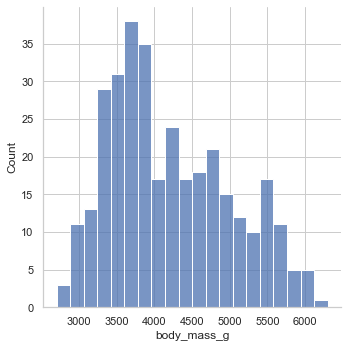

In [5]:
sns.displot(kind="hist", data=penguins, x="body_mass_g", bins=20)
plt.show()

- The density curve below shows the density of penguin body mass observations:

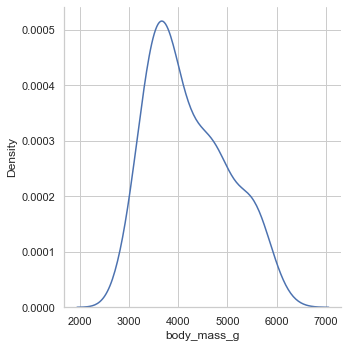

In [6]:
sns.displot(kind="kde", data=penguins, x="body_mass_g")
plt.show()

- The box plot below shows the distribution of penguin's body mass:

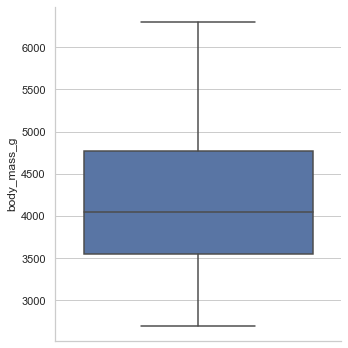

In [7]:
sns.catplot(kind="box", data=penguins, y="body_mass_g")
plt.show()

---

### 1 Categorical Variable

- **Frequency Table**---also called **one-way** table.  Shows frequency (count) of observations in each category.  Each unique category name is called a **level**.  We can also show relative frequency, which is a ratio or percent of whole.
- **Bar Chart**---each bar corresponds to a category.  The height of the bar corresponds to the count (frequency) of observations within each category.
- **Pie Chart**---each slice corresponds to a category.  The slice size corresponds to the count of the observations.  Less recommended than bar charts as harder to discern relative slice size and labels may overlap for small slices.

---

**EXAMPLES**

- The frequency table has the categorical variable "pet type". Levels are cat and dog.  Data is a list of observations: dog, dog, cat, cat, cat.

Level | Frequency (Count) | Relative Frequency (Percent)
--- | --- | ---
Cat | 3 | 60%
Dog | 2 | 40%

- The bar chart below shows the penguin frequency for each species:

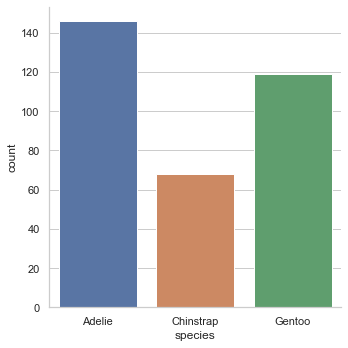

In [8]:
sns.catplot(kind="count", data=penguins, x="species")
plt.show()

- The bar chart below shows relative penguin frequency for each species:

     species  relative_frequency
0     Adelie            0.438438
2  Chinstrap            0.204204
1     Gentoo            0.357357


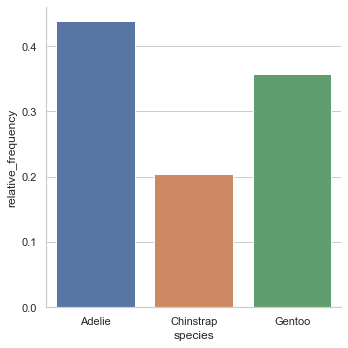

In [9]:
penguins_new = (penguins
                .value_counts(subset="species", normalize=True)
                .rename("relative_frequency")
                .reset_index()
                .reindex([0, 2, 1])
)
print(penguins_new)

sns.catplot(kind="bar", data=penguins_new, x="species", y="relative_frequency")
plt.show()   # Species in different order

---

### 2 Numerical Variables
- **Scatter Plot**---each point's location corresponds to an observation's two numerical values
- **Line Graph**--line made of connected points.  Points correspond to an observation's two numerical values.  Explanatory variable is often a continuous variable (like time) and response variable is a function of the explanatory variable (passes vertical line test).

---

**EXAMPLES**

- The scatter plot below shows a penguin as a point.  Its location is determined by its flipper length and body mass.

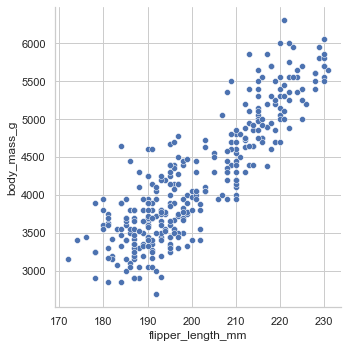

In [10]:
sns.relplot(kind="scatter", data=penguins, x="flipper_length_mm", y="body_mass_g")
plt.show()

- The line graph below connects the dots.  Point location is determined by the year and the number of passengers aboard flights.

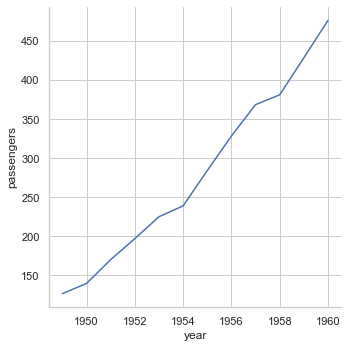

In [11]:
flights = sns.load_dataset("flights")
sns.relplot(kind="line", data=flights, x="year", y="passengers", ci=None)
plt.show()

---

### 1 Numerical & 1 Categorical
- **Bar Chart**---each bar corresponds to a category.  Bar height corresponds to the values of the numerical variable. Different from count bar chart above.
- **Box Plot**---see box blot above.  A single box plot for each category.
- **Violin**---uses density curve.  Different in that the density curve is mirrored around a center line.  Violin plots are often overlaid with box plots to show median and interquartile range.

---

**EXAMPLES**

- The bar chart below shows the average penguin mass on the y axis and the species on the x axis:

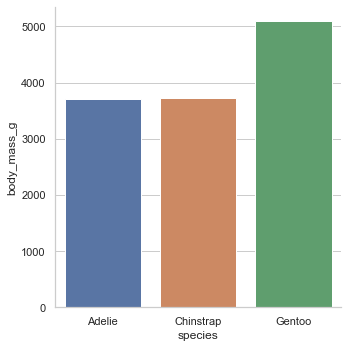

In [12]:
sns.catplot(kind="bar", data=penguins, x="species", y="body_mass_g", ci=False)
plt.show()

- The box plots below shows a 5 number summary for the mass of each penguin species:

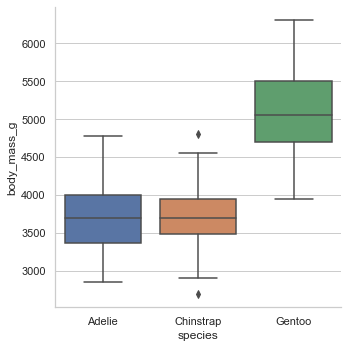

In [13]:
sns.catplot(kind="box", data=penguins, x="species", y="body_mass_g")
plt.show()

- The violin plot below shows the distribution of penguin masses for each species:

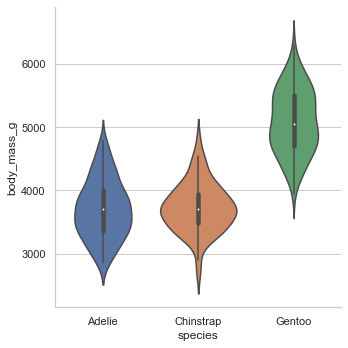

In [14]:
sns.catplot(kind="violin", data=penguins, x="species", y="body_mass_g")
plt.show()

---

### 2 Categorical Variables
- **Contingency Table**---also called a **two-way** frequency table.  Shows counts of two categorical variables.  Helps us see relationship between two variables.
    - E.g. In the table below the first categorical variable is email spam and the second is email format

![](pictures/contingency_table.jpg)

- Note that a contingency table is not "tidy" data as each row is not an observation and each column is not a variable.  We often must convert back and forth between contingency tables and tidy tables during analysis.
- **Segmented Bar Chart**---each bar corresponds to a category of variable A.  The bar is broken up into segments by categorical variable B.  The height is the count.  We can also create a bar plot with relative frequencies.  Seaborn does not have segmented bar charts as the library author does not like them (harder to compare between groups).  An alternative option is to use side by side count bar charts

---

**EXAMPLES**

- The bar plot below shows penguin frequency first split by species and then split by sex:

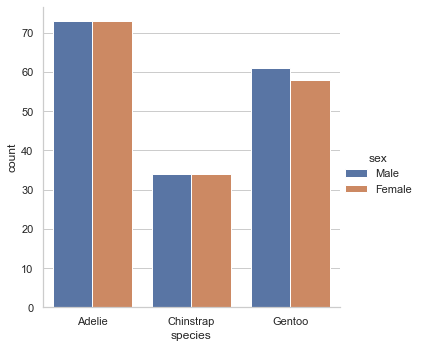

In [15]:
sns.catplot(kind="count", data=penguins, x="species", hue="sex")
plt.show()

- The bar plot below shows penguin relative frequency first split by species and then split by sex:

     species     sex  relative_frequency
1     Adelie    Male            0.219219
0     Adelie  Female            0.219219
5  Chinstrap    Male            0.102102
4  Chinstrap  Female            0.102102
2     Gentoo    Male            0.183183
3     Gentoo  Female            0.174174


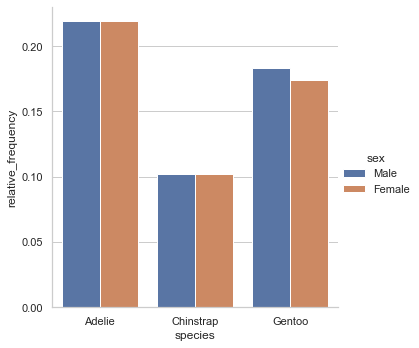

In [16]:
penguins_new = (penguins
                .value_counts(subset=["species", "sex"], normalize=True)
                .rename("relative_frequency")
                .reset_index()
                .reindex([1, 0, 5, 4, 2, 3])
)
print(penguins_new)

sns.catplot(kind="bar", data=penguins_new, x="species", y="relative_frequency", hue="sex")
plt.show()

---

### Modality
**Modality**---refers to the number of prominent peaks in a chart (around which mode is usually found).  Modality is not exact.  More of a rough, qualitative description.  

![](pictures/modality.jpg)

---

### Skew
- **Skew**---refers to the symmetry of the plot along the x-axis.  Skew can be determined qualitatively or quantitatively.  The "Fischer-Pearson" or "adjusted Fischer-Pearson" statistics can be calculated if a quantitative measurement is needed.
- **Symmetric**---plot is not skewed
    - Mean, median, and mode all occur in the middle of a symmetric distribution
    - Skew statistic is 0
- **Right/Positive Skew**---plot "tail" is longer on the right
    - Mode occurs near peak since the y-axis is count/frequency
    - Median occurs to right of peak as there are more records in tail to pull it right
    - Mean occurs furthest right as very large values in tail affect mean more than median
    - Skew statistic is positive
- **Left/Negative Skew**---plot "tail" is longer on the left.  
    - Mode occurs near peak since the y-axis is count/frequency
    - Median occurs to left of peak as there are more records in tail to pull it left
    - Mean occurs furthest left as very small values in tail affect mean more than median
    - Skew statistic is negative

![](pictures/skew.png)

---

### Kurtosis

- **Kurtosis**--describes the "tailedness" of distribution.  Describes the relative amount of outlying observations.
    - Larger kurtosis means there are relatively more observations in tails.  More outliers.
    - Smaller kurtosis means there are relatively less observations in tails.  Less outliers.
- **Kurtosis Excess**--compares kurtosis of distribution to kurtosis of normal distribution.
    - 0 kurtosis excess is the normal distribution
    - Negative kurtosis excess means that tails are thinner than the normal distribution
    - Positive kurtosis excess means that tails are thicker than the normal distribution
- The image below shows kurtosis excess:

![](pictures/kurtosis_excess.jpg)

---

# Probability

---

## Probability Jargon
- **Probability (Frequentist Interpretation)**---the proportion of times the outcome would occur if we repeated a process an infinite number of times.  Probabilities are between 0 and 1.
- **Probability (Bayesian)**---degree of belief based on personal perspective
- **Trial**---the "process".  User defines what a trial is.
  - E.g. trial = rolling the die once
  - E.g. trial = rolling the die twice in a row
- **Sample Space**---collection of all possible outcomes of a trial
  - E.g. for rolling a die once the outcomes are {1,2,3,4,5,6}
- **Outcome**---the result of a trial
  - E.g. each number in the sample space above is an outcome
- **Event**---one or more outcomes of a trial.  User defines the event of interest.  Symbolized with capital letter.
  - E.g. event A = {2} is rolled
  - E.g. event B = {2, 4, or 6} is rolled
- **Law of Large Numbers**---as more observations are collected, the proportion of occurrences with a particular event converges to the probability of that event

![](pictures/law_large_numbers.jpg)

- **Probability Distribution**---lists all possible outcomes in a sample space and the probabilities with which they occur.  They have 3 rules:
    1. Outcomes listed must be disjoint
    1. Each probability must be between 0 and 1
    1. The probabilities must total 1

![](pictures/prob_dist.jpg)

Types of Events

- **Disjoint**---mutually exclusive events.  Events can not happen at same time.  If events do not share any outcomes, they are disjoint. 
  - P(A AND B) = 0
  - E.g. on a single coin toss, getting a {heads} and a {tails}
  - **Complementary**---all disjoint outcomes of the same process that are NOT the event.  Probability of event and its compliment add to one.
    - P(A) + P(A^c^) = 1
    - E.g. on a single coin toss, if event is {heads}, the compliment is {tails}
- **Non-disjoint**---two events can happen at same time.  If events share one or more outcomes, they are non-disjoint.
  - E.g. choosing a single card that is both a Heart and a King
  
![](pictures/disjoint.jpg)

- **Independent**---outcome of one process does NOT affect outcome of the other process
  - E.g. outcomes of two coin tosses are non-disjoint and independent
  - E.g. choosing a King twice in a row with replacement is non-disjoint and independent
- **Dependent (Conditional)**---outcome of one process does affect the outcome of the other process.  Disjoint events are always dependent, since if one event occurs we know the other can not.
  - E.g. outcomes of a single coin toss are disjoint and dependent
  - E.g. choosing a King twice in a row w/OUT replacement is non-disjoint and dependent

- With so many terms, it can get confusing to know how to solve problems.  We'll present a decision tree and then define some of the methods below it.

![](pictures/prob_decision_flowchart.jpg)

---

## Basic Rule of Probability
- $\text{P(Event)} = \frac{\text{Number of ways event can happen}}{\text{Total number of outcomes}}$
  - E.g. P(rolling a "4" on a fair six sided die) = 1/6
  - E.g. P(Drawing a King) = 4/52

---

## Odds
- Probabilities can be re-expressed in terms of odds
- $O(A) = \frac{P(A)}{P(A^c)} = \frac{P(A)}{1- P(A)}$
  - E.g. if P(A) = P(rolling a "4" on a fair six-sided die) = 1/6, the odds of rolling a "4" is:
    - $O(A) = \frac{1/6}{1 - (1/6)} = \frac{1/6}{5/6} = \frac{1}{5} = 1 : 5 \text{ odds}$
- And of course we can work backwards from odds to a probability if needed
  - E.g. $1:5 = \frac{1}{1 + 5} = \frac{1}{6}$

---

## Expected Values
- When there is a random variable X that is a *continuous* variable our best guess (expected value) for X is the average of all the Xs
- When there is a random variable X that is a *discrete* variable our best guess (expected value) for X is a probability weighted average of all Xs.
  - E.g. the expected value of a six-sided die would be:
    - $(1 \cdot \frac{1}{6}) + (2 \cdot \frac{1}{6}) + (3 \cdot \frac{1}{6}) + (4 \cdot \frac{1}{6}) + (5 \cdot \frac{1}{6}) + (6 \cdot \frac{1}{6}) = 3.5 0$

---

## General Addition Rule
- $\text{P(A  OR  B) = P(A)  +  P(B)  -  P(A  AND  B)}$
- This is called union in set theory and is represented by the ($\cup$) symbol
- This rule can be used for the union of non-disjoint events
- This rule can also be used for the union of disjoint events. Disjoint events always have P(A AND B) = 0, so formula simplifies.

**Example Disjoint, Dependent Events**

- Find probability of a King OR an Ace given a single random card
- $\text{P(King  OR  Ace) = P(King)  +  P(Ace)  -  P(King AND Ace)} = \frac{4}{52} + \frac{4}{52} - \frac{0}{52} = \frac{8}{52}$

**Example Non-Disjoint, Independent Events**

- Find probability of a Heart OR a King given a single random card
- $\text{P(Heart  OR  King) = P(Heart)  +  P(King)  -  P(Heart AND King)} = \frac{13}{52} + \frac{4}{52} - \frac{1}{52} = \frac{16}{52}$

- We initially account for the shared outcome twice.  The King of Hearts was included in P(Heart) and in P(King). Subtracting P(Heart AND King) removes one duplicate of the shared outcomes so it is not double counted.

![](pictures/addition_rule.jpg)


---

## General Multiplication Rule
- $\text{P(A  AND  B) = P(A|B)  x  P(B)}$  OR
- $\text{P(A  AND  B) = P(B|A)  x  P(A)}$
- This is called intersection in set theory and is represented by the ($\cap$) symbol
- This rule is not needed for the intersection for disjoint events.  For disjoint events, P(A AND B) = 0.  Done
- This rule can be used for the intersection of non-disjoint events that are either independent and dependent
- If independent, then the P(A|B) = P(A).  Independence also means P(B|A) = P(B). 
  - When independent formula simplifies to $\text{P(A  AND  B) = P(A)  x  P(B)}$

**Example 1 Non-Disjoint Independent Events**

- Find probability of a Heart AND a King given a single random card
- $\text{P(Heart  AND  King) = P(Heart)  x  P(King)} = (\frac{13}{52})(\frac{4}{52}) = \frac{1}{52}$

**Example 2 Non-Disjoint Independent Events**

- Find probability of two Kings given two random cards WITH replacement
- $\text{P(King  AND  King) = P(King)  x  P(King)}) = (\frac{4}{52})(\frac{4}{52}) = \frac{1}{169}$

---

## Marginal And Joint Probability
- As shown in *2 Categorical Variables*, a contingency table is a table that shows frequencies of two categorical variables

![](pictures/study1.jpg)

- **Marginal Probability**---the "margins" of the table show the totals.  When one looks at the total for a single variable and uses this in a probability, it is called a **marginal probability**.
  - E.g. marginal probability of being a patient given a vaccine is 14/20 = 0.7
  - E.g. marginal probability of being a patient with an infection is 11/20 = 0.55
- **Joint Probability**---when we calculate probability using two variables.  This is what we are doing with the General Multiplication Rule (AND).
  - E.g. joint probability of infection AND vaccine is 5/20 = 0.25 = (5/14)(14/20)
  - E.g. Joint probability of no infection AND placebo is 0/20 = 0 = (0/6)(6/20)

---

## Conditional Probability
**Conditional Probability**---when we calculate probability under a certain condition

- Written as P(A|B)
- Read as "probability of event A given event B"
  - E.g. conditional probability of infection given vaccine is 5/14 = 0.36
  - E.g. conditional probability of infection  given placebo is 6/6 = 1

---

### Probability Tree
- Great way to visualize conditional probabilities
- The example below is for a coin toss.  Coin tosses are independent, but this is still a good example.

![](pictures/prob_tree_ind.jpg)

- The example below uses dependent events

![](pictures/prob_tree_dep.jpg)

- The probability on the leftmost branches is the marginal probability
  - E.g. P(1st Blue) = 2/5
- The probability of the middle branch is the conditional probability
  - E.g.P(2nd Blue|1st Blue) = 1/4
- The probability at the far right is the joint probability
  - This is also found using the General Multiplication Rule
  - E.g. P(2nd Blue AND 1st Blue) =  P(2nd Blue|First Blue) * P(First Blue)
  - E.g. P(2nd Blue AND 1st Blue) =  1/4 x 2/5 = 1/10
- The probability of pulling a blue on the second pull is an example of the **Law of Total Probability**
  - E.g. P(2nd Blue) = P(2nd Blue AND 1st Blue) + P(2nd Blue AND 1st Red)
  - E.g. P(2nd Blue) = (2/5)(1/4) + (3/5)(2/4) = 0.4
  - Notice that this is also the marginal probability. P(1st Blue).

- The below example shows a probability tree that first splits based on whether or not an individual has HIV (marginal probability).  It then splits based on whether an HIV test would return a positive or negative result (conditional probability).  On the far right it calculates joint probabilities.  On the right in the middle it calculates the probability an individual has HIV given a positive test.

![](pictures/prob_tree_hiv.jpg)

---

### False Positives and Negatives
- Probability trees are very useful for calculating the accuracy of medical tests.  There are a few terms related to this which are common in statistic examples.
    1. **False Positive**---positive test result when in reality do NOT have
    1. **False Negative**---negative test result when in reality DO have
    1. **Sensitivity**---true positive rate
    1. **Specificity**---true negative rate

![](pictures/false_neg_pos.jpg)

---

## Combinations and Permutations
- Combinations and permutations are used to help determine the total number of outcomes of a process or sequence of processes.  This is in turn used to calculate the probability of an event occurring.

1.  **Combination**---sequence of things where order does NOT matter
    - E.g. list of fruits in fruit salad
1. **Permutation**---ORDERED combination
    - E.g. safe combination (should really be called a safe permutation)

- If tasked to find the total number of possible outcomes, **good luck**! 
- It is based on whether order matters, whether outcomes are independent, how many outcomes we are choosing, etc.
- **Luckily**, data scientists do not often need to calculate these types of statistics
- If unlucky, check out the website [Math is Fun](https://www.mathsisfun.com/combinatorics/combinations-permutations.html) to learn terminology and the following flowchart from [this course](https://faculty.elgin.edu/dkernler/statistics/ch05/5-6.html) to help choose the correct method:


![](pictures/count_decision_flowchart.jpg)

![](pictures/comb_perm.jpg)

- Note that sometimes (like in the text *OpenIntro Statistics*) the variable $k$ is used in place of $r$

---

# Theoretical Probability Distributions

---

## Introduction
- **Sample distribution**--frequency or relative frequency (proportions) of observation values in a *sample*.  Distributions are commonly visualized with a histogram or density plot.
    - We can calculate sample statistics like the sample mean.  We can also treat the proportions as probabilities of observing values in that *sample*.  These are commonly found with the percentile.  Unfortunately, neither of these are too helpful as we really want to know about the population.
- **Population distribution**--frequency or relative frequency (proportions) of observation values in a *population*
    - We can calculate population statistics like the population mean.  We can also treat proportions as probabilities of observing values in that *population*.  Both are very useful.  Unfortunately we often do NOT have data for an entire *population*.
- **Theoretical probability distribution**--distribution defined by mathematical function that describes a theoretical population
    - E.g. normal distribution
- **Parameters**--numbers that define the shape of the population distribution or the theoretical probability distribution.
    - E.g. population mean ($\mu$) and population standard deviation ($\sigma$)
    - E.g. normal distribution($\mu$, $\sigma$) 
- Theoretical probability distributions are helpful in two situations:
    1. If we do NOT have observation data for an entire population, DO know the population parameters, and DO know that the population distribution shape matches that of a theoretical probability distribution, then we can use the theoretical probability distribution to easily calculate the probabilities of observation values.
    1.  If we do NOT have observation data for an entire population, do NOT know the population parameters, but DO have sample data, then we can incorporate theoretical probability distributions in inference to estimate population parameters.

---

## Common Distributions

- The image below shows visualization of common theoretical probability distributions:

![](pictures/distributions.jpg)

- The image below shows common theoretical probability distributions.  The left column contains the name and parameter variables.  The next describes whether the distribution is discrete or continuous.  The next shows PMF or PDF functions, which define the shape of the distribution.  The last two columns show formulas for computing the mean and variance of those distributions.

![](pictures/dist_param.png)

---

## Random Variables
- Theoretical probability distributions are divided based on random variable type
- **Random variable**--variable that takes on different values determined by chance.  I.e. quantity that varies at random.
- There are two types of random variables:
    1. **Discrete random variable**--variable whose values are either finite or countable.  Values typically generated from counting.
        - E.g. number of of defective light bulbs in box.  Sample space is {0, 1, 2, 3, or 4}
    1. **Continuous random variable**--variable that may take on any value in an interval.  Values typically generated from measurement.
        - E.g. amount of time until light bulb burns out.  Sample space is {0 <= x <= 200} 
- *Note that when we are talking about distributions both "categorical variables" and "discrete variables" are called "discrete random variables".  This is because we can count the number of things within categories.  This generates count data (discrete numerical data).  "Continuous variables" are treated as "continuous random variables" as expected.*

---

## Distribution Functions
-  We'll cover:
    - Probability Mass Function (PMF)
    - Probability Density Function (PDF)
    - Cumulative Distribution Functin (CDF)
    - Percent Point Function (PPF) = Inverse CDF (ICDF)
    - Survival Function (SF)
    - Inverse Survival Function (ISF)
    - Calculus in a nutshell as to better understand the idea of integration
    - SciPy functions for these statistics

---

### PMF & PDF
- Theoretical probability distributions are defined by either of two functions, the PMF or PDF.  These two functions  give distributions their characteristic shapes and properties.  They are also used to calculated statistics about individual points in the distribution.

1. **Probability Mass Function (PMF)**--maps value to probability of observing that value.  Discrete variables use PMF.  Visualized as histogram.  We can look at a single discrete value along the x-axis and the height of the bar tells us the probability of getting that x value.  If we took the sum of all the bars in the histogram it would add up to 1.  This is because probability always sums to 1. 
    - E.g. geometric distribution, binomial distribution, negative binomial distribution, Poisson distribution, etc.
1. **Probability Density Function (PDF)**---maps value to its probability density.  Continuous variables use PDFs.  Visualized with density curve.  Probability *density* is NOT the same as probability.  Probability *density* is how much probability is concentrated near the x value.  The height of the curve is the probability *density* and can actually be over 1!  Meanwhile, if we look at a single continuous value along the x-axis the probability of getting that value is zero!  This has to do with continuous variables having an infinite amount of possible values, which means that the probability of getting any single value is infinitely small.  The probability of observing a value within a specified *range* of values is the area under the curve between those two numbers (the *integral*).  While the probability of an entire histogram *sums* to 1, the probability density of the entire curve *integrates* to 1.  Integration must be used in conjunction with the PDF.  Statistical software often places this feature within another function called the cumulative density function.
    - E.g. normal distribution, uniform distribution, beta distribution, gamma distribution, etc.

- The image below shows a PMF for binomial distribution.  The y-axis shows probability.

![](pictures/pmf.png)

- The image below shows a PDF for a normal distribution.  The y-axis shows probability density.

![](pictures/normal_dist_density.png)

- Note that some people use the term PDF for both PMFs and PDFs. We’ll often call everything a probability distribution unless it is important to make a distinction between PMF and PDF.

---

### CDF, PPF, SF, & ISF
- Other functions are used to calculate statistics
- **Cumulative Distribution Function (CDF)**--returns the *percentile* (expressed as a proportion) of the distribution at the specified quantile.  This percentile is also called **cumulative probability**.
- The term CDF is used for both discrete variables and continuous variables.  For discrete variables CDF is calculated using addition.  For continuous variables the CDF is calculated using integration.

- The following image shows a CDF for a discrete variable

![](pictures/cdf_discrete.png)

- The following image shows a CDF for a continuous variable

![](pictures/cdf.png)

- **Percent Point Function (PPF)**--also called the inverse CDF, or ICDF.  Returns the *quantile* of the distribution at the specified percentile (expressed as a proportion).
- **Survival Function (SF)**--similar to CDF.  Return is similar to percentile, but returns the probability of obtaining a value *larger* than the specified quantile. It can also be interpreted as the proportion of data “surviving” above a certain value.  Compliment of the CDF as $CDF+SF=1$.  I.e. upper tail version of the CDF.  
- **Inverse Survival Function (ISF)**--similar to ICDF.  Return is similar to quantile, but returns the quantile for a specified probability of "survival".  I.e. upper tail version of the ICDF.    
- The image below shows CDF, PPF (ICDF), SF, and ISF for a standard normal distribution.  Function inputs are on the x-axis and function outputs are on the y-axis.

![](pictures/cdf_ppf_sf_isf.png)

- **Note that specified quantiles or specified percentiles may be treated as inclusive or exclusive bounds by formulae within statistical software.  Often, but not always CDF and PPF treat the specified quantile or percentile as inclusive.  This may differ for SF and ISF.  This consideration is not typically important for continuous variables, but very important for discrete variables.**

---

### Calculus in a Nutshell

- To better understand PDFs and CDFs, we present calculus...in a nutshell!

![](pictures/Calculus.jpg)

- **Differentiation**---the process of finding the derivative.  The **derivative** is the change in y divided by the change in x as the change in x approaches zero.  X is often time.  The change in x never quite reaches zero (zero is the limit) because if there is no change in x there is no change in y.  Also, we can't divide by zero. The derivative is also described as the instantaneous rate of change. It is the slope at one point in time.   It is the slope of a line tangent to our point on the graph.   One must find the derivative before one can find the integral.
- **Integration**---the process of finding the integral.  It is fancy multiplication. Multiplication is repeated addition.  3y=y+y+y.  But what if *y* is constantly changing? Integration is repeated addition of a constantly changing value over a given time frame. This sum is the **integral**. If graphed it is said to be the area under the curve.

---

### SciPy Distribution Functions
- SciPy functions for working with distributions follow a shared workflows.  We'll use the frozen distribution workflow.  When a probability distribution object is created, it has fixed parameters.
- Steps include:
    1. Import stats module
    1. Create a distribution object. Functions used to create these objects use shortened probability distribution for their names.  Arguments represent distribution parameters and are different for different distributions.
    1. Apply distribution object method

---

Code | Use
--- | ---
`import scipy.stats` | Import SciPy stats module
`scipy.stats.norm(loc=<POP_MEAN>, scale=<POP_SD>)` | Creates an object representing a normal distribution.  `loc=` is  $\mu$ and `scale=` is $\sigma$.
`scipy.stats.binom(n=<TRIALS>, p=<PROBABILITY_SUCCESS>)` | Creates an object representing a binomial distribution.  `n=` is number of trials and `p=` is probability of success per trial.    
`.mean()`, `.var()`, `.std()` | Distribution object methods.  Returns mean, variance, or standard deviation.
`.stats(moments="mv")` | Distribution object method.  Returns mean ("m"), variance ("v"), Fisher's skew ("s"), or Fisher's kurtosis ("k").  By default returns mean and variance.
`.cdf(<QUANTILE>)` | Distribution object method.  Cumulative distribution function.  Used for both continuous and discrete variables.
`.ppf(<PERCENTILE>)` | Distribution object method.  Percent point function.  Used for continuous variables. Less useful for discrete variables as percentiles do not map exactly to quantiles.
`.pmf(<NUMBER_SUCCESSES>)` | Distribution object method.  Probability mass function. Argument is the number of successes ($k$). Only used for discrete variables.
`.pdf(<QUANTILE>)` | Distribution object method.  Probability density function.   Only used for continuous variables.  Because it returns a density instead of a probability, it is less useful than `.cdf()` or `.ppf()`.  These incorporate integration and work with probabilities.
`.sf(<QUANTILE_LIKE>)` | Distribution object method.  Survival function.  Used for both continuous and discrete variables.
`.isf(<PERCENTILE_LIKE>)` | Distribution object method.  Inverse survival function.  Used for continuous variables. Less useful for discrete.
`.rvs(size=#, random_state=None)` | Distribution object method.  Returns a NumPy array of randomly selected values from the distribution (*random variates*).  Size indicates the number of values we want to return.  Random state is the seed.  If set to a positive integer, whenever this function is run, it will return the same results.  It is advised to not use common, small, integers like 0, 1, 2, 3, etc..  This would create bias in results if researchers all used these seeds.

---

## Normal Distribution
- Also called **Gaussian Distribution**
- Theoretical, symmetric, unimodal, bell-shaped, probability density function
- Real-life frequency distributions (histogram bars) may follow a normal distribution
  - E.g. heights of people, errors in measurement, blood pressure, marks on tests
- The image below shows a normal distribution histogram:

![](pictures/normal_dist_histogram.jpg)

- The shape of the normal curve is determined by the mean and the standard deviation
  - The mean shifts the entire chart horizontally
  - The standard deviation compresses or stretches the curve
  - Symbolized by N($\mu$ = #, $\sigma$ = #)
 - The following picture shows two normal distributions with different means and standard deviations

![](pictures/normal_dist_shapes.jpg)

- Though appearance varies, the rules for a normal distribution are:
    1. ~68% of observations fall within (+-) 1 sd from the mean
    2. ~95% of observations fall within (+-) 2 sd from the mean
    3. ~99.7% of observations fall within (+-) 3 sd from the mean

- The graph below shows a normal distribution:

![](pictures/normal_dist.jpg)

---

**EXAMPLES**

**Create Distribution Object**

In [17]:
normal_object = stats.norm(loc=150, scale=10)
print(type(normal_object))

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


**Statistics**

In [18]:
print(normal_object.mean())

150.0


In [19]:
print(normal_object.var())

100.0


In [20]:
print(normal_object.std())

10.0


In [21]:
my_mean, my_variance, my_skew, my_kurtosis = normal_object.stats(moments="mvsk")
print(f'The mean is:  {my_mean}')
print(f'The variance is:  {my_variance}')
print(f'The skew is:  {my_skew}')
print(f'The kurtosis is:  {my_kurtosis}')

The mean is:  150.0
The variance is:  100.0
The skew is:  0.0
The kurtosis is:  0.0


**CDF Returns Percentile**

In [22]:
cdf_at_three_sd_neg = normal_object.cdf(120)
print(f'Percentile at -3 SD is:  {cdf_at_three_sd_neg}')
cdf_at_two_sd_neg = normal_object.cdf(130)
print(f'Percentile at -2 SD is:  {cdf_at_two_sd_neg}')
cdf_at_one_sd_neg = normal_object.cdf(140)
print(f'Percentile at -1 SD is:  {cdf_at_one_sd_neg}')
cdf_at_mean = normal_object.cdf(150)
print(f'Percentile at 0 SD is: {cdf_at_mean}')
cdf_at_one_sd_pos = normal_object.cdf(160)
print(f'Percentile at 1 SD is: {cdf_at_one_sd_pos}')
cdf_at_two_sd_pos = normal_object.cdf(170)
print(f'Percentile at 2 SD is: {cdf_at_two_sd_pos}')
cdf_at_three_sd_pos = normal_object.cdf(180)
print(f'Percentile at 3 SD is: {cdf_at_three_sd_pos}')

Percentile at -3 SD is:  0.0013498980316300933
Percentile at -2 SD is:  0.022750131948179195
Percentile at -1 SD is:  0.15865525393145707
Percentile at 0 SD is: 0.5
Percentile at 1 SD is: 0.8413447460685429
Percentile at 2 SD is: 0.9772498680518208
Percentile at 3 SD is: 0.9986501019683699


In [23]:
print(f'Probability within 1 SD is:{round(cdf_at_one_sd_pos - cdf_at_one_sd_neg, 4)}')  # Should be ~ 0.6827
print(f'Probability within 2 SD is:{round(cdf_at_two_sd_pos - cdf_at_two_sd_neg, 4)}')  # Should be ~ 0.9545
print(f'Probability within 3 SD is:{round(cdf_at_three_sd_pos - cdf_at_three_sd_neg, 4)}')  # Should be ~ 0.9973

Probability within 1 SD is:0.6827
Probability within 2 SD is:0.9545
Probability within 3 SD is:0.9973


**PPF Returns Quantile**

In [24]:
ppf_at_three_sd_neg = normal_object.ppf(0.0013498980316300933)
print(f'Quantile at -3 SD is:  {ppf_at_three_sd_neg}')
ppf_at_two_sd_neg = normal_object.ppf(0.022750131948179195)
print(f'Quantile at -2 SD is:  {ppf_at_two_sd_neg}')
ppf_at_one_sd_neg = normal_object.ppf(0.15865525393145707)
print(f'Quantile at -1 SD is:  {ppf_at_one_sd_neg}')
ppf_at_mean = normal_object.ppf(0.50)
print(f'Quantile at 0 SD is: {ppf_at_mean}')
ppf_at_one_sd_pos = normal_object.ppf(0.8413447460685429)
print(f'Quantile at 1 SD is: {ppf_at_one_sd_pos}')
ppf_at_two_sd_pos = normal_object.ppf(0.9772498680518208)
print(f'Quantile at 2 SD is: {ppf_at_two_sd_pos}')
ppf_at_three_sd_pos = normal_object.ppf(0.9986501019683699)
print(f'Quantile at 3 SD is: {round(ppf_at_three_sd_pos, 4)}')

Quantile at -3 SD is:  120.0
Quantile at -2 SD is:  130.0
Quantile at -1 SD is:  140.0
Quantile at 0 SD is: 150.0
Quantile at 1 SD is: 160.0
Quantile at 2 SD is: 170.0
Quantile at 3 SD is: 180.0


In [25]:
ppf_at_3rd_quantile = normal_object.ppf(0.75)
ppf_at_1st_quantile = normal_object.ppf(0.25)

print(f'IQR is:  {ppf_at_3rd_quantile - ppf_at_1st_quantile}')

IQR is:  13.489795003921643


**SF Returns Upper Tail Percentile**

In [26]:
cdf_at_one_sd_pos = normal_object.cdf(160)
print(f'CDF finds lower tail percentile.  At 1 SD this is: {cdf_at_one_sd_pos}')
sf_at_one_sd_pos = normal_object.sf(160)
print(f'SF finds the upper tail percentile.  At 1 SD this is:  {sf_at_one_sd_pos}')
my_sum = cdf_at_one_sd_pos + sf_at_one_sd_pos
print(f'Lower tail percentile and upper tail percentile are complements and thus add to:  {my_sum}')

CDF finds lower tail percentile.  At 1 SD this is: 0.8413447460685429
SF finds the upper tail percentile.  At 1 SD this is:  0.15865525393145707
Lower tail percentile and upper tail percentile are complements and thus add to:  1.0


**ISF Returns Upper Tail Quantile**

- PPF (ICDF) and ISF both receive proportions, but treat them differently
- PPF treats the proportion as the proportion below the quantile (lower tail)
- ISF treats the proportion as the proportion above the quantile (upper tail)

In [27]:
ppf_at_one_sd_pos = normal_object.ppf(0.8413447460685429)  # Input same proportion
print(f'PPF finds the lower tail quantile: {ppf_at_one_sd_pos}')
isf_at_one_sd_pos = normal_object.isf(0.8413447460685429)  # Input same proportion
print(f'ISF find the upper tail quantile: {isf_at_one_sd_pos}')

PPF finds the lower tail quantile: 160.0
ISF find the upper tail quantile: 140.0


**Random Sample**

In [28]:
random_sample = normal_object.rvs(size=10, random_state=79572513)  # sample size = 10
print(type(random_sample))
print(random_sample)

<class 'numpy.ndarray'>
[154.40860502 152.70297909 147.22809174 159.29811799 139.07679632
 158.10970236 142.45837106 144.46421866 169.9088042  159.99821034]


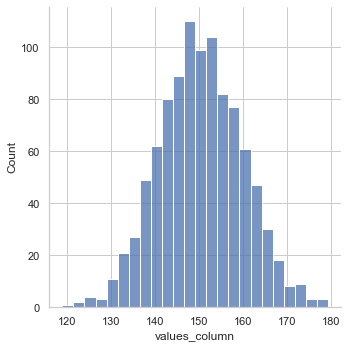

In [29]:
random_sample = normal_object.rvs(size=1000, random_state=79572513)  # sample size = 1000
my_data_frame = pd.DataFrame({"values_column": random_sample})
sns.displot(data=my_data_frame, kind="hist", x="values_column")
plt.show()

**Hypothetical Example**
- The average height for a man in the U.S. is about 5'10" (70").  The standard deviation is about 3".  What is the percentile of a man who is 5'8" (68")?  What is the median height?

In [30]:
# Input population pararmeters
my_observation = 68
my_mean = 70
my_sd = 3

# Create distribution object
normal_object = stats.norm(loc=my_mean, scale=my_sd)

# Calculate percentile
probability = normal_object.cdf(my_observation)

print(f'The percentile (as a proportion) is:  {round(probability, 4)}.')
print(
    f'There is a {round(probability, 4)} probability that a randomly '
    f'sampled U.S. male is less than or equal to {my_observation} inches.'
)
      
# Calculate quantile at 50th percentile (median)
my_median = normal_object.ppf(0.50)

print(f'The median is:  {my_median}.')
print(
    'There is a 0.50 probability that a randomly '
    f'sampled U.S. male is less than or equal to {my_median} inches'
)      

The percentile (as a proportion) is:  0.2525.
There is a 0.2525 probability that a randomly sampled U.S. male is less than or equal to 68 inches.
The median is:  70.0.
There is a 0.50 probability that a randomly sampled U.S. male is less than or equal to 70.0 inches


---

### Standard Normal Distribution
- **Z-Score**---also called standard score.  Number of standard deviations the observation falls from the population mean.  These are quantiles.
- Z-Score is calculated by taking an observation, subtracting the population mean, then dividing this difference by the population standard deviation
- $\text{Z-Score} = \frac{x - \mu}{\sigma}$
- If an observation has a Z-score above 2 or below -2, then it is said to be "unusual".  This means there is less than a 5% probability of it occurring.
- **Standard Normal Distribution**---when all observations in a normal distribution are converted into their Z-Score (standard score) and their relative frequencies are graphed with a density curve.  Alternatively defined with PDF for normal distribution: N($\mu$=0, $\sigma$=1).
- The image below shows how a distribution is standardized:

![](pictures/standard_normal_dist.jpg)

- The Z-Score (quantile) can be converted to a percentile with the CDF function.  A percentile can converted into a Z-Score (quantile) with the ICDF function.  A standard normal distribution table can also be used if we are a luddite.
- We can use CDF at two specified quantiles (e.g. ~ -2 sd and ~ 2 sd in a standard normal distribution) and return percentiles (e.g. 2.5% and 97.5%).  If we subtract the smaller percentile form the larger percentile we calculate the probability within this quantile interval (e.g. 95%).
- The image below finds probability within +-1 sd in a standard normal distribution

![](pictures/cumulative_distribution.jpg)

- We can use ICDF at two specified percentiles (e.g. 2.5% and 97.5% in a standard normal distribution) and return quantiles (e.g. ~ -2 sd and ~ +2 sd).  The quantile interval contains a certain percentage of the observations (e.g. 95%).
- We can repeat this calculations to find the quantile intervals needed to contain different amounts of observations.  This concept will be key for constructing parametric confidence intervals later on.
    - 90% of observations are within +- 1.645 quantiles (Z-Scores)
    - 95% of observations are within +- 1.960 quantiles (Z-Scores)
    - 99% of observations are within +- 2.576 quantiles (Z-Scores)
- The image below displays the use of many functions.  Top image is standard normal distribution defined by a PDF, middle images are CDF and SF functions that find percentiles, and bottom images are ICDF and ISF that find quantiles.  We have chosen to display intervals that capture 95% of observations as this is common in inference.

![](pictures/cdf_ppf_sf_isf_95.png)

---

**EXAMPLES**

In [31]:
normal_object = stats.norm(loc=0, scale=1)  # Create standard normal distribution

**CDF Returns Percentile**

In [32]:
cdf_at_three_sd_neg = normal_object.cdf(-3)
print(f'Percentile at -3 SD is:  {cdf_at_three_sd_neg}')
cdf_at_two_sd_neg = normal_object.cdf(-2)
print(f'Percentile at -2 SD is:  {cdf_at_two_sd_neg}')
cdf_at_one_sd_neg = normal_object.cdf(-1)
print(f'Percentile at -1 SD is:  {cdf_at_one_sd_neg}')
cdf_at_mean = normal_object.cdf(0)
print(f'Percentile at 0 SD is: {cdf_at_mean}')
cdf_at_one_sd_pos = normal_object.cdf(1)
print(f'Percentile at 1 SD is: {cdf_at_one_sd_pos}')
cdf_at_two_sd_pos = normal_object.cdf(2)
print(f'Percentile at 2 SD is: {cdf_at_two_sd_pos}')
cdf_at_three_sd_pos = normal_object.cdf(3)
print(f'Percentile at 3 SD is: {cdf_at_three_sd_pos}')

Percentile at -3 SD is:  0.0013498980316300933
Percentile at -2 SD is:  0.022750131948179195
Percentile at -1 SD is:  0.15865525393145707
Percentile at 0 SD is: 0.5
Percentile at 1 SD is: 0.8413447460685429
Percentile at 2 SD is: 0.9772498680518208
Percentile at 3 SD is: 0.9986501019683699


In [33]:
print(f'Probability within 1 SD is:{round(cdf_at_one_sd_pos - cdf_at_one_sd_neg, 4)}')  # Should be ~ 0.6827
print(f'Probability within 2 SD is:{round(cdf_at_two_sd_pos - cdf_at_two_sd_neg, 4)}')  # Should be ~ 0.9545
print(f'Probability within 3 SD is:{round(cdf_at_three_sd_pos - cdf_at_three_sd_neg, 4)}')  # Should be ~ 0.9973

Probability within 1 SD is:0.6827
Probability within 2 SD is:0.9545
Probability within 3 SD is:0.9973


**PPF Returns Quantile**

In [34]:
ppf_at_three_sd_neg = normal_object.ppf(0.0013498980316300933)
print(f'Quantile at -3 SD is: {round(ppf_at_three_sd_neg, 4)}')
ppf_at_two_sd_neg = normal_object.ppf(0.022750131948179195)
print(f'Quantile at -2 SD is: {round(ppf_at_two_sd_neg, 4)}')
ppf_at_one_sd_neg = normal_object.ppf(0.15865525393145707)
print(f'Quantile at -1 SD is: {ppf_at_one_sd_neg}')
ppf_at_mean = normal_object.ppf(0.50)
print(f'Quantile at 0 SD is: {ppf_at_mean}')
ppf_at_one_sd_pos = normal_object.ppf(0.8413447460685429)
print(f'Quantile at 1 SD is: {round(ppf_at_one_sd_pos,4)}')
ppf_at_two_sd_pos = normal_object.ppf(0.9772498680518208)
print(f'Quantile at 2 SD is: {round(ppf_at_two_sd_pos,4)}')
ppf_at_three_sd_pos = normal_object.ppf(0.9986501019683699)
print(f'Quantile at 3 SD is: {round(ppf_at_three_sd_pos, 4)}')

Quantile at -3 SD is: -3.0
Quantile at -2 SD is: -2.0
Quantile at -1 SD is: -1.0
Quantile at 0 SD is: 0.0
Quantile at 1 SD is: 1.0
Quantile at 2 SD is: 2.0
Quantile at 3 SD is: 3.0


---

### Normal Probability Plot
- The normality of a dataset can be visualized with a histogram, box plot, density curve, or normal probability plot
- **Normal Probability Plot**---is a scatterplot with actual data values (often on the y-axis) and theoretical Z-Scores following a normal distribution (often on the x-axis)
- **Q-Q Plot**---another name for the normal probability plot.  Called Q-Q because we plot observed data quantiles against theoretical Z-Score quantiles.
- **P-P Plot**--plot observed cumulative distribution against theoretical cumulative distribution.  Less common than Q-Q plot.
- If the points form a straight line then the actual data is normally distributed

To create a normal probability plot:

1. For the y-axis, mark the location of each observation/actual data quantile.  Y-axis done.
1. For the X-axis, generate perfect normal distribution of Z-Scores using the same number of Z-Scores as actual data observations
1. Match each observation (going lowest to highest) with theoretical Z-Score and plot on the graph.

**Creating Q-Q Plot**

![](pictures/normal_plot_dashes.jpg)

-  The following image shows a normal probability plot for the heights of NBA basketball players.  There is a stair step effect because real life values were only recorded in whole inches. 

**Q-Q Plot**

![](pictures/normal_plot.jpg)

- Points on the normal probability plot that are not straight tell us how the actual distribution differs from a perfectly normal distribution
- Small sample sizes will always create crooked lines, even if the sample is from a population with a normal distribution

**Reading Q-Q Plots**

![](pictures/normal_plot_skew.jpg)

- There are numerical normality tests such as the Shapiro-Wilk test, the D'Agostino's K^2 test, or the Anderson-Darling test

---

Code | Use
--- | ---
`sm.qqplot(<OBSERVED_QUANTILES>, fit=True, line='45')` | Create Q-Q plot.  Observed quantiles must be in 1D array-like form such as a Pandas series.  Argument `fit=True` enables the library to automatically create the distribution of theoretical quantiles.  Argument `line=` can be `"45"`, `"s"`, `"r"`, `"q"`, or `None`.  

---

**EXAMPLES**

- The following Q-Q plot shows "sample quantiles" on the y-axis.  These are penguin mass observation values.  The "theoretical quantiles" are automatically created by the library.  This Q-Q shows a non-normal distribution with right skew with short tails.  We'll verify this by creating a histogram

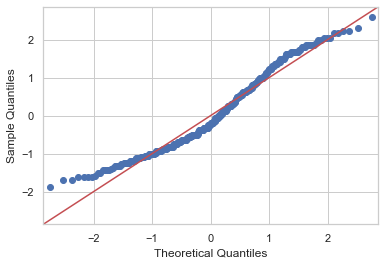

In [35]:
sm.qqplot(penguins["body_mass_g"], fit=True, line="45")
plt.show()

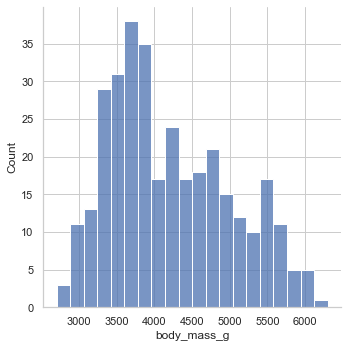

In [36]:
sns.displot(kind="hist", data=penguins, x="body_mass_g", bins=20)
plt.show()

---

## Bernoulli Distribution
- **Bernoulli Trial**---trial with two, disjoint, possible outcomes
- **Success**---outcome of trial that we decide to label success.  Symbolized with "1".
- **Failure**---outcome of trial that we decide to label failure.  Symbolized with a "0".
- **Probability of Success**---symbolized with $p$
- **Probability of Failure**---symbolized with $q = 1-p$
- **Bernoulli Distribution**--- theoretical distribution that shows the probability of success and failure for a single Bernoulli Trial

**Bernoulli Distribution Chart**

![](pictures/dist_bernoulli_chart.jpg)

**Bernoulli Distribution Formulas**
![](pictures/dist_bernoulli.jpg)

- When a categorical variable has two levels we may be able to use the Bernoulli distribution.  We arbitrarily define one level as success and one level as failure.
    - E.g. variable is coin side with levels head and tail.  We label head as success and tail as failure.  The probability of success is 0.5 for a fair coin.
    - E.g. variable is gender with levels male and female.  We label female as success and male as failure.  The probability of success is the proportion of females in the population.
- When a categorical or discrete variable has three or more levels we may be able to use the Bernoulli distribution.  We arbitrarily group outcomes into one level to define as success and group outcomes into another level to define as a failure.
    - E.g. variable is die number with levels one, two, three...We label one or two a success and three, four, five, or six a failure.  The probability of success on a fair die is 2/6. 
    - E.g. variable is fruit color with levels red, orange, etc.  We label red or orange a success and yellow, green, blue, or purple a failure.  The probability of success is the proportion of red or orange fruits in the population.
- Bernoulli variables are a simple concept used to build more complex theoretical probability distributions.  Used in:
  1. Geometric Distributions
  1. Binomial Distributions
  1. Negative Binomial Distributions
  1. Poisson

---

## Geometric Distribution
- Theoretical probability distribution that uses Bernoulli random variables
- **Describes the number of independent trials it takes to observe the first success**
- **Independent**---each trial does not affect another
- **Identically Distributed**---each trial has the same probability of success (it does not change through time as we sample)
- The probability for a geometric distribution decreases exponentially
- The Geometric distribution will always be right skewed and can never be approximated by the normal distribution

There are three conditions that must be true to use a geometric distribution

1. Trials are independent
1. Each trial outcome can be classified as a *success* or *failure*
1. Probability of a success, $p$, is the same for each trial

**Geometric Distribution Chart**

![](pictures/geom_dist.jpg)

**Geometric Distribution Formulas**

![](pictures/dist_geom.jpg)

---

**EXAMPLES**

**Hypothetical Example**

- Find the expected value (mean) number of times it would take to roll a four while using a six sided die

In [37]:
# Input parameters
my_p = 1/6

# Calculate expected
my_expected = 1/my_p

print(f"We expect it to take {my_expected} rolls on average to get the first 4.")

We expect it to take 6.0 rolls on average to get the first 4.


**Hypothetical Example**

- Find the probability of rolling a four for the first time on the 10th roll of the die

In [38]:
# Input parameters
my_p = 1/6
my_n = 10

# Create distribution object
geom_object = stats.geom(p=my_p)

# Calculate probabilty
probability = geom_object.pmf(my_n)
print(
    'The probability of rolling a four for the first time '
    f'on roll {my_n} of the die is {round(probability, 4)}.'
)

The probability of rolling a four for the first time on roll 10 of the die is 0.0323.


- Note that this could also be found using the General Multiplication Rule.  Because these are independent events we would multiply P(A) X P(B) X P(C), etc.  We would ask the question what is the probability of rolling a number other than four nine times in a row and then rolling a four.

In [39]:
probability_10th_try = ((5/6)**9) * (1/6)
print(
    'The probability of rolling a four for the first time '
    f'on roll {my_n} of the die is {round(probability_10th_try, 4)}.'
)

The probability of rolling a four for the first time on roll 10 of the die is 0.0323.


---

## Binomial Distribution
- Theoretical probability distribution that uses Bernoulli random variables
- **Describes the number of successes in a fixed number of independent trials**
- A little more complicated than the Geometric Distribution.  In the Geometric Distribution there is really only one way to calculate it.  
  - E.g. find the probability of succeeding for the first  time on  the second trial:
    - P(Fail) AND P(Succeed)
- The Binomial Distribution must account for different orders of Success and Failure
  - E.g. find the probability of succeeding once in two trials:
    - P(Success) AND P(Fail) OR
    - P(Fail) AND P(Success)

There are four conditions that must be true to use a binomial distribution

1. Trials are independent
1. Number of trials, $n$, is fixed
1. Each trial outcome can be classified as a *success* or *failure*
1. Probability of a success, $p$, is the same for each trial

**Binomial Distribution Chart**

![](pictures/dist_binom_graph.jpg)

**Binomial Distribution Formulas**

![](pictures/dist_binom.jpg)

---

**EXAMPLES**

**Create Distribution Object**

In [40]:
binomial_object = stats.binom(n=8, p=1/6)
print(type(binomial_object))

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


**Random Sample**

In [41]:
random_sample = binomial_object.rvs(size=8, random_state=97755331)  # sample size = 10
print(type(random_sample))
print(random_sample)

<class 'numpy.ndarray'>
[0 2 2 0 1 1 1 3]


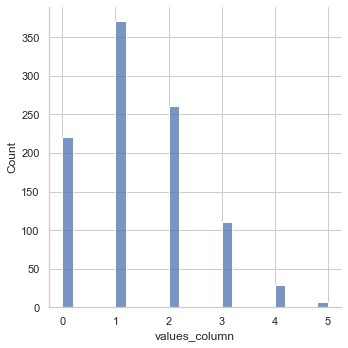

In [42]:
random_sample = binomial_object.rvs(size=1000, random_state=97755331)  # sample size = 1000
my_data_frame = pd.DataFrame({"values_column": random_sample})
sns.displot(data=my_data_frame, kind="hist", x="values_column")
plt.show()

**CDF Returns Percentile**

In [43]:
cdf_binomial_0 = binomial_object.cdf(0)
print(f'Percentile of 0 or fewer successes is:  {round(cdf_binomial_0, 3)}')
cdf_binomial_1 = binomial_object.cdf(1)
print(f'Percentile of 1 or fewer successes is:  {round(cdf_binomial_1, 3)}')
cdf_binomial_2 = binomial_object.cdf(2)
print(f'Percentile of 2 or fewer successes is:  {round(cdf_binomial_2, 3)}')
cdf_binomial_3 = binomial_object.cdf(3)
print(f'Percentile of 3 or fewer successes is:  {round(cdf_binomial_3, 3)}')
cdf_binomial_4 = binomial_object.cdf(4)
print(f'Percentile of 4 or fewer successes is:  {round(cdf_binomial_4, 3)}')
cdf_binomial_5 = binomial_object.cdf(5)
print(f'Percentile of 5 or fewer successes is:  {round(cdf_binomial_5, 3)}')
cdf_binomial_6 = binomial_object.cdf(6)
print(f'Percentile of 6 or fewer successes is:  {round(cdf_binomial_6, 3)}')
cdf_binomial_7 = binomial_object.cdf(7)
print(f'Percentile of 7 or fewer successes is:  {round(cdf_binomial_7, 3)}')
cdf_binomial_8 = binomial_object.cdf(8)

Percentile of 0 or fewer successes is:  0.233
Percentile of 1 or fewer successes is:  0.605
Percentile of 2 or fewer successes is:  0.865
Percentile of 3 or fewer successes is:  0.969
Percentile of 4 or fewer successes is:  0.995
Percentile of 5 or fewer successes is:  1.0
Percentile of 6 or fewer successes is:  1.0
Percentile of 7 or fewer successes is:  1.0


**PMF**

In [44]:
pmf_binomial_0 = binomial_object.pmf(0)
print(f'Probability of getting 0 successes is:  {round(pmf_binomial_0, 3)}')
pmf_binomial_1 = binomial_object.pmf(1)
print(f'Probability of getting 1 successes is:  {round(pmf_binomial_1, 3)}')
pmf_binomial_2 = binomial_object.pmf(2)
print(f'Probability of getting 2 successes is:  {round(pmf_binomial_2, 3)}')
pmf_binomial_3 = binomial_object.pmf(3)
print(f'Probability of getting 3 successes is:  {round(pmf_binomial_3, 3)}')
pmf_binomial_4 = binomial_object.pmf(4)
print(f'Probability of getting 4 successes is:  {round(pmf_binomial_4, 3)}')
pmf_binomial_5 = binomial_object.pmf(5)
print(f'Probability of getting 5 successes is:  {round(pmf_binomial_5, 3)}')
pmf_binomial_6 = binomial_object.pmf(6)
print(f'Probability of getting 6 successes is:  {round(pmf_binomial_6, 3)}')
pmf_binomial_7 = binomial_object.pmf(7)

Probability of getting 0 successes is:  0.233
Probability of getting 1 successes is:  0.372
Probability of getting 2 successes is:  0.26
Probability of getting 3 successes is:  0.104
Probability of getting 4 successes is:  0.026
Probability of getting 5 successes is:  0.004
Probability of getting 6 successes is:  0.0


In [45]:
print(f'Probability of getting 7 successes is:  {round(pmf_binomial_7, 3)}')
print(f'Probability of getting 0 or 3 successses is {round(pmf_binomial_0 + pmf_binomial_3, 3)}')

Probability of getting 7 successes is:  0.0
Probability of getting 0 or 3 successses is 0.337


**Hypothetical Example**

- Find the expected number of fours rolled if rolling a six sided die six times

In [46]:
# Input parameters
my_p = 1/6
my_n = 6

# Calculate expected
my_expected = my_p * my_n

print(f"The expected number of fours is {my_expected} if we roll a six sided die {my_n} times.")

The expected number of fours is 1.0 if we roll a six sided die 6 times.


**Hypothetical Example**

- Find the probability of rolling two fours when a six sided die is rolled six times.

In [47]:
# Input parameters
my_k = 2
my_n = 6
my_p = 1/6

# Create distribution object
binomial_object = stats.binom(p=my_p, n=my_n)

# Calculate probability
probability = binomial_object.pmf(my_k)
print(
    f'The probability of rolling a four {my_k} times '
    f'in {my_n} die rolls is {round(probability,4)}.'
)

The probability of rolling a four 2 times in 6 die rolls is 0.2009.


**Hypothetical Example**

- Find probability of rolling two or fewer fours when a die is rolled six times. I.e. P(0 fours) + P(1 four) +P(2 fours).

In [48]:
# Input parameters
my_k = 2
my_n = 6
my_p = 1/6

# Create distribution object
binomial_object = stats.binom(p=my_p, n=my_n)

# Calculate probability with CDF
probability = binomial_object.cdf(my_k)
print(
    f'The probability of rolling {my_k} or fewer fours '
    f'in {my_n} die rolls is {round(probability,4)}.'
)

The probability of rolling 2 or fewer fours in 6 die rolls is 0.9377.


**Hypothetical Example**

- Find probability of rolling one to three fours when a die is rolled six times. I.e. P(1 four) + P(2 fours) + P(3 fours).

In [49]:
# Input parameters
my_n = 6
my_p = 1/6
k_start = 1
k_end = 3

# Create distribution object
binomial_object = stats.binom(p=my_p, n=my_n)

# Calculate probability with for loop and PMF
probability = 0
for k in range(k_start, k_end + 1):
    probability += binomial_object.pmf(k)

print(
    f"The probability of rolling {k_start} to {k_end} fours "
    f"when rolling the die {my_n} times is {round(probability, 4)}."
)

The probability of rolling 1 to 3 fours when rolling the die 6 times is 0.6564.


**Hypothetical Example**

- Assume 15% of people smoke in our county. We want to randomly select 100 people in our county to ask if they smoke and ask questions about probabilities.
    1. Can we use a Binomial Distribution?
        1.  Trials Independent?  Each person is a trial. Yes if we assume the behavior of one person who is surveyed does not affect the behavior of another.
        1. Number of trials fixed?  Yes.  Surveying 100 people.
        1. Success or failure?  Yes.  Smoking = Success.  Non-smoking = Failure.  Dark.
        1. Probability is consistent?  Yes.  Always 15% chance of success per trial.
    1. What is the expected number of successes (smokers) in the survey? 100 * 0.15 = 15 successes.
    1. What is the probability of of exactly 10 successes (smokers) out of 100?

In [50]:
# Input parameters
my_k = 10
my_n = 100
my_p = 0.15

# Create distribution object
binomial_object = stats.binom(p=my_p, n=my_n)

# Calculate probability
probability = binomial_object.pmf(my_k)
print(
    f"The probability of getting {my_k} smokers out of {my_n} people in a survey of a population "
    f"with a {my_p * 100}% smoking rate is {round(probability, 4)}."
)

The probability of getting 10 smokers out of 100 people in a survey of a population with a 15.0% smoking rate is 0.0444.


---

### Normal Approximation
- Using the binomial distribution to find cumulative probability is not hard to do with statistical software.  However, it was historically very tedious to do.  Instead of doing this, statisticians checked to see if their binomial distribution could be approximated by a normal distribution.  They would then use standard normal distribution tables to calculate probability.

![](pictures/dist_binom_norm.jpg)

![](pictures/dist_binom_norm_graph.jpg)

---

## Negative Binomial Distribution
- Theoretical probability distribution that uses Bernoulli random variables
- The geometric distribution describes the number of trials it takes to observe the first success
- **The negative binomial distribution describes the probability of observing the $k$ th success on the $n$ th trial**

![](pictures/dist_neg_binom_vs.jpg)

There are four conditions that must be true to use the negative binomial distribution.  Three are the same as binomial distributions

1. Trials are independent
1. Each trial outcome can be classified as a success or failure
1. Probability of a success (p) is the same for each trial
1. Last trial must be a success

**Negative Binomial Distribution Formulas**

![](pictures/dist_neg_binom.jpg)

- **WARNING!!!** The SciPy negative binomial distribution PMF uses a different PMF definition than the one shown above.
    - $p$ is still the probability of a single success
    - $n$ is now the number of successes instead of $k$
    - $k$ is now the number of failures before the last success

---

**EXAMPLES**

**Hypothetical Example**

- Find the probability of rolling the second four on the sixth die roll

In [51]:
# Input parameters
my_trial = 6 # Trial number of last success
my_n = 2  # Number of successes
my_k = my_trial - my_n  # Number of failures
my_p = 1/6

# Create distribution object
neg_binom_object = stats.nbinom(n=my_n, p=my_p)

# Calculate probability
probability = neg_binom_object.pmf(my_k)
print(
    f'The probability of rolling the {my_n}nd four '
    f'on the {my_trial}th die roll is:  {round(probability, 4)}.'
)

The probability of rolling the 2nd four on the 6th die roll is:  0.067.


---

## Poisson Distribution
- **Probability of observing a number of events in a large population over a unit of time**
  - E.g. having a heart attack, getting married, or getting struck by lightning
- The binomial distribution calculate the probability of getting $k$ successes in $n$ trials
- The Poisson distribution calculates the probability of getting $k$ successes (events) in a population

There are four conditions that must be met to use the Poisson Distribution:

1. An event can occur any number of times during a time period
1. Independent events
1. Rate of event occurrence is constant, it does not change over time
1. Probability of event occurring is proportional to the length of time period.  E.g. It should be twice as likely to occur in two days compared to one day.

![](pictures/dist_poisson.jpg)

- Note that SciPy uses $\mu$ for lambda in documentation

---

**EXAMPLES**

**Hypothetical Example**

- Find the probability of serving 70 customers in one hour (8-9 AM) at a coffee shop that averages 75 customers per hour (8-9 AM)

In [52]:
# Input parameters
my_k = 70
my_mu = 75

# Create distribution object
poisson_object = stats.poisson(my_mu)

# Calculate probability
probability = poisson_object.pmf(my_k)
print(
    f"The probability of observing {my_k} events per hour given an average rate of "
    f"{my_mu} events per hour is {round(probability, 4)}."
)

The probability of observing 70 events per hour given an average rate of 75 events per hour is 0.0402.


**Hypothetical Example**

- Find the probability of serving 70 or *fewer* customers in one hour (8-9 AM) at a coffee shop that averages 75 customers per hour (8-9 AM)

In [53]:
# Calculate probability
probability = poisson_object.cdf(my_k)  # Useu CDF

print(
    f"The probability of observing {my_k} or fewer events per hour given an average rate of "
    f"{my_mu} events per hour is {round(probability, 4)}."
)

The probability of observing 70 or fewer events per hour given an average rate of 75 events per hour is 0.3066.


---

# Frequentist Inference

---

## Introduction
- **Inference**---randomly sample population, estimate population parameters, calculate uncertainty in population parameter estimates, and test hypotheses.  Used when we do NOT already know population parameters.
- **Frequentist**---school of statistical inference that defines probability as the proportion of times the outcome would occur if we repeated a process an infinite number of times.  Frequentist Inference  never gives probability to a hypothesis. A hypothesis is either True or False. Frequentist inference starts with the ideas of the population parameter, sample statistic, and sampling distributions.  It then builds on these ideas with confidence intervals and hypothesis tests that are tailored to different variables types.

---

## Conditions
- Certain conditions must be met to use statistical methods and return valid results
- Sampling must follow the best practices described in the *Statistical Studies* section
- Most frequentist inference statistical tests assume *IID* data
- **IID**--independent and identically distributed

1. **Independent**--outcome of one process (observation) doesn't influence the outcome of another process.  Independence is achieved by:
    1. Random sampling and/or random assignment of members of the population.  Avoid sampling bias.
    1. Sample size less than 10% of the population.  Samples are usually taken *w/out replacement*, meaning we sample a subject once and then take them out of the pool to draw from so that can NOT be chosen twice.  When we reduce this pool by one, it changes the probability of choosing the next subject.  If our sample is large relative to our population it can make a noticeable difference and sampling becomes dependent/conditional.  
        - E.g. imagine a population of 2 red marbles and 1 blue marble.  The P(Choosing a Blue) = 1/3.  Hypothetically, we choose a red w/out replacement.  Now P(Choosing a Blue)=1/2.  The probability of one observation is dependent on the previous observations.  However, if we had a million blues marbles and two million red marbles, choosing a red marble would not have made a noticeable difference on the probabilities of the next observation.
1. **Identically distributed**--distribution of observations does not shift over time while samples are being collected.  If our variable changes over time, then we'll want to account for time in our analysis.   Also note that when groups are compared, identically distributed does NOT imply that groups must have the same distribution parameters.
    1. Discrete variables use distributions such as the binomial.  One parameter of a binomial distribution is probability of success.  The probability of success for an event should not change over the course of the study.  
        - E.g. P(rolling a 6) on a fair die should remain 1/6.
    1. Continuous variables use distributions such as the normal.  Parameters of a normal distribution are mean and standard deviation.  The population mean and population standard deviation should not change over the course of the study. 
        - E.g. average height and standard deviation of U.S. males should not change
- Lastly, note that there are some statistical tests that do not require IID data and many statistical tests that include additional conditions.  For example:
    - Paired means test uses dependent data on purpose
    - All parametric tests require a minimum sample size
    - The ANOVA test requires variance within each group to be similar

---

## Sampling Distributions

![](pictures/sampling_dist.jpg)

- **Population Distribution**---distribution of *observations* in entire population.  Variation quantified with $\sigma$ or visualized with a histogram or probability density curve.
- **Population Parameter**---statistic calculated from entire population.  We'll mostly use this to refer to population mean ($\mu$) or population proportion ($p$).
- **Sample Distribution**---distribution of *observations* in a single sample.  Variation quantified with $s$ or visualized with a histogram or probability density curve.
- **Sample Statistic/Point Statistic/Point Estimate**---statistic calculated from a single sample. We'll mostly use this term to refer to sample mean ($\bar{x}$) or sample proportion ($\hat{p}$).
- **Sampling Variability**---if we repeatedly took random samples from the population, sample statistics would vary from one sample to another because subjects selected from the population for each sample differ 
- **Sampling Distribution**---distribution of many *sample statistics* created from repeatedly sampling population
    - The *sample* distribution is not the same thing as the *sampling* distribution
    - Sampling variability quantified with standard error or visualized using a histogram or probability density curve
    - Sampling distribution shows relative frequencies (probabilities) and are used to construct confidence intervals or perform hypothesis tests
- **Standard Error (SE)**---average (roughly) variation (error) between *sample statistics* and a population parameter. Also said to be the standard deviation of the sample statistics.
  - This contrasts with the standard deviation of the observations (which was covered in  *Measures of Spread*) which measures average (roughly) variation (deviation) between *observations* and a population parameter.
  - Larger sample sizes reduce the SE.  If we repeatedly took a sample of the entire population (a census) then the sample statistics would not vary at all!  They would all be equal to the population parameter!
- Building a sampling distribution is simple:
    1. Sample from population
    1. Calculate sample statistic
    1. Repeat steps 1 and 2 many times.  This collection of samples statistics is our sampling distribution. 
- Note that this repeated sampling is not done in the real world due to cost.  Instead, theoretical methods (assume normal sampling distribution for parametric tests) or simulated methods (bootstrap sampling distribution) are employed.
- The following image shows how sample statistics (here it is is the sample mean) form the sampling distribution:

![](pictures/sampling_distribution.png)

- The following image shows how larger sample size decreases the standard error:

![](pictures/sample_size_se.png)

---

## Confidence Intervals
- **Confidence Interval**---use sample statistics to estimate population parameter and present a range of plausible values for the population parameter.  If we reported a single value to estimate the population parameter (a sample statistic) it would almost certainly be wrong.  If we give a range of values, the population parameter is more likely to be in that range.
- **Confidence Level**---percentage of random samples which yield confidence intervals that capture the true population parameter.  Common confidence levels are 90%, 95%, 98%, and 99%.
    - Said more verbosely: "If we repeated our sampling procedure a many times, each time producing a new sample (of the same size), calculating the sample statistic, and creating a confidence interval around it using a `<CONFIDENCE_LEVEL>`% confidence level, we expect about `<CONFIDENCE_LEVEL>`% of the resulting confidence intervals to capture the true population parameter."
- Confidence Intervals (CI) allow us to say: "We are `<CONFIDENCE_LEVEL>`% confident that the true population parameter is in the `(<LOWER_BOUND>, <UPPER_BOUND>)` interval
- We can **NOT** say, "There is a `<CONFIDENCE_LEVEL>`% probability that the true population parameter is in the interval". This is confusing and thus a common mistake.
- The image below shows how the interpretation of confidence intervals are based upon the idea of repeatedly calculating confidence intervals for every sample in a sampling distribution:

![](pictures/ci_theory.jpg)

-  The CI changes in size:
   - CI is narrower (more precise) if we decease our confidence level or decrease the SE
   - SE is decreased with increased sample size
   - SE is decreased with decreased sample standard deviation (for numerical variables)
- The following image shows the effects of our confidence level on the size of the confidence interval:

![](pictures/ci_level.jpg)

- The following image shows the effects of our sample size on the size of the confidence interval

![](pictures/ci_samplesize.jpg)
    
- Image below shows how the sampling distribution (assumed to be a normal distribution in parametric methods) can be used to identify quantiles that define the bounds of a confidence interval.  This 90% confidence interval would be ~1700kN < $\mu$ < ~2000kN.

![](pictures/confidence_interval.png)

- Methods for generating confidence intervals differ, but the broad idea is:
    1. Sample population a single time
    1. Use statistics from this single sample to create a sampling distribution centered on our sample statistic.  Simulation and parametric methods differ on sampling distribution creation.
    1. Use ICDF and/or ISF to find the quantiles that bound a chosen percentage of sample statistics.  These quantiles are the confidence interval.
        - E.g. for a 95% confidence level we'd find the quantiles at 2.5% and 97.5%.  95% of the observations in the sampling distribution are within these quantiles.

---

## Hypothesis Tests
- Hypothesis tests are used to decide if groups of members come from the same population (groups are actually the same) or different populations (groups are actually different)
- **Null Hypothesis (H~0~)**---often represents a skeptical perspective or a claim to be tested
    - E.g. population parameters are equal and there is no difference between groups
- **Alternative Hypothesis (H~A~)**---represents an alternative claim under consideration and is often represented by a range of possible values
    - E.g. population parameters are not equal. There is a difference between groups.
- **Hypothesis testing framework**---philosophy of hypothesis testing
    1. We first assume H~0~ is true, then see if there is sufficient evidence to reject H~0~
    1. If we fail to reject reject H~0~, then we are NOT saying that H~0~ is true, only that there is not sufficient evidence to reject H~0~.  This is similar to the US court system where we never proclaim someone innocent, only guilty or not guilty.
    1. There may also be sufficient evidence to reject H~0~ in favor of H~A~

---

### Testing Error
There are times when our verdict does not match reality:

![](pictures/decision_errors.jpg)

- E.g. convicting an innocent person is Type 1 Error
- E.g. failing to convict a guilty person is Type 2 Error

![](pictures/hy_test_alpha_beta.jpg)

---

### Significance Level
- **Significance Level**---alpha ($\alpha$), is how frequently we make Type 1 errors  
- Traditionally $\alpha = 0.05$, however we can choose any proportion.  An $\alpha$ of 0.05 leads to Type 1 errors 5% of the time.
    1. If Type 1 error is really bad, then we'll want to decrease $\alpha$.  E.g. $\alpha = 0.01$ or $\alpha = 0.001$.  Decreasing Type 1 error rate unfortunately increases Type 2 error rate.
    1. If Type 2 error is really bad, then we'll want to increase $\alpha$.  E.g. $\alpha = 0.1$. Increasing Type 1 error rate decreases Type 2 error rate.  If possible, we can instead increase our sample size.  Increasing sample size can decrease Type 2 error rate without increasing Type 1 error rate.

---

### p-value
- **p-value**---**probability of observing data at least as favorable to the alternative hypothesis as our current data set (sample statistic), while assuming the null hypothesis is true**
  - I.e. We know we observed our sample statistic.  If the probability of observing our sample statistic is really low given the null hypothesis is true, then the null hypothesis might actually be false.
- p-value is **NOT**:
    1. The probability that the null hypothesis is true
    1. The probability that the alternative hypothesis is true
    1. The probability that the observed effects were produced by random chance
- The p-value will determine whether we reject the null hypothesis
    1. **When the p-value is less than the significance level, $\alpha$, reject H~0~**. 
    1. **When the p-value is greater than the significance level, $\alpha$, fail to reject H~0~**
- Note that p-values are typically used.  However, we could also use confidence intervals to reject/not reject the null hypothesis. We can match the confidence to the significance level.  E.g. 95% confidence is equivalent to a 0.05 significance level for a two-sided test.  
    1. **When value from null hypothesis is outside of the confidence interval, reject null hypothesis.**
    1. **When value from null hypothesis is inside of the confidence interval, fail to reject null hypothesis**
- Also note that if we are comparing two groups using CIs, we construct a single CI for the difference between two groups.  This is because when two CIs do NOT overlap we can always reject he null hypothesis, but when two CIs do overlap we may or may not reject the null hypothesis.  We also can NOT use confidence intervals for hypothesis testing when there are more than two groups.
- Methods for performing hypothesis tests differ, but the broad idea is:
    1. State null and alternative hypotheses
    1. State the significance level/alpha/type 1 error.  E.g. 0.05.
    1. Sample population a single time
    1. Use statistics from this single sample and null hypothesis to create a sampling distribution centered on the null hypothesis. Simulation and parametric methods differ on sampling distribution creation.
    1. Use CDF or SF to calculate a percentile (lower tail or upper tail) of the sample statistic (quantile) in the the null sampling distribution
    1. Use this percentile and some logic to calculate the p-value (probability in tails at least as extreme as the sample statistic quantile)
    1.  Accept or reject null hypothesis by comparing p-value to significance level

---

### Problems w/ Null Hypothesis Testing
- There has been increasing criticism of hypothesis testing and p-values in recent years

1. "Because the p-value is predicated on the null hypothesis being true, it does not give us any information about the alternative hypothesis—the hypothesis we are usually most interested in. Compounding this problem, if our p-value is high and so does not reject the null hypothesis this cannot be interpreted as the null being true; rather, we are left with an ‘open verdict’."
    - We can not fix the concept of null and alternative as they are central to null hypothesis testing.  We could avoid using the null hypothesis altogether by instead basing decisions on confidence intervals or Bayesian statistics.
1. Null hypothesis testing is biased towards the null hypothesis.  If our data provides equal evidence for both the null and alternative, then we will not reject the null.  If our data provides some, but not overwhelming evidence for the alternative, we will not reject the null.  It is only when we have overwhelming evidence that we will reject the null.
    - We can improve this by heavily modifying our analysis to use the Bayesian concept of the Bayes factor.  Bayes factor allows us to compare the odds of the null and alternative.
1. With a large enough sample size we will reject the null hypothesis. Larger sample sizes reduce the spread of the sampling distribution allowing us to confidently find smaller differences between the null hypothesis and are observed sample statistic.
    - We can improve this by planning sample size in advance using power calculations.  Power calculations rely on the idea of desired and estimated effect size. 
1. "Colquhoun has argued that significant p-values at just below 0.05 are extremely weak evidence against the null hypothesis because there is a 1 in 3 chance that the significant result is a false positive (aka type 1 error).".  This quote is references [this paper](https://royalsocietypublishing.org/doi/10.1098/rsos.171085).
    - We can avoid the use of arbitray cutoffs, like p-value = 0.05, as the sole decision making tool
- For a more in depth discussion on theses problems, see [this paper](input/problems_with_frequentist_statistics.pdf)
- The shortcomings of null hypothesis testing are leading to rapid change in statistical methods.  Statistical methods are becoming more complex, increasingly using computer simulations, and slowly shifting towards increased use of Bayesian statistics.

---

## Variable Type and Quantity
- Methodology for both confidence intervals and hypothesis tests depends on variable type and quantity of variables
- A single categorical variable uses a proportion.  This concept is the one from the *Bernoulli Distribution* section. A single numerical variable uses a mean.  An additional categorical variable may be used to group proportions or means into subgroups to compare.
- Categorical variables use proportions.  We'll explore:
    1. One proportion (categorical Bernoulli variable)
        - E.g. one proportion z-test.
    1. Two proportions (categorical Bernoulli variable and categorical variable with two levels)
        - E.g. Difference two proportions z-test.
    1. Three or more proportions (categorical Bernoulli variable and categorical variable with three or more levels).  Data stored in one-way frequency table.
        - E.g. chi-square goodness of fit
    1. Four or more proportions (two categorical variables each with 2 or more levels).  Data stored in two-way contingency table.
        - E.g. chi-square independence
- Numerical variables use means.  We'll explore:
  - One mean (numerical variable)
      - E.g. one mean t-test
  - Two means (numerical variable and categorical variable with two levels)
      - E.g. paired means or difference of two means t-test
  - Three or more means (numerical variable and categorical variable with three of more levels).  Data stored in a one-way table.
      - E.g. one-way ANOVA
  - Four or more means (numerical variable and two categorical variables each with 2 or more levels).  Data stored in  a two-way table.
      - E.g. two-way ANOVA

---

## Parametric, Non-parametric, Simulations
- Methodology for both confidence intervals and hypothesis depends on which broad category of frequentist tests we want to employ

1. **Parametric Tests**---based on the assumption of a theoretical normal sampling distribution (Central Limit Theorem (CLT)).   We may want to use a parametric test because:
    - They usually have more statistical power than non-parametric tests
    - Results are usually easier to interpret than non-parametric tests
    - They are the most common and easiest to perform
1. **Non-Parametric Tests**---NOT based on assumption of a theoretical normal sampling distribution (Central Limit Theorem).  Non-parametric tests often have other conditions that must be met. We may want to use a non-parametric test because:
    - The study is better represented by the *median*
    - We have ordinal data or ranked data
    - Conditions for CLT were not met
1. **Resampling Simulations**---repeatedly sample using statistical software.  Gained popularity as computers improved (*resample, so hot right now*).  We may want to use resampling simulations if:
    - We do not want to make assumptions about the population distribution
    - The study is better represented by the *median*
    - Conditions for the CLT were not met
    - We do not want to use non-parametric tests
    - We want to use more intuitive, modern, methods
- If we have already decided to not use resampling simulations, then the document [Interactive Inferential Statistics Flowchart](input/Interactive_Inferential_Statistics_Flowchart.pdf) provides some AMAZING flowcharts that guide us to the correct parametric or non-parametric tests
- We will NOT cover any non-parametric tests because they are not as common (though still useful)
- The rest of the *Frequentist Inference* section is divided into two sections:
    1. Simulation Methods
    1. Parametric Methods

---

## Simulation Methods

---

### Introduction
- **Resampling Simulation**---simulations replicate the sampling process, allowing us to build a simulated sampling distribution
- Gained popularity as computers improved (*resample, so hot right now*)  
- Resampling simulations return similar results as parametric or non-parametric tests and can be used to build confidence intervals and perform hypothesis tests
- Resampling simulations allow us to use a wider range of sample statistic like mean, proportion, *median*, etc.
- Unlike parametric tests that use the CLT, resampling simulations do not require normal sampling distributions.  Because of this, there is no minimal sample size requirement.  That said, larger samples sizes yield more accurate estimates of a population.
- Two useful resampling simulation techniques are:
    1. Bootstrapping 
    1. Randomization (permutation)

---

### Choosing Simulation Methods
- Categorical Variables with Proportions
    1. One proportion
        1. Bootstrap CI
        1. Bootstrap HT (parametric bootstrap) 
    1. Difference of two proportions
        1. Bootstrap CI
        1. Randomization HT
    1. Comparing many proportions
        1. CI NOT constructed
        1. Randomization HT
- Numerical Variables with Means
    1. One Sample Mean
        1. Bootstrap CI
        1. Bootstrap HT (parametric bootstrap)
    1. Paired Means
        1. Bootstrap CI
        1. Randomization HT
    1. Difference of two means
        1. Bootstrap CI
        1. Randomization HT
    1. Comparing many means
        1. CI NOT constructed
        1. Randomization HT
- Note that CI are NOT created for 3 or more means or 3 or more proportions as no point estimate is calculated.  This is also true in parametric tests.
- Note that randomization HT only works when there are 2 or more proportions or 2 or more means.  Randomization does NOT work for one mean or one proportion.
- Note that bootstrapping HT can be used to used to generate a p-value for one mean or one proportion.  This is known as parametric bootstrapping.
- Note that bootstrapping CI can also be used to answer hypotheses if we do not need a p-value.  We simply see if the hypothesized null value is inside or outside of the interval.
- We'll provide a few examples of bootstrapping and randomization, but won't give examples for all situations like we do for parametric tests

---

### Bootstrapping
1. **Non-parametric bootstrapping**---the most common form of bootstrapping.  If not specified, the term "bootstrapping" refers to non-parametric bootstrapping.  Used in bootstrapping confidence intervals.  Resample from original sample.
1. **Parametric bootstrapping**---uncommon form of bootstrapping.  Used in bootstrapping hypothesis tests for one proportion or one mean if a p-value is needed.  Define theoretical null distribution and resample from that.  Since we define the null we can choose a non-normal distribution.  If we choose a normal distribution I imagine it provides similar, if not worse, results when compared to the classical parametric tests.  We will not give an example of this.

- (Non-parametric) bootstrapping method for confidence intervals is:
    1. Collect original sample data from population
    1. Randomly sample (resample) from the original sample data **with replacement**.  Use original sample size for resample size.
    1. Calculate sample statistic.  Could be mean, median, etc.
    1. Repeat steps 2 and 3 many times to create simulated sampling distribution (**bootstrap distribution**).  Bootstrap distribution shows relative frequencies (probabilities).  
    1. Use bootstrap distribution to construct confidence interval
- The image below shows how a true sampling distribution (top) and a bootstrap distribution (bottom) are used to create confidence intervals:

![](pictures/bootstrap_1.png)

- The image below shows the process for creating a bootstrap distribution in more detail:

![](pictures/bootstrap_2.jpg)

- The image below shows how each sample statistic is treated like an observation in a dot plot and used to build the bootstrap distribution:

![](pictures/bootstrap_3.jpg)

- There are different methods of creating bootstrap confidence intervals such as the percentile method and the bias corrected method.
- **Percentile method**--confidence interval captures the middle `<CONFIDENCE_LEVEL>`% of the data (bootstrap resample statistics).  Simplest method.
    - E.g. for a 95 confidence level, the lower quantile has 2.5% of the bootstrap resample statistics below it and the upper quantile has 2.5% percent of the bootstrap resample statistics above it.
- Note that the bootstrap distribution is centered on the original sample statistic (not the population parameter).  As such, bootstrapping will NOT shift our population estimate to be closer to the true population parameter.
- Bootstrapping does often give a good estimate of the population standard error.  As such, bootstrapping will often generate a precise confidence interval.

---

Code | Use
--- | ---
`np.random.default_rng(<SEED>)` | Create random number generator (RNG) object
`.choice()` | RNG object method.  Randomly choose a specified number of values from a specified collection of values.  Parameter `replace=<BOOLEAN>` determines if chosen values are sampled with or without replacement.

---

**EXAMPLES**

- We'll construct a 95% bootstrap CI using the percentile method.  We'll use the penguins dataset.  The variable will be penguin mass.  We assume data is IID.

In [54]:
# Set seed with newest NumPy function.
seed = 1991
rng = np.random.default_rng(seed)

# Original sample has 333 observations. Use this same size for resamples.
number_sample_observations = len(penguins["body_mass_g"])  

bootstrap_distribution = []

for i in range(10000):  # Resample 10000 times
    # Randomly choose 333 observations with replacement
    resample = rng.choice(penguins["body_mass_g"], size=number_sample_observations, replace=True)
    resample_statistic = np.mean(resample)  # Resample statistic is mean
    bootstrap_distribution.append(resample_statistic)
lower_bound = np.percentile(bootstrap_distribution, 2.5)  # Return quantile at 2.5 percentile
upper_bound = np.percentile(bootstrap_distribution, 97.5)  # Return quantile at 97.5 percentile
bootstrap_confidence_interval = (round(lower_bound,2), round(upper_bound,2))
sample_mean = np.mean(penguins["body_mass_g"])
print(f'The sample mean is {round(sample_mean,2)} grams.')
print(
    'We are 95% confident that the population mean of penguin mass is between '
    f'{bootstrap_confidence_interval} grams.'
)

The sample mean is 4207.06 grams.
We are 95% confident that the population mean of penguin mass is between (4121.54, 4292.87) grams.


- We'll visualize this bootstrap bootstrap distribution and a 95% confidence interval below

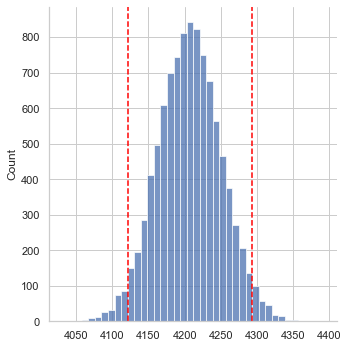

In [55]:
sns.displot(kind="hist", x=bootstrap_distribution, bins = 40)
plt.axvline(lower_bound, color="red", ls='--')
plt.axvline(upper_bound, color="red", ls='--')
plt.show()

- We'll also construct a confidence interval using parametric methods and compare intervals generated.  These methods we'll be explained in upcoming sections.

In [56]:
# Identify variables
x_hat = sample_mean
sd = np.std(penguins["body_mass_g"], ddof=1)
n = number_sample_observations
dof = n - 1

# Calculate SE
se = sd / sqrt(n)
print(f"The standard error is {round(se, 4)}")

# Calculate T critical value
t_object = stats.t(dof)  # Create t distribution
upper_percentile = (1 - (95 / 100)) / 2  # Calculate upper tail percentile
t_critical = t_object.isf(upper_percentile)  # Returns t critical (quantile)
print(f"The T critical value is {round(t_critical, 4)}")

# Calculate margin of error
me = se * t_critical

# Calculate confidence interval
lower_bound = x_hat - me
upper_bound = x_hat + me
parametric_confidence_interval = (round(lower_bound,2), round(upper_bound,2))

# Interpret results
print(
    'We are 95% confident that the population mean of penguin mass is between '
    f'{parametric_confidence_interval} grams.'
)

The standard error is 44.1256
The T critical value is 1.9671
We are 95% confident that the population mean of penguin mass is between (4120.26, 4293.86) grams.


- We can see that both bootstrap and parametric confidence intervals returned similar results:

In [57]:
print(f'Bootstrap: {bootstrap_confidence_interval}')
print(f'Parametric: {parametric_confidence_interval}')

Bootstrap: (4121.54, 4292.87)
Parametric: (4120.26, 4293.86)


---

### Randomization (Permutation)
- Randomization (sometimes called permutation) is used for hypothesis tests with  proportions or means with two or more groups
- The steps for randomization are as follows:
    1. Collect original sample data from population
    1. Assume no difference between categories/groups/levels (H~0~) and combine all observations from all groups into single dataset
    1.  Sample (resample) from this new dataset **w/out replacement**, randomly shuffle (permute) observations into groups
    1. Calculate sample statistic
    1. Repeat steps 3 and 4 to create simulated sampling distribution.  Simulated sampling distribution shows relative frequencies (probabilities) if we assume H~0~ is true.  For this reason it is called the **null distribution**.
    1. Use simulated sampling distribution to calculate p-value

**"By-hand" Example**

- We'll first give an example, pretending that we are randomizing by hand
- We are given the following data, which is the outcome of an experimental study with random assignment:

![](pictures/study1.jpg)

1. State hypotheses
    1. Null hypothesis: p~1~ - p~2~ = 0.  Two population proportions are equal.  I.e. infection rate is equal for vaccine population and placebo population.
    1. Alternative hypothesis: p~1~ - p~2~ != 0.  Two population proportions are NOT equal.  I.e. infection rate for vaccine population and placebo population are NOT equal.
1. We'll say significance level is 0.05.  Sample proportion for vaccine group is $5/14 = 0.36$ and sample proportion for placebo group is $6/6 = 1$.  Sample sizes are 14 for vaccine group and 6 for placebo group.  Difference between real-life sample proportions are $(5/14) - (6/6) = - 0.64$.  This order could be reversed as long as it is consistent for every calculation.
1.  This was an actual experiment with random assignment.  Sample less than 10% of population. However, the sample size condition for difference of two proportions is not met. Can not perform parametric hypothesis test. Instead, use randomization (permutation) resampling.
1. Simulate study results while pretending H~0~ is TRUE:
    1. 11/20 subjects were infected and 9/20 were not infected in the real-life study.  So write "infection" on 11 cards and "no infection" on 9 cards.
    1. Randomize cards by shuffling, then deal 14 cards into vaccine pile and 6 cards into placebo pile.  This matches the number of subjects in each group in the real-life study.  I believe it is a coincidence that the totals equaled 11 and 9 again.
![](pictures/study2.jpg)
    1. Calculate proportion of infections (infection rate) in vaccine pile and proportion of infections in placebo pile: $(7/14) = 0.5$ for vaccine pile and $(4/6) = 0.66$ for placebo pile.
    1. Take the difference in proportions (treatment - placebo).   $(0.5-0.66) = - 0.16$.
1. Repeat simulation and build sampling distribution (null distribution).  Each dot is a simulated sample proportion difference (simulated sample statistic).
![](pictures/study3.jpg)
1. Compare real-life proportion difference, - 0.64, to distribution.  We can see that the probability of getting a difference in infection rates of -0.64 or less (or 0.64 or more) is 2/100 = 0.02. p-value = 0.02.  There is a 2% chance of getting a value at least as extreme as -0.64 if H~0~ is true.  Given this low probability, we start to think that H~0~ may actually be false.
1. 0.02 < 0.05.  p-value <- $\alpha$.  Reject H~0~ in favor of H~A~.  Infection rates for vaccine population and placebo population are different.  Because our real-life data show P(Inf|vaccine) - P(Inf|placebo) = negative number, -0.64, we know that the infection rate of the vaccine population is lower than the placebo population.

---

## Parametric Methods
- Parametric methods are based on the assumption of a theoretical normal sampling distribution.  This is the Central Limit Theorem (CLT).
- We'll cover the following topics in this section:
    1. Central limit theorem
    1. Study sample size
    1. Common parametric methods
- The parametric methods covered are divided by the variable type and quantity
    1. One proportion
    1. Difference of two proportions
    1. Chi-square goodness of fit
    1. Chi-square independence
    1. One mean
    1. Paired means
    1. Difference of Two Means
    1. Many Means w/ANOVA
- Note that we'll use parametric methods for proportions as these are the most common.  However, there are "exact" non-parametric methods that use the binomial distribution to calculate p-values.
- Lastly note that we focus on the statistical theory and manual calculations of confidence intervals and hypothesis tests.  This is beneficial for learning purposes.  There are functions in SciPy, Statsmodels, and Pengouins that perform these calculation in a more automated way.  Using pre-made functions is faster and may reduce user error, but also adds a layer of abstraction to the learning process.

---

### Central Limit Theorem
- **Central Limit Theorem (CLT)**---if we repeatedly sample the population, the sampling distribution is nearly normal and centered at the population parameter (mean or proportion)
- It is actually called the *Central* Limit Theorem because it is a *central* concept for theoretical inferential statistics
- It is central because assuming a normal sampling distribution allows us to easily calculate probabilities
- The CLT holds true for both normal and skewed populations
    - The CLT holds true for normal populations regardless of sample size
    - The CLT will hold true for skewed populations if the sample size is large enough.  The sample size needed depends on the amount of skew and the statistical test being performed.
- We'll next provide examples of how sample size affects skew of sampling distributions.  We'll show categorical variables which use proportions and numerical variables which use means.

---

#### CLT w/ Means
- This first image shows a left-skewed population and a sampling distribution of means created with sample sizes of two.  The sampling distribution is also left-skewed.

![](pictures/clt_mean_1.jpg)

- This next image shows the same left-skewed population and a sampling distribution of means created with sample sizes of 30.  The sampling distribution is nearly normal, though still slightly left-skewed.

![](pictures/clt_mean_2.jpg)

---

#### CLT w/ Proportions
- This first image shows a population with a 0.9 proportion (probability) of successful trials and a sampling distribution of proportions created with sample sizes of 20.  The sampling distribution is left-skewed.

![](pictures/clt_pro_1.jpg)

- This next image shows the same population and a sampling distribution of proportions created with sample sizes of 101.   The sampling distribution is nearly normal, though still slightly left-skewed.

![](pictures/clt_pro_2.jpg)

---

### Study Sample Size

---

#### ME and Sample Size
- The following formula shows how the confidence interval, margin of error (ME), confidence level (represented by Z-Score), and SE are all related:
  - Note that the margin of error is always half the confidence interval
  - Note that confidence intervals for means will replace the Z critical value with the T critical value

![](pictures/CI.jpg)

- We can purposely decrease our margin of error by increasing our sample size
- A larger sample size is usually more costly (time, resources, money) to obtain
- To find a balance between cost and estimate precision we often specify the size of our desired margin of error in advance
- E.g. we might want to estimate our product's true weight within +- 10 grams.  A range of 100 grams is too large to be helpful and although it wouldn't hurt to know, we don't need to know our product's weight within 1 gram.

---

**EXAMPLES**

**Strategery for ME and Samples Size**

1. Choose a desired ME (below it is 0.04) and plug it in
1. Calculate the Z-score based on the desired confidence level (below it is 1.96 for a 95% CI) and plug it in
1. Estimate proportion or standard deviation (below it is 0.5) and plug it in
    - For categorical variables, estimate proportion based upon prior studies.  If no past studies to base estimate on, use 0.5 as the proportion.  A 0.5 proportion yields the largest confidence interval and is the most conservative estimate.
    - For numerical variables, estimate standard deviation based upon prior studies
1. Rearrange the the equation to isolate $n$
1. Chug...chug...chug

- For a categorical variable. A university is conducting a survey to see if students would like to pay increased fees for a library renovation.  What sample size is required to ensure a margin of error is smaller than 0.04 using a 95% confidence level?  I.e. we want to be able to estimate the true proportion of students +- 4.0% with a confidence level of 95%.

![](pictures/sample_size.jpg)

---

#### Power and Sample Size
- Power is the probability of correctly rejecting H~0~
- **Effect size**---magnitude of difference between populations
- Power relies not only on the sample size, but also on the effect size and significance level
- Power calculations can be useful both before and after studies
    1. Before a study, we can calculate a needed sample size using a planned significance level, a desired power, and desired effect size we would like to be able to detect
    1. After a study, we can calculate power using sample size, significance level, and estimated effect size.  If we rejected H~0~, great! If we failed to reject H~0~, but power was high, great!  If we failed to reject H~0~ but power was low, very bad!  We do not know if we failed to reject because H~0~ was true, or if we failed to reject the power was low!!!
- 80% - 90% are common powers, but it could be higher depending on the type of study.
- Calculating power is difficult.  To see an example, take a look, it's in a book (specifically the *OpenIntro Statistics* book)...Reading Rainbow...

---

### One Proportion

---

#### Conditions and SE
- The following image shows conditions that must be met and the formula for standard error:

![](pictures/clt_pro.jpg)

---

#### Confidence Interval
- The following image shows the formula for a confidence interval:

![](pictures/CI.jpg)

- Remember the **point estimate** is another name for the sample statistic
- **`Z*`**---Z critical value.  A critical value for a standard normal distribution.  Only the positive value is used.
- **Critical value**--when a quantile (Z-Score, T-Score, etc.) is used as a cut off point for decision making in confidence intervals or hypothesis tests, we call it a "critical value".
- We use the same concepts introduced in the *Standard Normal Distribution* section to select Z critical values (quantiles) that capture a desired proportion of observations.  This desired proportion of observations is equal to our confidence level as shown by the following graph:

![](pictures/CI_Z_mean.jpg)


- To find the Z critical value for a given confidence level:

```python
def get_z_critical(confidence_level):
    import scipy.stats as stats
    standard_normal_object = stats.norm(loc=0, scale=1)  # Create standard normal distribution
    upper_percentile = (1 - (confidence_level / 100)) / 2  # Calculate upper tail percentile
    return standard_normal_object.isf(upper_percentile)  # Returns z critical (quantile)
```

In [58]:
def get_z_critical(confidence_level):
    import scipy.stats as stats
    standard_normal_object = stats.norm(loc=0, scale=1)  # Create standard normal distribution
    upper_percentile = (1 - (confidence_level / 100)) / 2  # Calculate upper tail percentile
    return standard_normal_object.isf(upper_percentile)  # Returns quantile

for confidence_level in [90, 95, 99]:
    z_critical = get_z_critical(confidence_level)
    print(f'{round(z_critical, 3)}')

1.645
1.96
2.576


**Strategery for One Proportion CI**

1. Identify sample proportion and sample size
1. Verify conditions for independence and sample size/skew, using $\hat{p}$ in place of $p$
1. Calculate SE, using $\hat{p}$ in place of $p$
1. Calculate Z critical for desired CL
1. Calculate margin of error
1. Calculate confidence interval
1. Interpret results

---

**EXAMPLES**

- Create a 99% confidence interval for the proportion of Americans that support expanding the use of wind turbines.  1,000 Americans were randomly surveyed.  The sample proportion in support was found to be 0.848.

In [59]:
# 1. Identify sample proportion and sample size
n = 1000
p_hat = 0.848
print(f'The sample proportion is {p_hat} and the sample size is {n}.')

# 2. Verify conditions for independence and sample size/skew
print(
    'We can say that samples are independent because sampling was done randomly '
    f'and 1,000 Americans surveyed is less than 10% of the American popuation.'
)

if n * p_hat >= 10 and (1-p_hat) * n >= 10:
    print(
        'The sample size is also large enough, so the sampling distribution will be normal. '
        'The Central Limit Theorem can be used.'
  )

# 3. Calculate SE
se = sqrt(p_hat * (1-p_hat) / (n))
print(f"The standard error is {round(se, 4)}.")

# 4. Calculate Z critical value
z_critical = get_z_critical(99)
print(f'The Z critical value is: {round(z_critical,3)}.')

# 5. Calculate margin of error
me = se * z_critical

#6. Calculate confidence interval
lower_int = p_hat - me
upper_int = p_hat + me

# 7. Interpret results
print(
    'We are 99% confident that the true proportion of Americans who support expanding '
    f'the use of wind turbines is between {round(lower_int, 3)} and {round(upper_int, 3)}.'
)

The sample proportion is 0.848 and the sample size is 1000.
We can say that samples are independent because sampling was done randomly and 1,000 Americans surveyed is less than 10% of the American popuation.
The sample size is also large enough, so the sampling distribution will be normal. The Central Limit Theorem can be used.
The standard error is 0.0114.
The Z critical value is: 2.576.
We are 99% confident that the true proportion of Americans who support expanding the use of wind turbines is between 0.819 and 0.877.


---

#### Hypothesis Testing

The following image shows steps for hypothesis testing:

![](pictures/hy_test_prop_single.jpg)

- When performing a one proportion hypothesis test:
    1. We use p~0~ in place of $p$ to determine if our sample size is large enough
    1. We use p~0~ in place of $p$ to calculate SE
    1. We use p~0~ in place of $p$ to calculate Z-Score
- This differs from CIs, which use $\hat{p}$ in place of $p$
- The Z-Score is an example of a test statistic
- **Test statistic**---statistic used find p-value.  Z-Score, t-score, chi-square, and the F-statistic are all test statistics.

**Strategery for One Sample Proportion Two-Sided Hypothesis Test**

1. List hypotheses, using p~0~
    1. Null hypothesis: p = p~0~.  Population proportion equals the hypothesized null proportion
    1. Alternative hypothesis: p != p~0~.  Population proportion does NOT equal hypothesized null proportion
1. Identify significance level, sample proportion, and sample size
1. Verify conditions for independence and sample size/skew, using p~0~ in place of $p$
1. Calculate SE, using p~0~ in place of $p$
1. Calculate Z-Score using the formula.  It is also super helpful to draw a picture to understand the next step!!!
1. Calculate p-value
1. Interpret results by comparing the p-value to significance level
    1. When the p-value is less than the significance level, $\alpha$, reject H~0~
    1. When the p-value is greater than the significance level, $\alpha$, fail to reject H~0~

---

**EXAMPLES**

- Some people claim to be able to tell the difference between diet and regular soda with one taste.  80 of these people were randomly sampled.  40 cups were assigned to be regular soda and 40 cups were assigned to be diet soda.  53 participants correctly identified the soda type.
    1. Does the data provide strong evidence that these people are any better or worse than random guessing at telling the difference between diet and regular soda?
    1. Interpret the p-value in this context.

In [60]:
# 1. List Hypotheses 
p_not = 0.50
print(
    f'Null hypothesis: p = {p_not}. ' 
    'People who claim to be able to tell the difference actually do no better than random chance.\n'
    f'Alternative Hypothesis: p != {p_not}. '
    'People who claim to be able to tell the difference do better or worse than random chance.'
)

# 2. Identify variables
a = 0.05
p_hat = 53 / 80
n = 80
print(f'Our significance level is {a}, our sample proportion is {p_hat} and our sample size is {n}.')

# 3. Verify conditions for independence and sample size/skew
print('There is random samping.  We assume that the sample is less than 10% of population.')

if n * p_not >= 10 and (1 - p_not) * n >= 10:
    print('The sample size is large enough.')

# 4. Calculate SE
se = sqrt(p_not * (1 - p_not)/n)
print(f'Our standard error is {round(se, 4)}.')

# 5. Calculate Z-score
z = (p_hat - p_not)/se
print(f'Our Z-Score is {round(z, 4)}.')

# 6. Calculate p-value
standard_normal_object = stats.norm(loc=0, scale=1)  # Create standard normal distribution
 # Use SF instead of CDF because Z-Score is positive.  Gives 1 tail proportion then double for p-value.
p_value = standard_normal_object.sf(z) * 2

print(
    f'Our p-value is {round(p_value, 4)}. '
    f'If the null hypothesis were true, there would be a {round(p_value * 100, 4)}% chance '
    'of getting a value at least as extreme as our observed sample statistic.'
)

# 7. Interpret results
print(
    f'Because our p-value, {round(p_value, 4)}, is less than our significance level, '
    f'{a}, we reject our null hypothesis in favor of the alternative hypothesis. '
    f'The evidence suggests that people who claim to be able to distinguish between sodas do better than '
    f'random chance.  We know they do better (and not worse) because p-hat > p-not.'
)

Null hypothesis: p = 0.5. People who claim to be able to tell the difference actually do no better than random chance.
Alternative Hypothesis: p != 0.5. People who claim to be able to tell the difference do better or worse than random chance.
Our significance level is 0.05, our sample proportion is 0.6625 and our sample size is 80.
There is random samping.  We assume that the sample is less than 10% of population.
The sample size is large enough.
Our standard error is 0.0559.
Our Z-Score is 2.9069.
Our p-value is 0.0037. If the null hypothesis were true, there would be a 0.365% chance of getting a value at least as extreme as our observed sample statistic.
Because our p-value, 0.0037, is less than our significance level, 0.05, we reject our null hypothesis in favor of the alternative hypothesis. The evidence suggests that people who claim to be able to distinguish between sodas do better than random chance.  We know they do better (and not worse) because p-hat > p-not.


---

#### One-Sided Tests
- Two-sided hypothesis tests detect whether the $p$ is either above or below a null value p~0~
- One-sided hypothesis tests detect whether the $p$ is above, or below, but not both.  We could either say:
    1. There's only value in detecting if the population parameter is **less than** some value p~0~.  In this case, the alternative hypothesis is written as p < p~0~ for some null value.
    1. There's only value in detecting if the population parameter is **more than** some value p~0~.  In this case, the alternative hypothesis is written as p > p~0~ for some null value.
- In a one sided test we calculate the probability of the true parameter being in one tail of the normal distribution.  After using the Z-Score to find the percentile of one tail we do NOT double it.  This means that the p-value will be half the size and we are more likely to reject the H~0~.
- *We must decide to use a one-sided hypothesis test before seeing the data*
- The significance level of a one-sided test is NOT a compliment of the equivalent confidence interval.
  - E.g. for two-sided tests a 95% confidence interval and a 0.05 alpha can be used to draw equivalent conclusions
  - E.g. for one-sided tests a 90% confidence interval corresponds to 0.05 alpha
- Because one-sided tests are less often used, we will not give an example

---

### Difference of Two Proportions

---

#### Conditions and SE
- The following images show the conditions that must be met to compare two independent proportions.  Notice there is now a condition for independence between groups.

![](pictures/hy_test_prop_single3.jpg)

- The following image shows the formula to calculate the standard error (SE) and create a confidence interval (CI):

![](pictures/hy_test_prop_single2.jpg)

---

#### Confidence Intervals
- Confidence interval for the difference of two proportions is very similar to one proportion, but there are changes:
  - The point estimate is a difference of two proportions
  - SE formula
  - Z-Score formula kind of

**Strategery for Difference of Two Proportions CI**:

1. Identify sample proportion and sample size for both samples
1. Verify conditions for independence and sample size/skew, using $\hat{p}_1$ and $\hat{p}_2$ in place of $p$
1. Calculate SE, using $\hat{p}_1$ and $\hat{p}_2$ in place of $p$
1. Calculate Z-Score for desired CL
1. Calculate margin of error
1. Calculate confidence interval
1. Interpret results
- The order we write probabilities when calculating difference determines whether the confidence interval will have positive numbers or negative numbers.  Both are correct, but the order written does affect how we interpret the results.

---

**EXAMPLES**

![](pictures/two_prop_ci.jpg)

In [61]:
# 1. Identify variables
p_hat_1 = 145 / 12933 # fish oil
n_1 = 12933 # fish oil
p_hat_2 = 200 / 12938 # placebo
n_2 = 12938 # placebo
print(
    f'The sample proportion is {round(p_hat_1, 3)} for fish oil and {round(p_hat_2,3)} for the placebo. '
    f'There is a difference of {round(p_hat_1 - p_hat_2, 3)}. '
    f'The sample sizes are {n_1} for fish oil and {n_2} for the placebo.'
)

# 2. Verify conditions for independence and sample size/skew
print(
    'Assignment into treatment groups was randomized.  We assume that the samples in each group are less '
    'than 10% of the population.  Samples are not paired.  Samples are independent.'
)

condition_1 = n_1 * p_hat_1 >= 10 and (1 - p_hat_1) * n_1 >= 10
condition_2 = n_2 * p_hat_2 >= 10 and (1 - p_hat_2) * n_1 >= 10
                                
if condition_1 and condition_2:
    print('The sample size is large enough.')

# 3. Calculate SE
se = sqrt((p_hat_1 * (1 - p_hat_1)/n_1) + (p_hat_2 * (1 - p_hat_2)/n_2))
print(f"The standard error is {round(se, 4)}")

# 4. Calculate Z critical value
z_critical = get_z_critical(95)
print(f'The Z critical value is: {round(z_critical,3)}.')

# 5. Calculate margin of error
me = se * z_critical

# 6. Calculate confidence interval
lower_int = p_hat_1 - p_hat_2 - me
upper_int = p_hat_1 - p_hat_2 + me

# 7. Interpret results
print(
    f'We are 95% confident that the true difference in proportion of population having a heart attack '
    f'between those who took fish oil and those who took a placebo is between {round(lower_int, 4)} '
    f'and {round(upper_int, 4)}.  Because we listed the fish oil proportion first and the placebo second '
    f'and the sample difference is negative, we know that fish oil has a lower heart attack rate than the '
    f'placebo. We are 95% confident there is between a {round(upper_int, 4) * -100}% '
    f'and {round(lower_int, 4) * -100}% lower heart attack rate for those who took fish oil from a baseline '
    f'of about {round(p_hat_2 * 100, 4)}%.'
)

The sample proportion is 0.011 for fish oil and 0.015 for the placebo. There is a difference of -0.004. The sample sizes are 12933 for fish oil and 12938 for the placebo.
Assignment into treatment groups was randomized.  We assume that the samples in each group are less than 10% of the population.  Samples are not paired.  Samples are independent.
The sample size is large enough.
The standard error is 0.0014
The Z critical value is: 1.96.
We are 95% confident that the true difference in proportion of population having a heart attack between those who took fish oil and those who took a placebo is between -0.007 and -0.0015.  Because we listed the fish oil proportion first and the placebo second and the sample difference is negative, we know that fish oil has a lower heart attack rate than the placebo. We are 95% confident there is between a 0.15% and 0.7000000000000001% lower heart attack rate for those who took fish oil from a baseline of about 1.5458%.


---

#### Hypothesis Testing
- Hypothesis testing for the difference of two proportions is very similar to one proportion tests, but there are changes:
  - SE formula (same as shown above in CI)
  - **Pooled proportion** used if the null hypothesis is that there is no difference in proportions

![](pictures/hy_test_prop_diff_pooled.jpg)

- The pooled proportion is the proportion of successes found by combining the two samples.  We combine them because we are operating under the null hypothesis which says there is no difference between populations.  Similar idea as randomization (permutation) resampling simulations.
- The pooled proportion is used to test if the sample size is large enough.  It is used in place of $p$ in the success failure condition seen below:

![](pictures/hy_test_prop_single3.jpg)

- The pooled probability is also used in place of $\hat{p}$s in the SE formula:
  - Note that CI uses $\hat{p}$s, but hypothesis test uses pooled probability

![](pictures/hy_test_prop_single2.jpg)

- Difference of two proportions also uses the same Z-Score formula, but with a difference of sample proportions as sample proportion and 0 as the null proportion
    - $Z = \frac{(\hat{p}_1 - \hat{p}_2) - 0}{SE}$

**Strategery for Difference of Two Proportions Hypothesis Test**

1. List hypotheses
    1. Null hypothesis: p~1~ - p~2~ = 0.  Difference between population proportions is 0.
    1. Alternative hypothesis: p~1~ - p~2~ != 0. Difference between population proportions is not 0.
1. Identify significance level, sample proportions, sample sizes, and difference of two sample proportions
1. Verify conditions for independence and sample size/skew, using the pooled proportion in place of $p$
1. Calculate SE, using the pooled proportion in place of $p$
1. Calculate Z-Score using the formula.  It is also super helpful to draw a picture to understand the next step!!!
1. Calculate p-value
1. Interpret results by comparing the p-value to significance level
    1. When the p-value is less than the significance level, $\alpha$, reject H~0~
    1. When the p-value is greater than the significance level, $\alpha$, fail to reject H~0~

---

**EXAMPLES**

![](pictures/hy_test_prop_diff_ex.jpg)

In [62]:
# 1. State hypotheses
print(
    'Null hypothesis: p1 - p2 = 0.   There is no difference in population proportions. '
    'I.e death rate between those women who recieved mammogram screenings and those who did not is 0. \n'
    'Alternative hypothesis: p1 - p2 != 0.  There is a difference in population proportions.'
)

# 2. Identify variables
a = 0.05
p_hat_1 = 500 / 44425
n_1 = 44425
p_hat_2 = 505 / 44405
n_2 = 44405
print(
    f'Our significance level is {a}. Our sample proportion mammogram is {round(p_hat_1, 4)} and our '
    f'sample proportion control is {round(p_hat_2, 4)}. The sample difference is {round(p_hat_1 - p_hat_2, 4)}. '
    f'The sample size mammogram is {n_1} and the sample size control is {n_2}.'
)

# 3. Verify conditions for independence and sample size/skew
print(
    'There is random assignment  We assume that the sample is less than 10% of the population. '
    'Groups were non-paried and are independent.'
)

p_pooled = (500 + 505) / (44425 + 44405)
condition_1 = n_1 * p_pooled >= 10  and n_1 * (1 - p_pooled) >= 10
condition_2 = n_2 * p_pooled >= 10 and n_2 * (1 - p_pooled) >= 10

if condition_1 & condition_2:
    print('The sample size is large enough.')

# 4. Calculate SE
se = sqrt((p_pooled * (1 - p_pooled)/n_1) + (p_pooled * (1 - p_pooled)/n_2))
print(f"The standard error is {round(se, 4)}.")

# 5. Calculate Z-Score
z = ((p_hat_1 - p_hat_2)- 0) / se
print(f'Our Z-Score is {round(z, 2)}.')

# 6. Calculate p-value
standard_normal_object = stats.norm(loc=0, scale=1)  # Create standard normal distribution
 # Use CDF instead of SF because Z-Score is negative.  Gives 1 tail proportion then double for p-value.
p_value = standard_normal_object.cdf(z) * 2
print(
    f'Our p-value is {round(p_value, 4)}.  If the null hypothesis were true, there would be a '
    f'{round(p_value * 100, 4)}% chance  of getting a value at least as extreme as our sample statistic.'
)

# 7. Interpret results
print(
    f'Because our p-value, {round(p_value, 4)}, is greater than our significance level, {a}, '
    'we do NOT reject our null hypothesis.'
)

Null hypothesis: p1 - p2 = 0.   There is no difference in population proportions. I.e death rate between those women who recieved mammogram screenings and those who did not is 0. 
Alternative hypothesis: p1 - p2 != 0.  There is a difference in population proportions.
Our significance level is 0.05. Our sample proportion mammogram is 0.0113 and our sample proportion control is 0.0114. The sample difference is -0.0001. The sample size mammogram is 44425 and the sample size control is 44405.
There is random assignment  We assume that the sample is less than 10% of the population. Groups were non-paried and are independent.
The sample size is large enough.
The standard error is 0.0007.
Our Z-Score is -0.17.
Our p-value is 0.8683.  If the null hypothesis were true, there would be a 86.8316% chance  of getting a value at least as extreme as our sample statistic.
Because our p-value, 0.8683, is greater than our significance level, 0.05, we do NOT reject our null hypothesis.


---

### Chi-Square GOF
- Goodness of fit with the chi-square test is called goodness of *fit* since we're evaluating how well our observed data *fit* the expected distribution.  The two major use cases are:
    1. Given a sample of cases that can be classified into several groups, determine if the sample is representative of the general population.  I.e compare observed distribution to population distribution.  We will give an example of this.
    1. Evaluate whether data resemble a particular distribution, such as a normal distribution or a geometric distribution.  We won't give an example of this.
- GOF is used when one Bournoulli variable is grouped into *more than*  two levels by a second categorical variable  
- Data for chi-square GOF is stored stored in a one-way frequency table
- Chi-square is NOT used to construct confidence intervals, since there is NOT a single parameter to estimate
- Chi-square is used in hypothesis testing

---

#### Conditions and Chi-Square

![](pictures/hy_test_prop_chi_1.jpg)

![](pictures/hy_test_prop_chi_2.jpg)

---

#### Chi-square Distribution

- The chi-square test statistic is always positive
- **Chi-square distribution**---distribution of chi-square test statistics.  Probability density curve.  Shape depends solely on the degrees of freedom.  As degrees of freedom increases the center of the distribution moves right, the variability/spread increases, and the shape appears less skewed.  However, the chi-square distribution is always right skewed to some extent. 

![](pictures/hy_test_prop_chi_df.jpg)

- The p-value associated with a chi square distribution represents the area in the upper tail

![](pictures/hy_test_prop_chi_curve.jpg)


---

#### Hypothesis Testing

**Strategery for Chi-Square GOF**

1. Identify parameter of interest
1. List hypotheses
    1. Null is that observed counts and expected counts are similar because the observed counts are the result of a random sample of the population. Any differences occur because of sampling variability.
    1. Alternative is that the observed counts are NOT similar to the expected counts because observed counts are NOT the result of a random sample of the population.
1. Identify significance level, observed count frequency, expected count frequency, and degrees of freedom
1. Verify conditions for independence and sample size
1. Calculate chi-square and p-value.  We'll use `stats.chisquare(f_obs=<ARRAY_LIKE_FREQU>, f_exp=<ARRAY_LIKE_FREQU>)` which returns a tuple of (chi-square, p-value).
1. Interpret results by comparing the p-value to significance level
    1. When the p-value is less than the significance level, $\alpha$, reject H~0~
    1. When the p-value is greater than the significance level, $\alpha$, fail to reject H~0~

---

**EXAMPLES**

- Are the observed proportions of jurors from each race similar to the expected proportion of jurors?  The following counts come from a random sample of jurors.

![](pictures/hy_test_prop_chi_data.jpg)

In [63]:
# 1. State hypotheses
print(
    'Null hypothesis: observed counts and expected counts are similar because the observed counts are the '
    'result of a random sample of the population. Any differences occur because of sampling variability.\n'
    'I.e. the proportion of jurors of different races should be similar to the proportion of registered '
    'voters of different races. \nAlternative hypothesis: observed counts are NOT similar to the expected '
    'counts because observed counts are NOT the result of a random sample of the population.'
)

# 2. Identify variables
a = 0.05
k = 3
dof = k - 1
df_juror = pd.DataFrame(
    {"race":["white", "black", "hispanic", "other"],
     "observed":[205, 26, 25, 19],
     "expected":[0.72*275, 0.07*275, 0.12*275, 0.09*275]}  # Convert proportions to frequency
)
print(df_juror)
    
print(
    f"Significance level is {a}. Degrees of freedom is {dof}.  Observed counts and expeceted proportions "
    f"are seen in df_juror."
)

# 3. Verify conditions for independence and sample size/skew
print(
    'There is random sampling.  We assume that the sample is less than 10% of population. '
    'Each subject only contributes to one cell of the table.  There are more than 5 expected counts '
    'in each "cell" of the table, so the population size is large enough.'
)

# 4. Calculate chi-square and p-value
chisq, p_value = stats.chisquare(f_obs=df_juror["observed"], f_exp=df_juror["expected"])

print(f"Our chi-square is {chisq}.  Our p-value is {p_value}.")

# 5. Interpret results
print(
    f"Our p-value, {round(p_value, 5)}, is higher than our significance level, "
    f"{a}, so we do NOT reject the null hypothesis."
)

Null hypothesis: observed counts and expected counts are similar because the observed counts are the result of a random sample of the population. Any differences occur because of sampling variability.
I.e. the proportion of jurors of different races should be similar to the proportion of registered voters of different races. 
Alternative hypothesis: observed counts are NOT similar to the expected counts because observed counts are NOT the result of a random sample of the population.
       race  observed  expected
0     white       205    198.00
1     black        26     19.25
2  hispanic        25     33.00
3     other        19     24.75
Significance level is 0.05. Degrees of freedom is 2.  Observed counts and expeceted proportions are seen in df_juror.
There is random sampling.  We assume that the sample is less than 10% of population. Each subject only contributes to one cell of the table.  There are more than 5 expected counts in each "cell" of the table, so the population size is

---

### Chi-Square Independence
- Independence with chi-square test is used to decide if two categorical variables are independent or dependent.  Sometimes called **Pearson's chi-square test**.
- A one-way table describes counts for each outcome in a single categorical variable.  A two-way table (contingency table) describes counts for combinations of outcomes for two categorical variables.  Data for chi-square independence tests are stored in a contingency table.
- Chi-square tests for independence are usually used with two categorical variables when at least one categorical variable has more than two levels.  However,  if both variables only had two levels the chi-square test would be equal to the square of the Z-test statistic from the Z-test of two independent proportions.  I.e. the chi-square test will give the same results as the difference of two proportions Z-test.
- Chi-square is NOT used to construct confidence intervals, since there is NOT a single parameter to estimate
- Chi-square is used in hypothesis testing

---

#### Conditions and Chi-Square

![](pictures/hy_test_prop_chi__indie.jpg)

- Testing for independence uses a different formula for the degrees of freedom compared to GOF as seen in the above image
- Expected counts are the frequency counts if variables were independent.  These are calculated by looking at a contingency table and using the formula:

$E = \frac{\text{row total X column total}}{\text{grand total}}$

---

#### Hypothesis Testing

**Strategery for Chi-Square Independence**

1. List hypotheses
    1. Null hypothesis: variables are independent. Any differences between observed proportions and expected proportions occur because of sampling variability.
    1. Alternative hypothesis: variables are dependent
1. Identify significance level, observed frequency counts, expected frequency counts, and degrees of freedom.
1. Verify conditions for independence and sample size/skew
1. Calculate chi-square and p-value.  We'll use `stats.chi2_contingency(<CONTINGENCY_TABLE_FREQU>)`, which returns a tuple (chi-squared, p-value, dof, expected).
1. Interpret results by comparing the p-value to significance level
    1. When the p-value is less than the significance level, $\alpha$, reject H~0~
    1. When the p-value is greater than the significance level, $\alpha$, fail to reject H~0~

---

**EXAMPLES**

- A psychology/sociology experiment tested whether the questions a buyer asked a seller led the seller to disclose known problems with the product.  Are the questions asked (general, positive, and negative) independent or associated with disclosure of problem (disclose problem and hide problem).  This table also shows the expected probabilities in blue.

![](pictures/hy_test_prop_chi__indie_ex.jpg)

In [64]:
# 1. State hypotheses
print(
    'Null hypothesis: variables are independent. Any differences between observed proportions and expected '
    'proportions occur because of sampling variability. \nAlternative hypothesis: variables are dependent.'
)

# 2. Identify variables
a = 0.05
dof = (2 -1) * (3 - 1)


my_dict = {
    "general":[2, 71], 
    "positive":[23, 50],
    "negative":[36, 37]
}

my_index = ['disclose_problem', 'hide_problem']


df_experiment = pd.DataFrame(my_dict, my_index)
print('The following is a contingency table of our observed values:')
print(df_experiment)

print(f"Significance level is {a}. Degrees of freedom is {dof}.")

# 3. Verify conditions for independence and sample size/skew
print(
    'We assume there is random assignment.  We assume that the sample is less than 10% of population. '
    'Each subject only contributes to one cell of the table.  There are more than 5 expected counts '
    'in in each "cell" of the table, so the population size is large enough.'
)

# 4. Calculate chi-square and p-value
(chi_squared, p_value, dof, expected) = stats.chi2_contingency(df_experiment)
print(f"Chi-squared is: {chi_squared}.")
print(f"p_value is: {p_value}.")
print(f"Degrees of freedom is: {dof}.")
print(f"Expected frequencies are: {expected}.")


# 5. Interpret results
print(
    f'Our p-value, {p_value}, is lower than our significance level, {a}, '
    'so we reject the null hypothesis.  There is sufficient evidence to conclude that the variables '
    'are likely dependent.'
)

Null hypothesis: variables are independent. Any differences between observed proportions and expected proportions occur because of sampling variability. 
Alternative hypothesis: variables are dependent.
The following is a contingency table of our observed values:
                  general  positive  negative
disclose_problem        2        23        36
hide_problem           71        50        37
Significance level is 0.05. Degrees of freedom is 2.
We assume there is random assignment.  We assume that the sample is less than 10% of population. Each subject only contributes to one cell of the table.  There are more than 5 expected counts in in each "cell" of the table, so the population size is large enough.
Chi-squared is: 40.12803486200457.
p_value is: 1.9333387023231875e-09.
Degrees of freedom is: 2.
Expected frequencies are: [[20.33333333 20.33333333 20.33333333]
 [52.66666667 52.66666667 52.66666667]].
Our p-value, 1.9333387023231875e-09, is lower than our significance level, 0.0

---

### One Mean

---

#### Conditions and SE
- Two conditions are required to apply the CLT for one mean
    1. Independence.  Same as in proportions.
    1. Sample Size/Skew.  We do not actually know the population distribution.  We only know the sample distribution.
        1. When the sample size is *less than 30*, check to make sure there are *no outliers* in the sample distribution.  Then, it is okay to assume the sample came from a normal population.  As we saw in the *Normal Probability Plot* section, a small sample from a population will appear non-normal regardless of the population distribution.
        1. When the sample size is *greater than 30* check to make sure there are *no extreme outliers*.  Then it is okay to assume the sample came from a normal distribution.

- Conditions are also seen below:

![](pictures/clt_mean.jpg)

- The image shows $\sigma$ is crossed out in favor of $s$.  If the population standard deviation is unknown (almost always), then we approximate $\sigma$ with the sample standard deviation, $s$.
- Using $s$ is imperfect.  To help correct for this we use a different probability density distribution called the t-distribution.

---

#### t-distribution

- **t-distribution**---also called the **Student t-distribution**. Probability density curve using the **T-score**. The T-score is also called the T-statistic or T-value.  Compared to the normal distribution, the t-distribution has thicker tails, meaning observations are more likely to fall more than 2 standard deviations away from the mean. Like the standard normal distribution, it is always centered at 0.

![](pictures/hy_test_mean_t.jpg)

- Like the chi-square distribution, the t-distribution has a single parameter, degrees of freedom (dof)
- $dof = n - 1$
- As dof increases, the t-distribution more closely resembles the normal distribution.  When dof is >= 30, the t-distribution and normal distribution are very similar.

![](pictures/hy_test_mean_t_2.jpg)

- Though the t-distribution and normal distribution are very similar above a sample size of 30, we tend to stick to the t-distribution when using means for inference

---

#### Confidence Intervals
- The confidence interval for one sample mean is calculated in a very similar way as the CI for a one proportion.  Changes include:
    1. SE formula
    1. Replace the Z critical value with the T critical value
- **`T*`**---in the context of confidence intervals T-scores are sometimes called "T critical values".  Only the positive T-score is used in the ME formula.
- To find the positive T-score for a given confidence level:

```python
def get_t_critical(confidence_level, dof):
    import scipy.stats as stats
    t_object = stats.norm(dof)  # Create t distribution
    upper_percentile = (1 - (confidence_level / 100)) / 2  # Calculate upper tail percentile
    return t_object.isf(upper_percentile)  # Returns t critical (quantile)
```

In [65]:
def get_t_critical(confidence_level, dof):
    import scipy.stats as stats
    t_object = stats.t(dof)  # Create t distribution
    upper_percentile = (1 - (confidence_level / 100)) / 2  # Calculate upper tail percentile
    return t_object.isf(upper_percentile)  # Returns t critical (quantile)

for confidence_level in [90, 95, 99]:
    for dof in [1,2,3]:
        t_critical = get_t_critical(confidence_level, dof)
        print(f'Confidence level: {confidence_level}, Degrees of Freedom {dof}, '
              f't critical value: {round(t_critical, 3)}'
        )

Confidence level: 90, Degrees of Freedom 1, t critical value: 6.314
Confidence level: 90, Degrees of Freedom 2, t critical value: 2.92
Confidence level: 90, Degrees of Freedom 3, t critical value: 2.353
Confidence level: 95, Degrees of Freedom 1, t critical value: 12.706
Confidence level: 95, Degrees of Freedom 2, t critical value: 4.303
Confidence level: 95, Degrees of Freedom 3, t critical value: 3.182
Confidence level: 99, Degrees of Freedom 1, t critical value: 63.657
Confidence level: 99, Degrees of Freedom 2, t critical value: 9.925
Confidence level: 99, Degrees of Freedom 3, t critical value: 5.841


**Strategery of One Sample Mean CI**

1. Identify sample mean, standard deviation, sample size, and degrees of freedom
1. Verify conditions for independence and sample size/skew
1. Calculate SE, using $s$ in place of $\sigma$
1. Calculate T critical value for desired CL using degrees of freedom
1. Calculate margin of error
1. Calculate confidence interval
1. Interpret results

---

**EXAMPLES**

- Find the 95% confidence interval for the mercury level in Risso's dolphins.  Sample size of 19, sample mean of 4.4 ug/wet gram,  and sample standard deviation of 2.3.  Random samples were taken.  Minimum value of 1.7, maximum of 9.2.

In [66]:
# 1. Identify variables
x_hat = 4.4
sd = 2.3
n = 19
dof = n - 1

print(
    f'The sample mean is {x_hat}, the sample standard deviation is {sd}, the sample size is {n}, '
    f'and degrees of freedom is {dof}.'
)

# 2. Check conditions for independence and sample size/skew
print(
    f'Sampling was random.  We assume sample was less than 10% of population. The sample size is less than 30, '
    f'but it appears that there are no outliers.  We say this because the min was only {round((4.4 - 1.7)/2.3, 4)} '
    f'sd away from the mean and the max was only {round((9.2 - 4.4)/2.3, 2)} sd away.'
)

# 3. Calculate SE
se = sd / sqrt(n)
print(f"The standard error is {round(se, 4)}")

# 4. Calculate T critical value
t_critical = get_t_critical(95, dof)
print(f"The T critical value is {round(t_critical, 4)}")

# 5. Calculate margin of error
me = se * t_critical

# 6. Calculate confidence interval
lower_int = x_hat - me
upper_int = x_hat + me

# 7. Interpret results
print(
    f'We are 95% confident that the true population mean is between {round(lower_int, 4)} '
    f'and {round(upper_int, 4)}.'
)

The sample mean is 4.4, the sample standard deviation is 2.3, the sample size is 19, and degrees of freedom is 18.
Sampling was random.  We assume sample was less than 10% of population. The sample size is less than 30, but it appears that there are no outliers.  We say this because the min was only 1.1739 sd away from the mean and the max was only 2.09 sd away.
The standard error is 0.5277
The T critical value is 2.1009
We are 95% confident that the true population mean is between 3.2914 and 5.5086.


---

#### Hypothesis Testing
- The hypothesis test for a one mean is performed very similarly to one proportion.  Changes include:
    1. SE formula
    1. Replace Z-score with T-score

**Strategery for One Mean Two-Sided Hypothesis Test**

1. State hypotheses
1. Identify significance level, sample mean, sample standard deviation, sample size, and degrees of freedom
1. Verify conditions for independence and sample size/skew
1. Calculate SE, using sample standard deviation in place of $\sigma$
1. Calculate T-score using the formula.  It is also super helpful to draw a picture to understand the next step!!!
1. Calculate p-value
1. Interpret results by comparing the p-value to significance level
    1. When the p-value is less than the significance level, $\alpha$, reject H~0~
    1. When the p-value is greater than the significance level, $\alpha$, fail to reject H~0~

---

**EXAMPLES**

- Runners in a race in 2006 averaged 93.29 minutes.  At a 2017 race a sample was taken of 100 random participants.  The sample average time was 97.32 and sample standard deviation was 16.98 minutes. Is the average of the participants getting faster or slower over the years?

In [67]:
#1 . State hypotheses
x_not = 93.29
print(
    f'Null hypothesis: p = {x_not}. Population mean from 2017 equals population mean from 2006, {x_not} minutes.\n'
    f'Alternative hypothesis: p != {93.29}. '
    f'Population mean from 2017 does not equal population mean from 2006, {x_not} minutes.'
)

# 2. Identify variables
a = 0.05
x_hat = 97.32
sd = 16.98
n = 100
dof = n - 1
print(
    f'The significance level is {a}, the sample mean is {x_hat}, the sample standard deviation is {sd}, '
    f'and the sample size is {n}.  The degrees of freedom is {dof}.'
)

# 3. Check conditions for independence and sample size/skew
print(
    'There is random samping.  We assume that the sample is less than 10% of population. '
    'The sample size is over 30 and based on a histogram of the data (not included here), we can say there '
    'are no extreme outliers in the sample data.'
)

# 4. Calculate SE
se = sd / sqrt(n)
print(f'Our standard error is {round(se, 4)}')

# 5. Calculate T-score
t_score = (x_hat - x_not) / se
print(f'Our T-score is {round(t_score, 4)}')

# 6. Calculate p-value
t_object = stats.t(dof)  # Create t distribution
 # Use SF instead of CDF because T-Score is positive.  Gives 1 tail proportion then double for p-value.
p_value = t_object.sf(t_score) * 2

print(
    f'Our p-value is {round(p_value, 4)}.  If the null hypothesis were true, there would be a '
    f'{round(p_value * 100, 4)}% chance  of getting a value at least as extreme as our sample statistic.'
)

# 7. Interpret results
print(
    f'Because our p-value, {round(p_value, 4)}, is less than our significance level, {a}, we reject our '
    'null hypothesis in favor of the alternative hypothesis.'
)

Null hypothesis: p = 93.29. Population mean from 2017 equals population mean from 2006, 93.29 minutes.
Alternative hypothesis: p != 93.29. Population mean from 2017 does not equal population mean from 2006, 93.29 minutes.
The significance level is 0.05, the sample mean is 97.32, the sample standard deviation is 16.98, and the sample size is 100.  The degrees of freedom is 99.
There is random samping.  We assume that the sample is less than 10% of population. The sample size is over 30 and based on a histogram of the data (not included here), we can say there are no extreme outliers in the sample data.
Our standard error is 1.698
Our T-score is 2.3734
Our p-value is 0.0196.  If the null hypothesis were true, there would be a 1.9557% chance  of getting a value at least as extreme as our sample statistic.
Because our p-value, 0.0196, is less than our significance level, 0.05, we reject our null hypothesis in favor of the alternative hypothesis.


---

### Paired Means
- Paired data uses two sets of observations where each observation has a a special correspondence or connection with exactly one observation in the other data set.  Because of this connection, the data is **dependent**.
  - E.g. patients had their blood pressure measured in the year 2000 and the year 2010. Since they are the same patients and the same measurement is being taken, the data is paired.
  - E.g. temperature was recorded at 200 sample sites in the year 2000 and the year 2010. Since they are the same samples sites and  the same measurement is being taken, the data is paired.
- Unlike one mean, we take the difference of paired observations.  This difference is then treated like a single observation.  It is used to construct the sample mean and sample standard deviation.  Our sample size is the number of differences (the number of pairs).
- Paired data uses the t-distribution

---

#### Conditions and SE
- Conditions are the same as one mean, except for the part about dependence.  Paired t-tests are one of the few statistical tests that use dependent data instead of IID data.
- Once we have calculated the sample mean difference of our paired values, SE is calculated the same as one mean

---

#### Confidence Intervals
- Once we have calculated the sample mean difference of our paired values, confidence intervals are calculated the same way as one mean

---

**EXAMPLES**

- Calculate a 95% confidence interval.  The following image shows the paired data sample statistics:

![](pictures/hy_test_mean_paired_ex.jpg)

In [68]:
# 1. Identify variables
x_hat = 3.58
sd = 13.42
n = 68
dof = n - 1

print(
    f'The sample mean diff is {x_hat}, the sample standard deviation diff is {sd}, the sample size '
    f'diff is {n}, and degrees of freedom is {dof}.'
)

# 2. Check conditions for independence and sample size/skew
print(
    'Sampling was random.  We assume sample was less than 10% of population.  The sample size is over 30. '
    'We can see from a histogram of the data (not shown here) that there are no extreme outliers.'
)

# 3. Calculate SE
se = sd / sqrt(n)
print(f"The standard error is {round(se, 4)}")

# 4. Calculate T critical value
t_critical = get_t_critical(95, dof)
print(f"The T critical value is {round(t_critical, 4)}")

# 5. Calculate margin of error
me = se * t_critical

# 6. Calculate confidence interval
lower_int = x_hat - me
upper_int = x_hat + me

# 7. Interpret results
print(
    f'We are 95% confident that the true population mean difference between paired values is between '
    f'{round(lower_int, 4)} and {round(upper_int, 4)}.'
)

The sample mean diff is 3.58, the sample standard deviation diff is 13.42, the sample size diff is 68, and degrees of freedom is 67.
Sampling was random.  We assume sample was less than 10% of population.  The sample size is over 30. We can see from a histogram of the data (not shown here) that there are no extreme outliers.
The standard error is 1.6274
The T critical value is 1.996
We are 95% confident that the true population mean difference between paired values is between 0.3317 and 6.8283.


---

#### Hypothesis Testing
- Once we have calculated the sample mean difference between paired values, hypothesis testing is done almost exactly the same as one mean.  A change is:
  - The hypothesized population mean difference between paired values is 0

---

**EXAMPLES**

- Is the population mean difference between paired values 0?

![](pictures/hy_test_mean_paired_ex.jpg)

In [69]:
# 1. State hypotheses
x_not = 0
print(
    f'Null hypothesis: diff = {x_not}. Population mean difference between paired values is {x_not}.\n'
    f'Alternative hypothesis: diff != {x_not}. Population mean difference between paired values is not {x_not}'
)

# 2. Identify variables
a = 0.05
x_hat = 3.58
sd = 13.42
n = 68
dof = n - 1
print(
    f'The significance level is {a}, the sample mean diff is {x_hat}, the sample standard deviation diff is {sd}, '
    f'and the sample size diff is {n}.  Degrees of freedom is {dof}.'
)

# 3. Check conditions for independence and sample size/skew
print(
    'Sampling was random.  We assume sample was less than 10% of population.  The sample size is over 30. '
    'We can see from a histogram of the data (not shown here) that there are no extreme outliers.'
)

# 4. Calculate SE
se = sd / sqrt(n)
print(f'Our standard error is {round(se, 4)}')

# 5. Calculate T-score
t_score = (x_hat - x_not) / se
print(f'Our T-score is {round(t_score, 4)}')

#6. Calculate p-value
t_object = stats.t(dof)  # Create t distribution
 # Use SF instead of CDF because T-Score is positive.  Gives 1 tail proportion then double for p-value.
p_value = t_object.sf(t_score) * 2

print(
    f'Our p-value is {round(p_value, 4)}.  If the null hypothesis were true, there would be a '
    f'{round(p_value * 100, 4)}% chance  of getting a value at least as extreme as our observed sample statistic.'
)

# 7. Interpret results
print(
    f'Because our p-value, {round(p_value, 4)}, is less than our significance level, {a}, '
    'we reject our null hypothesis in favor of the alternative hypothesis.'
)

Null hypothesis: diff = 0. Population mean difference between paired values is 0.
Alternative hypothesis: diff != 0. Population mean difference between paired values is not 0
The significance level is 0.05, the sample mean diff is 3.58, the sample standard deviation diff is 13.42, and the sample size diff is 68.  Degrees of freedom is 67.
Sampling was random.  We assume sample was less than 10% of population.  The sample size is over 30. We can see from a histogram of the data (not shown here) that there are no extreme outliers.
Our standard error is 1.6274
Our T-score is 2.1998
Our p-value is 0.0313.  If the null hypothesis were true, there would be a 3.1274% chance  of getting a value at least as extreme as our observed sample statistic.
Because our p-value, 0.0313, is less than our significance level, 0.05, we reject our null hypothesis in favor of the alternative hypothesis.


---

### Difference of Two Means
- Difference of two independent means uses two numerical variables
- Difference of two means uses the t-distribution

---

#### Conditions and SE
- The following image show the conditions that must be met to compare two independent means.  Notice there is now a condition regarding independence between groups and that it is less clear how big our samples size needs to be.

![](pictures/hy_test_mean_diff_conditions.jpg)

- The following image shows the formula to calculate the standard error (SE), the formula to estimate the degrees of freedom, and the formula to calculate a confidence interval:

![](pictures/hy_test_mean_diff_se.jpg)

---

#### Confidence Intervals
- Calculating the CI for difference of means is similar to one mean. Changes include:
    1. Point estimate is difference of two means
    1. SE formula
    1. Use the same formula for dof, use it for both samples, and choose the smaller dof.  This method for dof is a conservative estimate and other more exact formulas may be found.  It is done because other formulas are more complicated (which is not a problem if using statistical software).

---

**EXAMPLES**

- Given the following information, find a 95% confidence interval for the difference of the population means

![](pictures/hy_test_mean_diff_ex.jpg)

In [70]:
#1. Identify variables
x_hat_1 = 3.50
x_hat_2 = -4.33
diff_x_hats = x_hat_1 - x_hat_2
sd_1 = 5.17
sd_2 = 2.76
n_1 = 9
n_2 = 9
# Choose the smaller degrees of freedom between two samples
# Here it is the same
dof = n_1 - 1

print(
    f'The sample mean for the ESC is {x_hat_1} and the sample mean for the control is {x_hat_2}. '
    f'The sample sd for the ESC is {sd_1} and the sample sd for the control is {sd_2}. '
    f'The sample size for both is {n_1}, and the degrees of freedom is {dof}.'
)

# 2. Check conditions for independence and sample size/skew
print(
    'There was random assignment into treatment groups.  We assume that the samples were less than 10% of the'
    'populations. The two groups are independent of each other. We can see from histograms of the data '
    '(not shown here) that there are no clear outliers.'
)

# 3. Calculate SE
se = sqrt(sd_1**2/n_1 + sd_2**2/n_2)
print(f"The standard error is {round(se, 4)}")

# 4. Calculate T critical value
t_critical = get_t_critical(95, dof)
print(f"The T critical value is {round(t_critical, 4)}")

# 5. Calculate margin of error
me = se * t_critical

# 6. Calculate confidence interval
lower_int = diff_x_hats - me
upper_int = diff_x_hats + me

# 7. Interpret results
print(
    f'We are 95% confident that the true difference between population means is between '
    f'{round(lower_int, 4)} and {round(upper_int, 4)}.  Because we wrote ESC first and the control second, '
    f'and our numbers are positive, we can say we are 95% confident the ESC has between '
    f'{round(lower_int, 4)} and {round(upper_int, 4)} more pumping capacity than the control. '
    f'These numbers are percents.'
)

The sample mean for the ESC is 3.5 and the sample mean for the control is -4.33. The sample sd for the ESC is 5.17 and the sample sd for the control is 2.76. The sample size for both is 9, and the degrees of freedom is 8.
There was random assignment into treatment groups.  We assume that the samples were less than 10% of thepopulations. The two groups are independent of each other. We can see from histograms of the data (not shown here) that there are no clear outliers.
The standard error is 1.9535
The T critical value is 2.306
We are 95% confident that the true difference between population means is between 3.3252 and 12.3348.  Because we wrote ESC first and the control second, and our numbers are positive, we can say we are 95% confident the ESC has between 3.3252 and 12.3348 more pumping capacity than the control. These numbers are percents.


---

#### Hypothesis Testing
- Conducting a hypothesis test for difference of means is similar to one mean. Changes include:
    1. Hypothesized null value is difference of 0
    1. SE formula
    1. Use the same formula for dof, use it for both samples, and choose the smaller dof.  This method for dof is an estimate and other more exact formulas may be found.  It is done because other formulas are more complicated (which is not really a problem if using statistical software).

---

**EXAMPLES**

- Given the following information conduct a hypothesis test with a significance level of 0.05

![](pictures/hy_test_mean_diff_ex_2.jpg)

In [71]:
# 1. State hypotheses
x_diff_not = 0
print(
    f'Null hypothesis: mu A - mu B = {x_diff_not}.  There is no difference between population means.\n'
    f'Alternative hypothesis: mu A - mu B != {x_diff_not}.  There is a difference between population means.'
)

# 2. Identify variables
a = 0.05
x_hat_1 = 79.4
x_hat_2 = 74.1
diff_x_hats = x_hat_1 - x_hat_2
sd_1 = 14
sd_2 = 20
n_1 = 30
n_2 = 27
# Choose the smaller degrees of freedom between two samples
dof = n_2 - 1

print(
    f'Our significance level is {a}.  The sample mean for A is {x_hat_1} and the sample mean for B is {x_hat_2}. '
    f'Differences of samples means is {round(diff_x_hats, 4)}. The sample sd for A is {sd_1} and the sample sd '
    f'for B is {sd_2}.  The sample size for A is {n_1} and the sample size for B is {n_2}. '
    f'The degrees of freedom is {dof}.'
)

# 3. Check conditions for independence and sample size/skew
print(
    'There was random assignment.  We assume the sample size is less than 10% of the population. '
    'There is independence between groups.  The sample size is around 30.  We can see from the min and max '
    'that there are no extreme outliers.'
)

# 4. Calculate SE
se = sqrt(sd_1**2/n_1 + sd_2**2/n_2)
print(f'Our standard error is {round(se, 4)}')

# 5. Calculate T-score
t_score = ((x_hat_1 - x_hat_2) - x_diff_not) / se
print(f'Our T-score is {round(t_score, 4)}')

# 6. Calculate p-value
t_object = stats.t(dof)
p_value = t_object.sf(t_score) * 2
print(
    f'Our p-value is {round(p_value, 4)}.  If the null hypothesis were true, there would be a '
    f'{round(p_value * 100, 4)}% chance  of getting a value at least as extreme as our observed sample statistic.'
)

# 7 Interpret results
print(
    f'Because our p-value, {round(p_value, 4)}, is greater than our significance level, {a}, '
    f'we do NOT reject our null hypothesis.'
)

Null hypothesis: mu A - mu B = 0.  There is no difference between population means.
Alternative hypothesis: mu A - mu B != 0.  There is a difference between population means.
Our significance level is 0.05.  The sample mean for A is 79.4 and the sample mean for B is 74.1. Differences of samples means is 5.3. The sample sd for A is 14 and the sample sd for B is 20.  The sample size for A is 30 and the sample size for B is 27. The degrees of freedom is 26.
There was random assignment.  We assume the sample size is less than 10% of the population. There is independence between groups.  The sample size is around 30.  We can see from the min and max that there are no extreme outliers.
Our standard error is 4.6204
Our T-score is 1.1471
Our p-value is 0.2618.  If the null hypothesis were true, there would be a 26.1793% chance  of getting a value at least as extreme as our observed sample statistic.
Because our p-value, 0.2618, is greater than our significance level, 0.05, we do NOT reject our

---

#### Pooled Standard Deviation
- When two populations have standard  deviations so similar that they can treated as identical a pooled standard deviation can be used
- Using the pooled standard deviation makes the CI and hypothesis test more accurate
- Rarely used because we have to first know about our populations in advance and they must have the same $\sigma$
- We will not show the formulas nor give any examples

---

### Many Means with ANOVA
- **ANOVA**---analysis of variance is a statistical method that is used to determine, by simultaneously considering many groups at once, if the variability in the sample means is so large that it seems unlikely to be from chance alone
- **One-way ANOVA**--three or more means (numerical variable and categorical variable with three of more levels).  Data stored in a one-way table.
    - If the there are only two groups, returns same p-value as difference of two means t-test, and t^2 = F.  However, we could not calculate a confidence interval with ANOVA so a a difference of two means t-test is preferred in this case.
- **-Two-way ANOVA**--four or more means (numerical variable and two categorical variables each with 2 or more levels).  Data stored in a two-way table.
- ANOVA is NOT used in confidence intervals, since there is not a single parameter to estimate
- ANOVA is used in hypothesis testing
- The hypotheses are:
    1. H~0~: Population group means are same across all groups
    1. H~A~: At least one pair of population group means is different
- ANOVA itself can not tell which pair of means is different
- ANOVA works by comparing the variance between groups and variance within groups

1. Variance *between* groups increases ability to identify differences between group means and is measured by three statistics:
    i. **SSG**---sum of squares between groups
    i. $dof_G = k - 1$, where k is the number of groups
    i. **MSG**---mean square between groups.  MSG = SSG/dof~G~
1. Variance *within* groups decreases ability to identify differences between group means.  It is measured by:
    i. **SSE**---sum of squares error
    i. $dof_E = n - k$, where k is the number of groups
    i. **MSE**---mean square error.  MSE = SSE/dof~E~
- **SST**---Sum of Squares Total = SSG + SSE.
- All ANOVA statistics are calculated with statistical software
- The following table summarizes the various stats.  Note that they use different letters than the textbook.  They use "B" instead of "G" for between groups.  They use "W" instead of "E" for within groups.  They use "g" instead of "k" for number of groups.

![](pictures/hy_test_mean_ANOVA_stats.jpg)

- We will talk about one-way ANOVA here but there is also two-way ANOVA, ANCOVA, MANOVA, etc.
- There are also three "types" of ANOVA that all calculate the variance differently.  If the groups are "balanced" (same number of observations in each group), then the type does not matter.  If groups are "unbalanced" then we have to choose the correct function for the type.
- We'll cross these bridges if we ever come to them

---

#### Conditions
- To use ANOVA certain conditions must be met:

![](pictures/hy_test_mean_ANOVA_conditions.jpg)

- Histograms and normal probability plots can be created to test for normality within each group
- Standard deviation and box plots can be used to test that groups have roughly equal variability
- Different ANOVA tests having different conditions


---

#### F-distribution
$\text{F-statistic} = \frac{MSG}{MSE}$

- The F-statistic is a test statistic similar to the Z-score, T-score, and chi-square
- **F-distribution**---distribution of F-statistics. Has two parameters, $dof_G$ and $dof_E$.  Like a chi-square distribution the F-statistic is always positive.  Because of this, it only uses the upper tail.

![](pictures/hy_test_mean_ANOVA_F.jpg)

- A p-value can be computed from the F-statistic using an F-distribution
- This is used to reject or not reject the null hypothesis, just like any other test
- It has a slightly different definition for ANOVA
- **p-value**---probability of at least as large a ratio between the "between" and "within" group variabilities if in fact the means of all groups are equal

---

#### Multiple Comparisons
- If the null hypothesis is rejected using ANOVA it tells us that at least one pair of group means differs. To tell which group(s) differ, we compare each possible pair of groups.
- When doing multiple comparisons, we use a slightly modified difference of two means T-test.  Three changes include:
    1. SE.  This is found at the bottom of the ANOVA table that is generated by statistical software when doing the ANOVA test.  It can be manually calculated by using the formula:
![](pictures/hy_test_mean_ANOVA_SE.jpg)
    1.  Dof is also different, as seen above
    1. **Bonferroni correction** for alpha.  This is done because alpha is the probability of type 1 error.  The more comparisons we make, the more likely we are to make a type 1 error. The Bonferroni correction reduces alpha and the probability of type 1 error. 
![](pictures/hy_test_mean_ANOVA_Bon.jpg)
- It is possible to reject H~0~ with ANOVA, but find no differences with multiple comparisons.  This does not invalidate ANOVA.  It only means we have not been able to successfully identify which specific groups differ in their means.
- Manually performing multiple t-tests could be a pain.  There are various functions that perform this task for us.
- **Tukey Honest Significant Different Test (Tukey HSD)**---function that can do multiple comparisons all at once

---

# Linear Regression

---

## Introduction
- **Regression**---the modeling of two or more variables in order to:
    1. Describe past relationships
    1. Predict future values
- "Regression" refers to finding the model that is the "best fit" for the data.  The term "regression" does not really mean anything mathematically and is more of a historical quirk. 
- The words *model* and *function* can be used interchangeably
- **Function**--equation where 1 or more input(s), x, has only one output, y.  Functions pass vertical line test.
- **x**--often, there is a variable(s) whose values are already known or can be easily measured.  We call this variable x.  Sometimes x affects another variable, so we call x the **independent/predictor/explanatory/exogenous/regressor/covariate** variable.
- **y**--often, there is a variable whose values are hard to directly measure and/or are important to predict, and we want to know why the values change.  We call this variable y.  If the value of y depends on any other variable it is called a **dependent/response/outcome/endogenous** variable.
- Two important big picture concepts to keep in mind during regression modeling are:
    1. Regression models are built with sample data or population data.  When sample data is used, frequentist or Bayesian inference helps us understand the likelihood that the model made from sample data is the same as the model that would be made from population data.  Sampling must follow the best practices outlined in the the *Statistical Studies* section and those touched on at the beginning of the *Frequentist Inference* section.
    1. For both sample and population data, the concepts of causation vs correlation introduced in the *Statistical Studies* section are relevant.  While we will be predicting y from x, we often can NOT say that a change in y is *caused* by a change in x.  We often can say that the change in y is *correlated* with a change in x.  We could only determine causation if our data comes from an experimental study with random assignment into treatment groups.  Even if we can NOT determine causation, regression modeling is still be very helpful for predictions.

---

## Types of Regression
-  **Linear Regression**---"linear" refers to two concepts in regression: 
    1. "Linear" may refer to the shape of the regression line/model.  If a regression line is a straight line (not curved) we would call it linear.
    1. "Linear" may refer to the form of the equation where we add (+) terms on in a linear fashion (this is a simplification).  This is why some curved lines created by polynomials and logistic regression can be called "linear" regression.  
- There are many types of regression.  It is broadly divided based upon whether the response variable is a continuous variable or a categorical variable.  
- If continuous, regression models are lines that use line slope and y-intercept.  The Latin alphabet is used for sample statistics and the Greek alphabet is used for population parameters.

Term | Sample | Population
--- | --- | ---
y-intercept | $b_0$ | $\beta_0$
slope | $b_1$ | $\beta_1$

1. Continuous Response Variable
    1. **Simple Linear Regression**
        1. Response = 1 continuous (continuous numerical variable)
        1. Predictor = 1 continuous
        1. Function: $y = \beta_0 + \beta_1x_1 + \epsilon$.  This is the same as $y = mx + b$, but $\beta_0$ is the y-intercept and $\beta_1$ is the slope.  The epsilon is an error term.
        1. Forms a 2D straight line because there are 2 variables (x and y)
    1. **Multiple (Linear) Regression**---*multiple* refers to there being multiple *predictor* variables.  Silly.
        1. Response = 1 continuous
        1. Predictor = 2 or more, numerical or binomial categorical
        1. Function: $y = \beta_0 + \beta_1x_1 + \beta_2x_2 ... + \beta_nx_n$
        1. Forms a 3D or more D straight line because there are 3 or more variables.  The exception to the add 1 variable add 1 dimension rule is that categorical predictor variables don't add extra dimensions...but I digress.
    1. **Simple Polynomial Regression**---same as polynomials in algebra.  If order (highest exponent) is 1 then it is the same thing as simple linear regression.  If order is 2 it is quadratic.  If order is 3 then it is cubic.  No special names for orders > 3.
        1. Response = 1 continuous
        1. Predictor = 1 continuous?
        1. $y = \beta_0 + \beta_1x_1^1 + \beta_2x_1^2 ... + \beta_nx_1^n$ 
        1. Forms a 2D curved line (curvilinear) because there are 2 variables (x and y)
1. Categorical Response Variable---**Logistic Regression**.  Models the probability of a success of an event (Bernoulli variable).
    1. **Binomial Logistic Regression**
        1. Response = 1 binomial categorical (Bernoulli variable)
        1. Predictor = 1 or more categorical or numerical variables
    1. **Nominal Logistic Regression**
        1. Response = 1 nominal categorical with 3 or more categories
        1. Predictor = 1 or more categorical or numerical variables
    1. **Ordinal Logistic Regression**
        1. Response = 1 ordered categorical variable with 3 or more categories
        1. Predictor = 1 or more categorical or numerical variables

- Moving forward, when we say "*linear*", we will be referring to a straight lines formed by simple linear regression and multiple linear regression
- We'll cover concepts involved in simple and multiple linear regression

---

## Correlation
- The term "correlation" has a different definition in linear regression then it does when we are talking about correlation vs causation
- How well a *linear* regression line fits the data can be measured by correlation
- **Correlation**---value between -1 and 1 describes the strength of the *linear* relationship between variables.  Values closer to -1 or 1 show a stronger linear relationship.  Positive values indicate a positive slope to the line.  Negative values indicate a negative slope to the line. Denoted with $R$.  $R$ is a bit tricky to compute so it is usually done with statistical software. Note that unit conversions (e.g. inches to centimeters) do NOT affect correlation as this number is unit-less.

![](pictures/correlation.jpg)

- Note that correlation only measures *linear* relationships (straight lines).  There could be a strong relationship between variables that is not a straight line and $R$ would be closer to 0.  This is shown in the following plots:

![](pictures/correlation_2.jpg)

- There are multiple equations that calculate correlation slightly differently:
    1. Pearson's Correlation Coefficient
    1. Spearman's Rank Correlation
    1. Kendall's Rank Correlation

---

## Residuals
- Correlation measured the strength of linear relationships of variables.  Regardless of the correlation, how well a regression line fits the data can be measured by residuals.
- **Residual**---left over variation in the data after accounting for the model fit
    - $\text{residual} = \text{actual outcome} - \text{predicted outcome}$
    - $\text{residual} = y - \hat{y}$
    - $e_i = y_i - \hat{y}_i$
- Residuals can be negative or positive

![](pictures/residual_graph.png)

- The average of the residuals on a line of best fit is always approximately zero.  The positives and negatives cancel each other out.
- Residuals are in the units of the response variable and thus are affected by unit conversions
- **Residual Plots**---after a regression line has been fit to the data and residuals have been calculated, we can create a residual plot.  The x-axis is the predictor variable and the y-axis is residuals.  For a given value of x we plot it against the residual at that x-value.  The dotted line in a residual plot is the regression line.
- If residuals are plotted and it looks like random noise then this suggests that the model did a good job of capturing the pattern of the data points

![](pictures/residual_plot.jpg)

- In the above plots the left regression line does a good job.  The residual plot looks like random noise.  The middle regression line does a bad job.  The residual plot has a clear pattern.  It appears the variables do not have a linear relationship.  The right regression line does a good job.  The residual plot looks like random noise.  However, it appears the variables do not have a strong linear relationship.

---

## OLS and LAV
- Residuals can be used as an objective measure of the "best fitting" regression line
- The best fitting line has the least error as determined by the smallest sum of all the residuals
- We can't just sum residuals as positive and negative residuals would cancel each other out
- To get total error of a regression line we could sum the absolute value (magnitude) of residuals or we sum the square of each residual.  The latter is called **residual sum of squares (RSS)** or simply **sum of squares**.
    1. $\text{Sum of absolute values} = |e_1| + |e_2| + ... + |e_n|$
    1. $\text{Sum of squares} = e_1^2 + e_2^2 + ... + e_n^2$
- There are two corresponding types of regression methods:
    1. **Least Absolute Value (LAV) Regression**---called L1 regression.  Finding regression line by minimizing sum of absolute values.  Places equal weight on all error.  A robust statistic.  Actually harder to find mathematically with calculus and harder to use in hypothesis testing.  For these reasons it is less used.  
    1. **Least Squares (LS) Regression**---called L2 regression or **ordinary least squares** (**OLS**) regression.  Finding regression line by minimizing sum of squares value.  The squaring function gives less weight to smaller residuals (think squaring numbers < 1) and more weight to large residuals.  It is said that in many applications, a residual twice as large as another residual is more than twice as bad.  Actually easier to find mathematically with calculus and easier to use with hypothesis testing.  If not explicitly stated as being something else, linear models should be assumed to be OLS regression models.
- I think this "more than twice as bad" is a strange assumption to use without giving concrete examples for various fields of study.  When using LS we are essentially saying, "I want my model to have a worse fit overall, but I want it perform better for more extreme values and outliers".  If it were me, I would weight all error equally by default and only use squared residuals if it seemed logical for a specific application.
- In the image below, the solid line is the LS regression line and the dotted line is the LAV regression line:

![](pictures/least_squares_line.jpg)

---

## RMSE and R-squared
- **RMSE**---root mean squared error. Standard deviation of the unexplained variance.  The average (roughly) residual (the average (roughly) distance between the actual outcome and the predicted outcome).  Same units as the response variable. Lower values of RMSE indicate better fit.
- **MAE**---mean absolute error.  A less used, but more robust version of RMSE for use with LAV regression.  This is the average residual (not roughly).
- **R-squared**---correlation squared.  Amount of variation  in the response variable explained by the linear model.  Between 0 and 1.  A proportion.  Values closer to 1 are better.  Like correlation on which it is based, this number is unit-less.
- Both RMSE and R-squared tell us how well a model fits data.  If we ranked models, then both statistics would give us the same ranking order of models.  The main difference is that RMSE gives units that are the same as the response variable while R-squared gives a proportion.  R-squared is more easily interpreted than RMSE.

---

## Simple Linear Regression
- The line function for simple linear regression is: 
  - $y = \beta_0 + \beta_1x_1 + \epsilon$ 
- The line function for simple linear regression is estimated using sample data and the formula:
  - $\hat{y} = b_0 + b_1x$

---

### Interpret
- We can interpret the slope and y-intercept in a similar way to other slopes and y-intercepts:

![](pictures/least_squares_interp.jpg)

- **Slope**--"All else held constant, for each 1 unit increase in x, we would expect y to be higher/lower on average by $b_1$."
    - This assumes we are using sample data.
- **Extrapolation**---estimating response variables using explanatory variables outside the realm of the original data on which the model is based.  Extrapolation is bad.
    - E.g. a model has age as an explanatory variable and weight as a response variable.  Model was created with data from adults aged 18+. If we tried to use this model to predict the weight of people <18 years old it would be extrapolation.
- **Interpolation**--estimating response variables using explanatory variables inside the realm of the original data on which the model is based.  Extrapolation is bad.
    - E.g. if we had the same model as above, but used it to predict the weight of adults, it would be interpolation
- We can see R-squared in the regression table results below.  The "Estimate" column has the y-intercept and the slope below that.  Poverty % in this example is the x variable (predictor).  Because the slope is the coefficient of x, it is labeled with the name of the x variable.

![](pictures/regression_table.jpg)

a) $\hat{y} = -29.901 + 2.559x$

b) The y-intercept does not have a literal meaning in this case and is just used to adjust the height of the regression line

c) The slope says that for each 1% rise in poverty, there are, on average, 2.559 more annual murders per million

d) The regression line accounts for 70.52% of the variance in the annual murders per million

e) Correlation coefficient = $R = \sqrt{R^2} = \sqrt{0.7052}$

---

### Outliers
- Outliers can have a strong influence on regression lines.  This is especially true in LS regression because of the squaring of residuals.
- Outliers should NOT be removed, unless there is a good reason
- **Leverage**---points that fall horizontally away from the center of the point cloud tend to pull harder on the line so we call them points with high leverage
- **Influential Point**---point with high leverage that influences the shape of the graph a disproportionate amount.  We can see if a point is influential by fitting a regression line with and without that point.
- The image below shows the importance of leverage on shaping regression lines:

![](pictures/regression_leverage.jpg)

---

### Conditions
- Certain conditions must be met to use statistical methods and return valid results

1. Linearity.  Variables must show linear relationship.
    1. Checked using scatterplots of y vs x and residual plots
1. Nearly normal residuals with mean 0
    1. Checked with a histogram of residuals and/or Q-Q plot
1. Constant variability (**homoscedasticity**). Variability of points around the regression line remains roughly constant.
    1. Checked with residuals plot
1. Independent observations.  Be cautious about applying regression to time series data, which are sequential observations in time.
    1. Checked with scatterplot of residuals vs order of data collection (will reveal non-independence if data have time series structure)

![](pictures/residuals_conditions.jpg)

- *Note that linear models can be created using sample data or population data.  If using sample data, we need to confirm independence and sample size/skew like we do for any other inference.  We also must account for any design effects that may be present.  Otherwise we may get incorrect results.*

---

### Transformation

- **Transformation**--apply a function to all elements of a variable.  The variable could be an explanatory or response variable.
    - **Linear transformation**--linear transformation preserves linear relationships between variables. Therefore, the correlation between x and y would be unchanged after a linear transformation.  Addition, subtraction, multiplication, and division are examples of linear transformations.
        - E.g. take all the elements of the dependent variable and multiply them by 2
    - **Nonlinear transformation**--nonlinear transformation changes (increases or decreases) linear relationships between variables and, thus, changes the correlation between variables.  Reciprocals, exponential functions, square roots, and logarithms are examples of nonlinear transformations.
        - E.g. square root all elements of the independent variable
- Linear regression assumes a linear relationship between the response and the explanatory variable.  If this is not the case, then a line is a poor predictor of the relationship.  
- We can try a nonlinear transformation of a variable in the hopes that the new relationship between the response and the explanatory variable becomes linear.

![](pictures/untransformed.png)

![](pictures/transformed.png)

- *Note that transformation changes the interpretation of the model and model assumptions.  While transformations are common, some statisticians believe it is preferable to choose a non-linear model (like a polynomial model) instead of transforming variables and using a linear model.*

---

### Frequentist Inference
- In regression, the population parameters we are mostly concerned with are:
    1. Slopes (rarely concerned with y-intercept) of the regression model from a regression model created with population (not sample) data
    1. Predicted y-value at an observed x-value(s) of the regression model from a regression model created with population (not sample) data
- However, most regression models are built with sample data.  Sample data can be used to estimate these population parameters.  Frequentist inference concepts like standard error, confidence intervals, and null hypothesis testing are used to quantify the uncertainty in our population estimates.

---

#### Slope Confidence Interval
- When created with sample data, slope is a sample statistic, $b_1$
- Given one sample, we can use parametric or simulation based methods to construct a sampling distribution of sample statistics.  Most regression functions use parametric methods.  Because slope is a continuous variable, these parametric functions use the t-distribution.
- **Slope confidence interval is also called a t-interval for the slope of the regression line**
- Slope confidence interval is built like a one mean confidence interval.  Changes include:
    1. $dof = n - 2$.  This is used to find the t critical value.  Degrees of freedom is n - 2 because we lose 1 dof for each parameter estimated, and in linear regression we estimate 2 parameters, $\beta_0$ and $\beta_1$.
    1. $SE_{b_i}$ is not calculated, but instead found in the results table by looking in the SE column for the row with the x-variable (slope)
- The image below shows where we can find the SE.  For runs, it is 0.02091.

![](pictures/regression_slr_results.jpg)

- While slope confidence interval can be calculated manually like we do for one sample means, it is often returned along with other regression results.  In the above results it is not and we  would have to calculate it manually or choose a different regression function that shows us the confidence interval.
- The slope confidence interval is interpreted as: "We are `<CONFIDENCE_LEVEL>`% confident that as the x-variable increases by one `<UNIT>`, the y-variable `<INCREASES OR DECREASES>` by `<LOWER_BOUND>, <UPPER_BOUND>` amount."

---

#### Slope Hypothesis Testing
- When created with sample data, slope is a sample statistic, $b_1$
- The slope can be used in hypothesis testing.  It is similar to hypothesis testing with one mean.
- Hypotheses are:
    1. H~0~: $\beta_1 = 0$. True slope coefficient of regression line is 0.  There is no correlation between explanatory and response variable.
    1. H~A~: $\beta_1 \neq 0$. True slope coefficient of regression line $\neq$ 0. There is a correlation between the explanatory and response variable.
- Note that just like in other hypotheses, we use the true population parameter in hypotheses instead of the sample statistics (which we already know)
- The p-value can actually be found within the regression results table by looking in the "Pr(>|t|)" column for the row with the x variable (slope).  This p-value is for a *two-sided* test with a null value of 0.
- We may want to perform this calculation manually and not use the p-value in the table if our hypotheses are different from the ones above and/or we are using a one-sided test.
- The image below shows a p-value for runs, which is 0.000447.

![](pictures/regression_slr_results.jpg)

- In this example, with an alpha of 0.05, we would reject the null hypothesis that the true slope of runs is 0 (there is no correlation between runs and team wins).  The data provide strong evidence in favor of H~A~, which states that there is a correlation between runs and team wins (this is using baseball data).

---

#### Variability Partitioning
- In the hypothesis test above, we used the T-test
- Hypothesis testing for linear regression can also be done by considering the variability in y explained by x, compared to the unexplained variability (residuals).  This is called **variability partitioning**.
- Partitioning the variability in y into explained variability and into unexplained variability requires analysis of variance (ANOVA) and its F-test
- In the *Comparing Many Means* section, ANOVA compares the variability between groups to the variability within groups.  If there is a lot variability between groups compared to variability within groups, than there is likely a difference in means.
- Here, if there is a lot of variability in y explained by x, compared to unexplained variability (residuals), then there is likely a relationship between x and y
- The following image shows an ANOVA table.  It uses the same definitions of errors, and F-statistic as before.
  - $\text{F-statistic} = \frac{MSG}{MSE} = \frac{5231.13}{59.74} = 87.56$

![](pictures/regression_ANOVA.jpg)

- We can also use these concepts to find R-squared in a second way.  Originally, we found it by squaring the correlation.  
- R-squared is by definition the ratio of variation in y explained by the regression line. The following image shows both ways to compute R-squared.

![](pictures/regression_ANOVA_r_square.jpg)

---

#### Fitted Value Intervals
- Above we were interested in slopes.  Here, we are interested in fitted values
- **Fitted Value**---predicted value, y-hat ($\hat{y}$).  Predicted response value for each explanatory value ($\hat{x}$).  This is opposed to our observed y values found in our data set.
- A single predicted value is almost guaranteed to be wrong, like how a single estimate of the population parameter is almost always wrong.  We can improve this estimation by using:
    1. Fitted value confidence interval
    1. Fitted value prediction interval
- These concepts are different:
    - A confidence interval provides an interval around the mean of many predicted values at a single x-value
    - A prediction interval provides an interval around a single predicted value at a single x-value
    - Confidence intervals are narrower than prediction intervals.  This is similar to how the SE is always less than the sample standard deviation.
    - Prediction intervals are more sensitive to violations in model diagnostics/conditions
- The following shows a linear regression model.  Fitted values have been calculated for all values along the x-axis.   This is the dark red line.  The dashed green line is a 95% confidence interval for the mean of the the fitted values.  The dashed purple line is a 95% prediction interval for the fitted values.

![](pictures/pred_interval.jpg)

- **Prediction Level**--if we repeat the study of obtaining a regression data set many times, each time forming a `<PREDICTION_LEVEL>`% prediction interval at $\hat{x}$, and wait to see what the future value of y is at $\hat{x}$, then roughly `<PREDICTION_LEVEL>`% of the prediction intervals will contain the corresponding actual value of y.
- **Prediction Interval**--we are `<PREDICTION_LEVEL>`% confident that the predicted value for a given explanatory value will be within the interval.

---

### SLR Example

- Up until now we have interpreted example graphs and tables.  Now we'll make our own using.  

Code | Use
--- | ---
`sm.OLS.from_formula("<COLUMN>" ~ "<COLUMN>", data=<DATA_FRAME>)` | Create OLS linear model object.  The response variable is written first and the explanatory variable come second.
`.fit()` | OLS linear model object method.  Create regression results object.
`.summary()` | Regression results object method.  Returns statistics for regression model results.
`.fittedvalues` | Regression results object attribute.  Returns series with fitted values.  Fitted values retain the same index name and order as the original data frame.
`.resid` | Regression results object attribute.  Returns series with residuals.  Fitted values retain the same index name and order as the original data frame.

- **Formula**---the R function `lm()` uses "formulas" with the `~` symbol.  The statsmodels library uses the same parameter format as R in many places to make it easier for users to transfer between R and Python.  This "formula" is different from the mathematical definition of formula.  The notation `y ~ x` can be read as "y is modeled as a function of x".  This is an example of Wilkinson-Rogers Notation.
- **Wilkinson-Rogers Notation**, which is a shorthand notation used to write out the structure of models.

- We'll take the following steps
    1. Acknowledge assumptions for sample data
    1. Check linear relationship with scatterplot
    1. Quantify strength of linear relationship with correlation
    1. Find best fitting linear model
    1. Check if residuals are normally distributed with histogram and Q-Q plot
    1. Check homoscedasticity with residuals plot
    1. Interpret results

**1. Acknowledge assumptions for sample data**

- This data is sample data, not data on an entire population.  We are assuming it has been collected with best practices outlined in *Statistical Studies* section and the *Frequentist Inference* section.  In short, we assume IID data.
- We have removed all records with null values at the beginning of this notebook.  If a confounding factor affected which records had nulls this would skew results.
- This is not an experimental study so it can not establish causation.  It can only assess correlation.

In [72]:
print(
    'Here is the sample data.  Note that there are 333 records. There were 344 records before we removed '
    'any records with null values.  This was done at the beginning of the notebook. '
    'This is why the integer indices go from 0 to 343.'
)
penguins_new = penguins[["flipper_length_mm", "body_mass_g"]]
print(penguins_new)

Here is the sample data.  Note that there are 333 records. There were 344 records before we removed any records with null values.  This was done at the beginning of the notebook. This is why the integer indices go from 0 to 343.
     flipper_length_mm  body_mass_g
0                181.0       3750.0
1                186.0       3800.0
2                195.0       3250.0
4                193.0       3450.0
5                190.0       3650.0
..                 ...          ...
338              214.0       4925.0
340              215.0       4850.0
341              222.0       5750.0
342              212.0       5200.0
343              213.0       5400.0

[333 rows x 2 columns]


2. Check linear relationship with scatterplot

- Based on the following plot, there appears to be a strong, positive, linear relationship
- Because there is already a strong linear relationship, we decide not to try to transform any variables

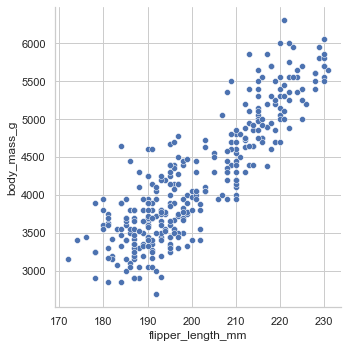

In [73]:
sns.relplot(kind="scatter", data=penguins_new, x="flipper_length_mm", y="body_mass_g")
plt.show()

- The plot below uses Seaborn's `regplot()` function to overlay a linear regression model on top of a scatter plot.  This is possibly (not guaranteed with reading documentation) the same linear model we will create later on.  It includes a "95% confidence interval for that regression".  Based on this wording and the narrowness of the light blue shading, I assume this is a 95% confidence interval for the mean of the fitted values.

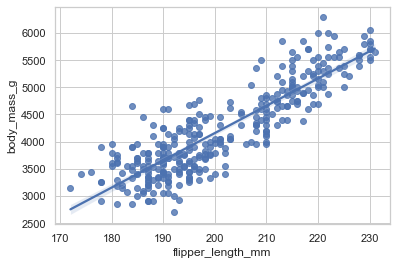

In [74]:
sns.regplot(data=penguins_new, x="flipper_length_mm", y="body_mass_g")
plt.show()

**3. Quantify strength of linear relationship by finding correlation**

- Based on the following statistic, we can say there is a high correlation
- We'll also square the correlation to calculate the R-squared.  For a simple linear model it should match the R-squared returned by the simple linear model later on.

In [75]:
correlation = penguins_new["flipper_length_mm"].corr(penguins_new["body_mass_g"])  # method="pearson" by default
print(f'The correlation is {correlation}.')

The correlation is 0.8729788985653613.


In [76]:
r_squared = correlation**2
print(f'The R-squared is {r_squared}.')

The R-squared is 0.7620921573403913.


**4. Find best fitting OLS linear model**

In [77]:
model = sm.OLS.from_formula("body_mass_g ~ flipper_length_mm", data=penguins_new)
results = model.fit()

**5. Check if residuals are normally distributed with histogram and Q-Q plot**

- Based on the following plots, it appears that results are normally distributed

In [78]:
penguins_new.insert(2, "fitted_values", results.fittedvalues)  

In [79]:
penguins_new.insert(3, "residuals", results.resid)

In [80]:
print(penguins_new)

     flipper_length_mm  body_mass_g  fitted_values   residuals
0                181.0       3750.0    3205.648453  544.351547
1                186.0       3800.0    3456.414782  343.585218
2                195.0       3250.0    3907.794176 -657.794176
4                193.0       3450.0    3807.487644 -357.487644
5                190.0       3650.0    3657.027846   -7.027846
..                 ...          ...            ...         ...
338              214.0       4925.0    4860.706229   64.293771
340              215.0       4850.0    4910.859495  -60.859495
341              222.0       5750.0    5261.932356  488.067644
342              212.0       5200.0    4760.399697  439.600303
343              213.0       5400.0    4810.552963  589.447037

[333 rows x 4 columns]


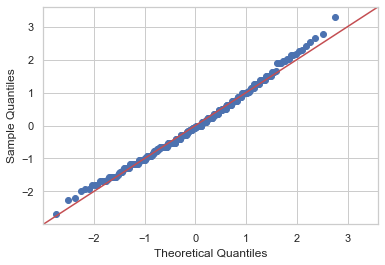

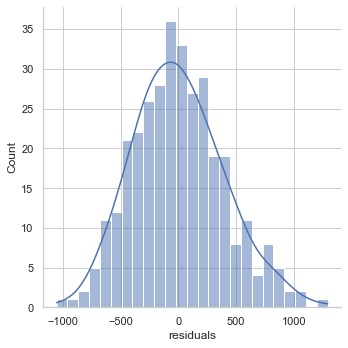

In [81]:
sm.qqplot(penguins_new["residuals"], fit=True, line="45")
sns.displot(kind="hist", data=penguins_new, x="residuals", bins=25, kde=True)
plt.show()

**6. Check homoscedasticity with residuals plot**

- The distribution of the residuals appears to be fairly heteroscedastic.  There may be a trend where flipper length around the mean tends to create more negative residuals than flipper lengths closer to the minimum and maximum.

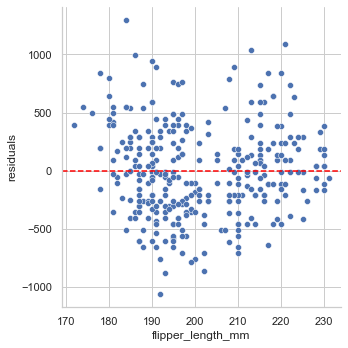

In [82]:
sns.relplot(kind="scatter", data=penguins_new, x="flipper_length_mm", y="residuals")
plt.axhline(color='red', ls='--')
plt.show()

**6. Interpret results**

- We've assumed IID data, checked conditions for using linear models, and created the linear model.  Let's interpret a few statistics in context.
- Slope
    - Sample statistic.  For every additional mm of flipper length there is, on average, a + 50.1533 g increase in penguin mass.  
    - Confidence interval.  We are 95% confident the slope is between 47.123 and 53.183.
    - Hypothesis test.  The slope has a two-sided p-value of 0.00.  At an alpha of 0.05 we reject the null that the slope is 0 (no correlation between variables) in favor of the alternative.  We are confident there is a correlation between penguin mass and flipper length.
- y-intercept of -5872.0927.  This y-intercept could be interpreted as, "A penguin with a flipper length of zero has a body mass of -5872". This is obviously ridiculous.  It also relies on extrapolation.  Here, the y-value has no biological meaning and simply adjusts the height of the regression line.
- R-squared of 0.762.  This is the same as the R-squared found above.  76.2% of the variation of penguin mass is explained by the linear model (by flipper length).

In [83]:
results_summary = results.summary()
print(results_summary)

                            OLS Regression Results                            
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          3.13e-105
Time:                        16:58:41   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.28

---

## Multiple Regression
- **Multiple (Linear) Regression**---*multiple* refers to there being multiple *predictor* variables
- The line function for multiple linear regression is: 
  - $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$
- The line function for multiple linear regression is estimated using sample data and the formula:
  - $\hat{y} = b_0 + b_1x_1 + b_2x_2 +...+b_nx_n$

---

### Changes from SLR

Multiple regression is very similar to simple linear regression. Smaller changes include:

1. Conditions must be checked for each explanatory variable.
    - Residual plots can be created for each explanatory variable. There are also other flavors of residual plots commonly used for multiple regression such as residuals vs fitted values.
1. Slight changes to interpretation of slope and y-intercept
    - **y-intercept**--value of y when all predictors are equal to 0, on average.
    - **Slope**--"*All else held constant*, for each 1 unit increase in x, we would expect y to be higher/lower on average by $b_1$".
1. Slight changes to confidence interval calculation and interpretation
    1. We do so for each slope, $b_i$
    1. We use dof = n - k - 1 to calculate the critical T-score 
    1. Slight difference in interpretation.  "We are `<CONFIDENCE_LEVEL>`% confident that, *all else being equal*, as the x-variable increases by one `<UNIT>`, the y-variable `<INCREASES OR DECREASES>` by `<LOWER_BOUND>, <UPPER_BOUND>` amount."
1. Slight changes to hypothesis testing calculation and interpretation
    1. We do so for each slope, $b_i$
    1. We use dof = n - k - 1
    1. The hypotheses for a single slope are:
        1. H~0~: $\beta_i = 0$ *when all other variables are included in the model*
        1. H~A~: $\beta_i \neq 0$ *when all other variables are included in the model*
1. When predicting fitted values we specify all the explanatory variables as inputs
- There are also some larger changes that we'll cover below:
    1. Idea of model hypothesis testing
    1. Possible inclusion of categorical variables
    1. Model selection if we do not 

---

### Model Hypothesis Testing
- In simple linear regression we did not look at hypothesis testing for the model on the whole.  Instead, we only looked at confidence intervals and hypotheses for the single slope.  With multiple slopes, we may want to perform hypothesis testing for the model on the whole.
- The hypotheses are:
    1. $H_0: \beta_1 = \beta_2 = ... \beta_k = 0$. All true slopes are equal to 0.  There is no correlation between any explanatory variable and the response variable.
    1. $H_A: \text{at least one } \beta_i \neq 0$.  At least one true slope is not 0. There is correlation between at least one explanatory variable and the response variable.
- When created with sample data, slope is a sample statistic, $b_1$
- It is similar to hypothesis testing with 3 or more means. P-values are calculated using an F-distribution like ANOVA tests.
- The F-test NOT yielding a significant result doesn't mean the individual variables included in the model are not good predictors of y, it just means that the combination of these variables doesn't yield a good model.
- The F-test yielding a significant result doesn't mean the model fits the data well, it just means at least one of the slopes is non-zero.  If we find that the p-value for the F-statistic is significant, we can continue on with confidence intervals and hypothesis tests for individual slopes.
- In the following example results table, we can see the F-statistic on the last row and the p-value at the bottom right

![](pictures/regression_multiple_results.jpg)

---

### Categorical Variables
- Categorical variables can be used as predictor variables
- A categorical variable can have 2 or more levels, but we'll look at an example with only 2
- **Indicator variable**--each level in this context is termed and "indicator variable"
- A categorical variable  with 2 levels will be labeled by us as 0 or 1
    - If x = 0, then $b_i * x_i$ is 0.  This level is not named in regression tables.  It is called the **reference level**.
    - If x = 1, then $b_i * x_i$ is $b_i$.  This $b_i$ is combined with the y-intercept.  So when x = 1, it moves the entire line up or down.  This level is named in regression tables.
    - Either way, the slope calculated from other continuous predictor variables is not affected.  Only the y-intercept is affected.
- The following image shows regression results for a model with four predictor variables.  *mom_iq* and *mom_age* are continuous.  *mom_hs:yes* and *mom_work:yes* are categorical.  Presumably, *mom_hs:no* and *mom_work:no* are the reference levels.  Reference levels are not shown.  These categorical coefficients would only change the y-intercept.

![](pictures/regression_multiple_results.jpg)

- The following chart shows two regression lines.  The response variable is book weight and the continuous explanatory variable is book volume.  These is also a categorical predictor variable with two levels, hardcover and paperback.  The levels move the line up or down.  It is reasonable to assume that paperback and hardcover books increase in weight at the same rate as volume increase after account for the volume of the covers.  It is reasonable to assume the lines have the same slope.

![](pictures/regression_categorical_interaction.jpg)

- **However, it is not always reasonable to assume that lines created with different levels would have the same slope.**
    - E.g. if our response variable was income, a continuous predictor was education, and a categorical predictor was gender with levels M and F.  As education increases income increases.  However, this rate may be lower for females than for males due to discriminatory workplace practices. The line slopes will be different for the different levels.
- In the image below a categorical variable with two levels (0 and 1) changes the relationship (slope) between the continuous variables x and y.

![](pictures/interaction_variable.png)

- **Interaction variable**--additional variables added to regression model to account for unequal slopes created by reference levels.  To correctly use categorical variables in regression models one must check to see if and interaction variable is needed.
- Lastly note that libraries that create regression models have default settings that control how they use different data types.  We may need to change our data type to ensure it is treated correctly in the model.
    - E.g. if one of the predictor variables was month of the year and the months were written as integers, the model may treat this data as numerical instead of categorical.  In R this means converting to factor data.  In Python this may mean converting to Pandas categorical data or it may entail adjusting parameters within regression functions.

---

## Model Selection
- While we have spent the most time on simple linear regression, most models have multiple predictor variables
- **Model selection**---identifying the best model for predicting a given response variable.  Model selection involves chooses which predictor variables to include in the model and the values of the predictor variable coefficients.
- **Full model**---the model with all possible predictor variables included
- **Parsimonious model**---a simpler model with fewer predictor variables included
- **Overfitting**--the more variables we add the better our model will fit the training data. However, if given new test data, this model may perform poorly.  Choosing parsimonious models reduces the chance of overfitting.   
    - E.g. if we added enough explanatory variables to a curvilinear model we could curve it to every data point in our training data.  Perfect fit!  Unfortunately, this model would do poorly when given new test data.  
- **Colinearity/multicolinearity**---high correlation between two predictor variables such that the two variables contribute redundant information to the model. Not good. Choosing parsimonious models reduce the chance of predictors being colinear.
- There are different methods used to choose the "best" number of predictor variables and the "best" fitting model.  Two considerations are:
    1. Criterion
    1. Algorithm

---

### Criterion

- **Criterion**---statistic of fit that measures the "best" model
- The criterion chosen may be determined by the type of regression one is performing
- There are various criterion that can be chosen, including:
    1. p-value (not really a good measure of fit)
    1. **Adjusted R-squared**---the standard R-squared statistic will increase with each explanatory variable added to the model, regardless of whether or not the added variable is a meaningful predictor of the response variable.  Adjusted R-squared applies a penalty for the number of predictors included in the model. Adjusted R-squared will only increase if the gains from adding the variable exceeds the penalty.  Adjusted R-squared leads to a more parsimonious model that reduces overfitting.
    1. **AIC (Akaike Information Criterion)**--applies a penalty for each additional variable like adjusted R-squared.  $AIC = -2*ln(likelihood) + 2*k$ where k=model dof and N is number of observations.
    1. **BIC (Bayes Information Criterion)**--applies a penalty for each additional variable like adjusted R-squared. $BIC = -2*ln(likelihood) + ln(N)*k$
    1. And more!

---

### Model Selection Algorithms

- Model selection algorithms include:
    1. **All Subset**---fit a separate least squares regression for each possible combination of predictors before choosing best model.  This is the simplest and is also guaranteed to find the best model fitting model as defined by the criterion.  Unfortunately, this does not work with a ton of predictors as this can become computationally intensive.  This is because the number of possible models = 2^(number of predictor variables).  E.g. 2^1 = 2...2^4 = 16...2^20 = 1,048,576.  For this reason we often must choose a different selection algorithm.  All the other algorithms employ strategies to find the best fitting model while not testing every combination.
    1. Stepwise methods
        1. **Forward Selection**---begins with no predictor variables and adds them in one at a time
        1. **Backwards Elimination**---begins with full model and removes predictor variables one at a time
        1. **Stepwise**---combination of forward selection and backwards elimination, which allows for the same predictor variable to be added or removed multiple times in the selection process
    1. Shrinkage
        1. Ridge Regression
        1. LASSO
        1. Elastic Net
    1. Dimensional Reduction
        1. PCA (Principal Components Analysis)
        1. PLS (Partial Least Squares)
    1. And many more!
- **Model averaging**--after defining a criterion and using a model selection algorithm to find the best fitting models we can combine a few of the better fitting models.  If all models included the same explanatory variables, this could be as simple as averaging the explanatory variable coefficients.
- Choosing the best criterion and model selection algorithm is a hot research topic.  It gets into mathematical theory and machine learning.  This is most important when we have many possible predictor variables and big data.
- Though commonly not the best performing, we'll go over two of the oldest and simplest model selection algorithms to get an idea of how it works.  We'll cover:
    1. Forward selection
    1. Backwards elimination

**Forward Selection**

- The general idea behind forward-selection is to start with only one predictor/explanatory variable and add one variable at a time until the ideal model is reached.   We'll use the adjusted R-squared criterion below.
    1. Try all possible simple linear regression models predicting y using one predictor variable at a time
    1. Keep the model with the highest adjusted R-squared
    1. Try all possible models adding one more explanatory variable at a time
    1. Keep the model with the highest adjusted R-squared
    1. Repeat until maximum possible adjusted R-squared is reached.  Stop when adding predictor variables decreases the adjusted R-squared.

**Backwards Elimination**

- The general idea behind backward-selection is to start with the full model and eliminate one predictor/explanatory variable at a time until the ideal model is reached.  We'll use the adjusted R-squared criterion below.
    1. Start with the full model
    1. Try all possible models omitting one explanatory variable at a time
    1. Keep the model with the highest adjusted R-squared
    1. Repeat until maximum possible adjusted R-squared is reached.  Stop when removing predictor variables decreases adjusted R-squared.

---

## Training and Testing

- **Model training**--use computer algorithm to build (define) model.  For simple linear models, creation actually occurs in one step.  However, most models building occurs iteratively.  A computer algorithm tries a function, calculates error, adjusts function, calculates error, etc., until the function with the least error is found for the given data set.  The model gets better over time.
- **Training dataset**--the dataset a computer algorithm uses to build a model.  Datasets made of observations/records/rows.
- If we only want to describe the historical relationship between the response variable and the predictor variable we  could use all our observations in training. This would give us the most accurate model to describe our dataset.
- However, most of the time we want to be able to predict the response variable from the explanatory variable in the future. 
- **Testing** is the statistical assessment of a models accuracy with new input data.
- **Testing dataset**--observations set aside for testing.  These are not used in training
- There are two rules for testing and training:
    1. Each observation can either be used to train the model or test the accuracy of model, but NOT both
    1. We can use an observation as many times as you like for training, but can only use it once when testing the model. As soon as we start using an observation multiple times for “testing” (after which we adjust model) we are essentially using it for “training”.
- For these reasons often times about 60% of data goes into training, 20% goes into a query set for manual human data exploration/model tweaking, and 20% is held back for testing the model(s) generated.  This is a rough guideline and percentages vary dramatically based on dataset size.

---

### Coverage probability
- **Coverage probability**--proportion of times that an interval contains the true value of interest
- When confidence or prediction intervals are constructed, we set a confidence level.  This confidence level is theoretical coverage probability, sometimes called the "nominal coverage probability".
- Steps to test models with coverage probability include:
    1. Divide data into training dataset and testing dataset
    1. Train model with training dataset
    1. Calculate prediction interval
    1. Use training dataset to calculate proportion of observed (actual) y-values that fall within the prediction interval. This is the coverage probability.  For a 95% prediction interval this should be about 0.95.
    1. Use testing dataset with the original model to calculate coverage probability.  If it is still around the prediction level, e.g. 0.95,  our original model is performing well with the new test data.  We have avoided overfitting our model.  

---

# Bayesian Inference

---

## Introduction
- **Inference**---randomly sample population, estimate population parameters, calculate uncertainty in population parameter estimates, and answer hypotheses.  Used when we do NOT already know population parameters.
- **Bayesian**---school of statistical inference that defines probability as a subjective degree of belief

---

## Conditions

- Bayesian inference relies on the same conditions as frequentist inference for study design and sample collection

---

## Frequentist vs Bayesian

---

### Frequentist
- Characteristics:
    1. Construct *confidence* intervals
    1. Uses null hypothesis, alternative hypothesis, and p-value
    1. Interpret *confidence* intervals and p-value using concept of repeated experiments
    1. Dominated statistical practice *during* the 20th century
    1. Tends to be less computationally intense
- Cons:
    1. *Confidence* intervals NOT interpreted as probability of true population parameter being in constructed *confidence* interval
    1. p-value NOT interpreted as the probability that a hypothesis is true.  Frequent misinterpretation of p-values.
    1. Experiments must be fully specified before analysis
- Pros:
    1. *Confidence* intervals are objective and simple to calculate
    1. All statisticians will calculate the same p-value for a given data set.  By first deciding on acceptable Type 1 and Type 2 errors researchers can decide to objectively accept or reject the null hypothesis based on the p-value.
    1. Simpler mathematics and more commonly taught in the U.S. education system

---

### Bayesian
- Characteristics:
    1. Use prior probabilities and likelihood of observed data
    1. Construct *credible* intervals
    1. Can have many hypotheses
    1. Interpret *credible* intervals and hypotheses using concept of probability
    1. Dominated statistical practice *before* the 20th century
    1. May be computationally intense
- Cons:
    1. Priors are subjective.  Different statisticians will use different methods to pick priors.  This will affect posterior probabilities unless there is larger sample size.
    1. More complicated mathematics and less commonly taught in U.S. education system
    1. Some have a philosophical objection to assigning a probability to a hypothesis.  They argue a hypothesis should either be true or false. 1 or 0.
- Pros:
    1. *Credible* intervals interpreted as probability of true population parameter being in constructed *credible* interval
    1. Posterior probabilities interpreted as probability that hypothesis is true.  This may be the most important interpretation for decision making.
    1. As data comes in, able to update priors and in turn update posterior probabilities

---

## Big Picture Workflow
- The big picture workflow is:
    1. **Prior probability**: guess what the true population parameter is before seeing sample data.  Subjectively give guesses a probability of being correct.
    1. **Likelihood**: calculate likelihood of observing our sample data given our guesses of the population parameter
    1. **Posterior probability**: calculate probability of guesses being correct by combining the prior and the likelihood.
    1. **Update**: when new data is collected, repeating previous steps
    
![](pictures/bayesian_statistics.png)

- The Bayesian inference workflow differs depending on whether we use a discrete prior or a continuous prior.
    1. **Discrete prior**--state multiple hypotheses which each guess the true population parameter.  Then, subjectively assign probability of hypothesis being true.  Do this for each hypothesis.  These probabilities are our prior probabilities.
        - E.g. population parameter is proportion of country vaccinated.  H_1: population proportion = 0.3. H_2: population proportion = 0.5.  H_3: population proportion = 0.9. We subjectively assign prior probabilities as such: P(H_1) = 0.333, P(H_2) = 0.333, and P(H_3) = 0.333. I.e. before seeing data we think it is equally probable that the population proportion could be 0.3, 0.5, or 0.9.
    1. **Continuous prior**--our single hypothesis is that the true population parameter could be any value along a number line.  Our prior is in the form of a probability density function.  The x-axis contains potential values of the population parameter and the y-axis contains probability density of those values actually being the true population parameter.  These probabilities densities are subjective.
        - E.g. population parameter is country mean height in inches.  Our hypothesis is that is could take any value along the x-axis.  Our prior is $N(\mu=7'10", \sigma=5")$, indicating that we think it is most probable that our mean population height is 7'10".  We do think it could be other heights as well, but as they get further from 7'10" we think it is less probable.
        
- The image below shows how a continuous prior and the likelihood are combined to form a continuous posterior:

![](pictures/bayesian_example.png)


---

## Discrete Prior

---

### Discrete Workflow

1. Set hypotheses. Hypotheses are statements involving the population parameter.
1. **Prior**---P(hypothesis).  Subjectively assign probability of hypothesis being true to each hypothesis.  Prior probabilities add up to 1. Take into account past studies and subjective opinion. We may have no clue and decide to give each hypothesis an equal probability of being true to start with.
1. **Likelihood**---P(data|hypothesis).  Take the population parameter in a hypothesis.  Use this parameter to create a theoretical probability distribution.  Calculate the probability of observing the sample statistic.  This is the probability density, which is the height of the probability distribution at a specified value. Because the probability density at our sample statistic depends on the probability distribution created by the parameter in the hypothesis, we can define likelihood as P(data|hypothesis). Repeat for each hypothesis.
1. **Posterior**---P(hypothesis|data).  Use Bayes's rule to calculate the probability of hypothesis being true given our observed sample data. Repeat for each hypothesis.  Posterior probabilities add up to 1.  In a nutshell, we mash together our prior and our likelihood to get a posterior.
1. Update.  When new data is collected, repeat previous steps

---

### Elicitation
- **Elicitation**---choosing a prior for hypotheses.  There are two easy rules for elicitation:
  1.  Don't set the prior for a hypothesis to 0.  If the prior is 0, the posterior is always 0.  This means that the data have no influence on the answer we get.
  1. Don't set the prior for a hypothesis to 1.  If the prior is 1, the posterior is always 1.  This means that the data have no influence on the answer we get.

---

### Bayes's Rule
- Also called Bayes's theorem
- In the *Probabilities* section we showed the General Multiplication Rule, Marginal Probabilities, Conditional Probabilities, and Joint Probabilities.  Bayes's rule ties these concepts together.  For a categorical variable with two discrete events, Bayes's rule can be rearranged with algebra and written in multiple ways.
    1. $\text{Bayes's theorem} = P(A|B) = \frac{\text{P(A  AND  B)}}{P(B)}$
    1. $\text{Bayes's theorem} = P(A|B) = \frac{\text{P(B|A) x P(A)}}{P(B)}$
    1. $\text{Bayes's theorem} = P(A|B) = \frac{\text{P(B|A) x P(A)}}{\text{P(B|A) x P(A)  +  }P(B|A^c) \text{ x }P(A^c)}$
- We usually use the longest formula because we often don't know the P(B)
- When we apply Bayes's rule to hypothesis testing with two discrete hypotheses:
    - A = hypothesis = H
    - A^c = complement hypothesis = H^c.  When there are two discrete hypotheses, the complement hypothesis is just the other hypothesis.
    - B = data = D
    - $P(H|D) = \frac{P(D|H)P(H)}{P(D|H)P(H)  +  P(D|H^c)P(H^c)}$
- Bayes rule can be used with three discrete events, event A~1~, event A~2~, and event A~3~:
    - $\text{Bayes's theorem} = P(A_1|B) = \frac{P(B|A_1)P(A_1)}{P(B|A_1)P(A_1)  +  P(B|A_2)P(A_2) + P(B|A_3)P(A_3)}$
- When we apply Bayes's rule to hypothesis testing with three discrete hypotheses:
    - A~1~ = hypothesis~1~ = H~1~
    - A~2~ = hypothesis~2~ = H~2~
    - A~3~ = hypothesis~3~ = H~3~
    - B = Data = D
    - $\text{Bayes's theorem} = P(H_1|B) = \frac{{P(B|H_1)P(H_1)}}{P(B|H_1)P(H_1)  +  P(B|H_2)P(H_2) + P(B|H_3)P(H_3)}$
- We can see how this could be adapted to four or more discrete events by adding terms in the sum in the denominator
- For continuous hypotheses, the sum in the denominator actually gets replaced with an integral
- Either way, the denominator is said to be a "normalizing" value that makes every P(H|D) between 0 and 1.  It also ensures that if we calculate P(H|D) for each hypothesis and sum the answers, then this totals 1.
- We can now define key terms in the context of Bayes's rule:
    1. **Prior probability**---P(A) = P(hypothesis) = P(H)
    1. **Likelihood of the data**---P(B|A) = P(data|hypothesis) = P(D|H)
    1. **Posterior probability**---P(A|B) = P(hypothesis|data) = P(H|D)

---

### Frequentist Example
- In the frequentist inference section above we noted that we could have used an "exact" method to create the null sampling distribution for proportions.  This is done with the binomial distribution.  The binomial distribution can use a population proportion (here we use p~0~), the number of trials (here we use sample size), and the number of successes.  By carefully selecting  the number of successes we can actually calculate the probability of getting results at least as extreme as our observed sample statistic.  This is the p-value.
  - Note that in many binomial examples they use one-sided hypothesis tests.  This is because two-sided tests are more complicated.  Because the binomial distribution is not symmetrical, we can not just double a one-tail proportion.  There are actually a few ways to go from a one-sided to a two-sided p-value with the binomial distribution.
- **Prompt**--We have a population of M&Ms, and in this population the percentage of yellow M&M’s is either 10% or 20%. We have been hired as a statistical consultant to decide whether the true percentage of yellow M&Ms is 10% or 20%.  
- In frequentist inference we must set one of these as H~0~.  We'll choose H~0~ = 10%.   We know the M&M population proportion of yellow will not be less than 10%, so we'll choose a one-sided hypothesis.
    1. H~0~: p = 10% yellow M&Ms
    1. H~A~: p > 10% yellow M&Ms
- Significance level = $\alpha$ = 0.05
- Observed sample data has 1 yellow out of 5 M&Ms.  Using binomial distribution symbology, k = 1 and n = 5.
- The p-value is by definition the probability of getting data at least as favorable to the alternative hypothesis as the observed sample data.  Getting  1 or more yellows when choosing 5, lines up with the alternative hypothesis of p > 10% yellow.
- p-value: P(k >= 1| n = 5, p = 0.10).

In [84]:
# Input parameters
k_start = 1
k_end = 5
my_n = 5
my_p = 0.10

binomial_object = stats.binom(n=my_n, p=my_p)

# Calculate probability with for loop and PMF
probability = 0
for k in range(k_start, k_end + 1):
    probability += binomial_object.pmf(k)

print(
    f"The p-value is {probability}.  We do not need to double anything as this is a one-tailed hypothesis."
)

The p-value is 0.40951.  We do not need to double anything as this is a one-tailed hypothesis.


- With a p-value of 0.41, we fail to reject the null hypothesis.  We stick with the belief yellow M&Ms are 10% of the population.

---

### Bayesian Example
- **Prompt**--same as above
- In Bayesian inference we do NOT have a H~0~.  We can consider multiple hypotheses at once.
    1. H~1~: p = 10% yellow M&Ms
    1. H~2~: p = 20% yellow M&Ms

**Prior**

- Prior: P(H~1~) = 0.50, P(H~2~) = 0.50.  We initially don't have any idea if one hypothesis is better than the other so we give each 50% probability.
- Observed sample data has 1 yellow out of 5 M&Ms.  Using binomial distribution symbology, k = 1 and n = 5.

**Likelihood**

- Likelihood is calculated using the binomial distribution
- For H~1~: p = 10% yellow M&Ms
- For H~2~: p = 20% yellow M&Ms

- Likelihood
    1. H~1~ = 0.33
    1. H~2~ = 0.41

In [85]:
# Input parameters
my_k = 1
my_n = 5
my_p = 0.1

binomial_object = stats.binom(n=my_n, p=my_p)
my_prob = binomial_object.pmf(my_k)


print(f"Using the binomial distribution, we can calulate the likelihood of P(k = 1 | H1) = {round(my_prob, 2)}.")

Using the binomial distribution, we can calulate the likelihood of P(k = 1 | H1) = 0.33.


In [86]:
# Input parameters
my_k = 1
my_n = 5
my_p = 0.2

binomial_object = stats.binom(n=my_n, p=my_p)
my_prob = binomial_object.pmf(my_k)

print(f"Using the binomial distribution, we can calulate the likelihood of P(k = 1 | H2) = {round(my_prob, 2)}.")

Using the binomial distribution, we can calulate the likelihood of P(k = 1 | H2) = 0.41.


**Posterior Probability**

- Posterior probability is calculated using Bayes's rule
- $\text{P(hypothesis|data)} = \frac{\text{P(data|hypothesis) x P(hypothesis)}}{\text{P(data|hypothesis) x P(hypothesis)  +  P(data|complement hypothesis) x P(complement hypothesis)}}$
- For H~1~
  - P(hypothesis) = P(H~1~) = prior = 0.5
  - P(data|hypothesis) = likelihood = 0.33
  - P(complement hypothesis) = P(H~2~) = 0.5
  - P(data|complement hypothesis) = likelihood of H~2~ = 0.41
- For H~2~
  - P(hypothesis) = P(H~2~) = prior = 0.5
  - P(data|hypothesis) = likelihood = 0.41
  - P(complement hypothesis) = P(H~1~) 0.5
  - P(data|complement hypothesis) = likelihood of H~1~ = 0.33

In [87]:
prior = 0.5
like = 0.33
prior_comp = 0.5
like_comp = 0.41

posterior_prob = (like * prior) / (like * prior + like_comp * prior_comp)

print(f"The posterior probabilitiy for H~1~ is {round(posterior_prob,2)}")

The posterior probabilitiy for H~1~ is 0.45


In [88]:
prior = 0.5
like = 0.41
prior_comp = 0.5
like_comp = 0.33

posterior_prob = (like * prior) / (like * prior + like_comp * prior_comp)
print(f"The posterior probabilitiy for H~2~ is {round(posterior_prob,2)}")

The posterior probabilitiy for H~2~ is 0.55


- Posterior probabilities
  - H~1~ = 0.45.  There is a 45% probability that the true population parameter is 10% yellow M&Ms.
  - H~2~ = 0.55.  There is a 55% probability that the true population parameter is 20% yellow M&Ms.
- Using Bayesian inference we would choose the higher probability hypothesis.  This is H~2~, P(yellow = 20%).
- Using frequentist inference we failed to reject the H~0~,  P(yellow = 10%).  However if we switched 10% and 20% yellow between H~0~ and H~A~, we would come to the opposite conclusions.  This shows that **frequentist method is highly sensitive to the null hypothesis**.
- We can also look at what would happen if we use the same sample proportion of yellows, 20%, but used a larger sample size.  **As sample size increases, the likelihood becomes more important and the prior becomes less important (as long as no priors are 0 or 1)**.

![](pictures/bayesian_prop_ex.jpg)

---

### Updating Priors Example
- We'll show a probability tree similar to the one first introduced in *Probability*.  The difference is that the first one used HIV data from Botswana while this one will use HIV data from the U.S. in the early 1980s.  The goal is to find the probability of truly having HIV given a positive HIV test result. P(Truly having HIV | + test result).  We'll shorten this to P(HIV | +).  We'll then repeat this process after updating our prior.  Updating our prior after learning new information is unique to Bayesian inference.

1. Prior Probability
    - P(A).  P(hypothesis). P(HIV).
    - The tree first splits based on whether or not an individual has HIV.  This true rate for the U.S. population at the time was estimated to be 0.00148.  Without any further data, this would be our best guess for the probability that an adult truly has HIV. 
    - P(HIV) =  0.00148
1. Likelihood
    - P(B|A).  P(data | hypothesis). P(+ | HIV).
    - The tree then splits based on whether an HIV test would return a positive or negative result given an individual truly has HIV or not.  These are rates of true positives (sensitivity), true negatives (specificity), false negatives, and false positives. 
    - P(+ | HIV) =  0.93
1. Posterior Probability
    - P(A|B).  P(Hypothesis | Data).  P(HIV | +).
    - In the *Probabilities* section we mostly focused on calculating joint probabilities,  P(A AND B), by multiplying the prior and the likelihood together.  This is the general multiplication rule.  We now use Bayes's rule to find P(A|B).
    - The numerator is the joint probability, P(HIV AND + ), which can be written as:
      - P(+ | HIV) x P(HIV) = (0.93) x (0.00148) = 0.0013764 
    - The denominator is P(B).  This is the probability of a + test result, which could be from someone who truly has HIV (Hypothesis) or be a false positive from someone who does not truly have HIV.  Not having HIV is our "complement hypothesis".  It could also just be written H~2~.  Regardless, the denominator is the sum of these joint probabilities.  This can be written as: 
      - P(+ | HIV) x P(HIV) + P(+ | HIV^c^) x  P(HIV^c^) = (0.93) x (0.00148) + (0.01) x (0.99852) = 0.01136.
    - P(HIV | +) = 0.0013764/0.01136 = 0.12.  There is a 12% probability of truly having HIV give the data.  This is after 1 positive test result.  But what if we test again?

![](pictures/prob_tree_hiv_2.jpg)

4. Updating Prior
    -  Let's test a second time.  Now our best guess (prior) for whether they have HIV is 0.12.  This is called *updating the prior*.  We'll use this prior and data from the second test to calculate a new posterior probability.
    - After updating we repeat the tree process.  The HIV test has not changed so we use the  same likelihoods.  Next we multiply across to find joint probabilities.  Lastly we use the joint probabilities in  Bayes's rule to calculate our posterior probability.
    - Below we see that the P(Truly having HIV | + HIV test) is now 0.93.  This is after incorporating data for 2 positive test results.
    
![](pictures/prob_tree_hiv_3.jpg)

---

### Bayes Factor
- When deciding between hypotheses we often simply choose the hypothesis with the highest probability.  However, we can also incorporate the idea of Bayes factor into our choice of hypotheses.
- **Prior odds**---ratio of the prior of one hypothesis to another
  - O[H~1~ : H~2~] = $\frac{P(H_1)}{P(H_2)}$
- **Posterior odds**---ratio of the posterior of one hypothesis to another
  - O[H~1~ : H~2~] = $\frac{P(H_1|D)}{P(H_2|D)}$
- **Likelihood odds**---ratio of likelihood of one hypothesis to another.  This is the **Bayes factor**.

![](pictures/bayes_factor.jpg)

- Bayes factor ignores the prior and only takes into account the sample data
- Bayes factor compares two hypotheses.  Because of this, Bayes factor can be used in null hypothesis testing using Bayesian methods.
- The order we write the two hypotheses matter. A Bayes factor above one indicates that the data supports the hypothesis in the numerator.  A Bayes factor below one indicates that the data supports the hypothesis in the denominator.

---

## Continuous Prior
- A continuous prior is almost like imagining each point on the number line is a hypothesis (infinitely many hypotheses).  The x-axis shows the population parameter defined by the hypotheses, while the y-axis shows the probability density of the hypotheses being true.  In the following example we can see how having a bunch of discrete hypotheses starts to look like a continuous prior.

![](pictures/bayesian_discrete_to_continuous.jpg)

- A continuous prior probability distribution leads to a continuous posterior probability distribution
- The following graphs shows how the posterior is a combination of our prior and likelihood, just like it is for discrete hypotheses:

![](pictures/bayesian_example.png)

![](pictures/prior_likelihood_posterior_graph.jpg)

- We won't go through any example problems for continuous prior, but instead introduce some big picture ideas

---

### Beta and Gamma
- Beta and gamma distributions are commonly used in Bayesian statistics

**Beta Distribution**

![](pictures/beta_distribution.jpg)

- Note that when alpha = beta = 1 it forms a uniform distribution.  The uniform distribution is a special case of the beta distribution.
- Mean = $\frac{\alpha}{\alpha + \beta}$

**Gamma Distribution**

- Note that the gamma distribution uses continuous non-negative numbers
- Note that sometimes people use different parameters.  $\alpha$ and $\beta$ are often used instead of k and $\theta$.

![](pictures/gamm_distribution.jpg)

- Mean = $k\theta$
- SD = $\theta\sqrt{k}$

---

### Elicitation
- **Elicitation**---choosing a prior for hypotheses.  
- Note that if we set a "weak" or "uninformative" prior, our prior has a weaker influence on the posterior.   Our observed data (represented by the likelihood) has a larger impact on the posterior.  It is perfectly fine to have a "weak" prior.  In many cases it is actually preferred as our data has a greater impact on the posterior.
- Note that if we set a "strong" or "informative" prior, our prior has a stronger influence on the posterior.  Our observed data (represented by the likelihood) has a lesser impact.

![](pictures/prior_weak_strong.jpg)

- **Reference Prior**---pre-defined prior we can use when we do not have information to base our prior on.  They are priors created by others that work well for certain circumstances.

---

### Conjugate Prior
- **Conjugacy**---when the posterior distribution has the same distribution type (normal, binomial, etc.) as our prior distribution, but with new parameters.  
- When the prior and posterior are conjugate, we can compute the denominator in Bayes's rule *without* calculus.  This was super important before fast computers.
- **Conjugate Family**---conjugacy only occurs when the population data (and thus the likelihood) belongs to certain distribution types and the prior distribution belongs to certain distribution types. A combination of population and prior distribution types that lead to conjugacy is called a conjugate family.  We'll explore four conjugate families, but there are many more.
    1. **Beta-binomial**.  When the population (and thus the likelihood) is a binomial distribution and the prior is a beta distribution. This allows us to calculate the posterior probability distribution without calculus.  It is simply $α + x$ and $β + n - x$, where x is the number of successes and n is the sample size of our observed data.  $\alpha$ and $\beta$ are the parameters of the beta function.
        - E.g. We have a prior expressed as beta distribution with parameters $\alpha$ = 3 and $\beta$ = 2.  We play 5 games of poker and win 4 of them.  $\alpha$ = 3 + 4 = 7.  $\beta$ = 2 + 5 - 4 = 3.  Our posterior distribution is still a beta distribution but with the new parameters $\alpha$ = 7 and $\beta$ = 3.
    1. **gamma-Poisson**.  When the population (and thus the likelihood) is a Poisson distribution and the prior is a gamma distribution.  This allows us to calculate the posterior distribution without calculus.  The posterior gamma parameters are $k^* = k + \sum x_i$ and $\theta^* = \frac{\theta}{n\theta + 1}$.  $x_i$ represents all the observed sample values in the Poisson distribution.  $n$ represents the the number of time intervals that have elapsed while collecting the sample values.
        - E.g. We have a prior expressed as a gamma distribution with parameters k = 9/16 and $\theta$ = 4/3.  Our observed data sample size is 300 and the sum of all our observed values is 200.  K* = (9/16) + 200 $\approx$ 200. $\theta$* = (4/3) / (300 x (4/3) + 1) = 0.0033.
    1. **Normal-Normal**.  When the population (and thus the likelihood) is a normal distribution and the prior is also a normal distribution.  We do not need to know the population mean, but do need to know the population standard deviation.  For this reason, the normal-normal family is not as useful as it initially seems. However, if we know $\sigma$, then we can calculate the posterior distribution without calculus.  We use $\mu$ and $\sigma$ for the parameters of the population distribution.  We use $\nu$     (nu) for the self-elicited (subjectively chosen) mean of the prior distribution and $\tau$ (tau) for the self-elicited standard deviation of the prior distribution. The posterior normal parameters are then $\nu^* = \frac{\nu\sigma^2 + n\bar{x}\tau^2}{\sigma^2 + n\tau^2}$ and $\tau^* = \sqrt{\frac{\sigma^2\tau^2}{\sigma^2 + n\tau^2}}$
        - E.g. a population has an unknown $\mu$ and $\sigma$ = 0.2  Prior has $\nu$ = 10 and $\tau$ = 2.  Observed sample data is a sample size of 5 and an average of 10.5.  We'll calculate the nu and tau of the posterior normal distribution.
      - $\nu^* = \frac{(10)(0.2)^2 + (5)(10.5)(2)^2}{0.2^2 + (5)(2)^2} = 10.499$
      - $\tau^* = \sqrt{\frac{(0.2)^22^2}{0.2^2 + (5)(2)^2}} =0.089$
    1. **Normal-gamma**.  When the population (and thus the likelihood) is a normal distribution and the prior is a gamma distribution.  This is used when we do NOT know the population mean and do NOT know the population standard deviation.  This allows us to calculate the posterior distribution without calculus.  Formulas get more complex with lots of hyperparameters.
- **Hyperparameters**---term used to describe the parameters of the prior and posterior distributions in conjugate pairs.  Term invented to reduce confusion when talking about the population parameters.

---

### Non-Conjugate Prior
- Conjugacy allows us to calculate posterior probabilities without using calculus for certain situations.  Unfortunately, not every computation of Bayes's rule is possible with conjugate pairs.  Before computers we were SOL.  Now there are more advanced computer assisted methods.
- **JAGS**---stands for Just Another Gibbs Sampler.  Computer assisted method to calculate posterior probabilities.  Written with BUGS (Bayesian Using Gibbs Sampling) language syntax.  Uses Markov chain Monte Carlo (MCMC) methods.  It  It can be run in R with packages like `R2jags`.
- **Stan**---computer assisted method to calculate posterior probabilities. Written with Stan language syntax.  Uses Markov chain Monte Carlo (MCMC) methods and well as a few others.  It can be run in R with packages like `Rstan`.  Newer program that may do better than JAGS for complex methods.
- **Monte Carlo Markov chain (MCMC)**---computational algorithm that relies on repeated random sampling to calculate results and their probabilities

---

### Credible Intervals
- Analogous to frequentist confidence intervals
- Allows us to say, "There is a `<CREDIBLE_LEVEL>`% probability that the true population parameter is in the credible interval."
- Credible intervals can be created when we use a continuous hypothesis.  We find the posterior distribution using a conjugate prior or a non-conjugate prior.  Next we shade an interval under the curve that captures `<CREDIBLE_LEVEL>`% of the data.  This is similar to creating a bootstrap confidence interval.
- There are two types of credible intervals:
    1. **Equal Tails**---method of finding credible interval where we we require equal probability in both tails.  For a 95% credible interval there would be 2.5% probability in the lower tail and 2.5% probability in the upper tail.
    1. **HPD**---highest posterior density. We position the credible interval more directly over the area of the probability distribution with the highest probability density.  This returns the narrowest credible interval possible.  HPD is preferred over equal tails for this reason.

![](pictures/credible_interval_hdp.jpg)

---

# More to Explore
- We have provided a broad background in many subfields of statistics, yet there is always more to learn.  A few primary areas we could explore in the future include:
    1. Study design and data interpretation for complex random sampling methods
    1. Simulation based frequentist inference
    1. Multiple linear, polynomial, and logistic regression
    1. Bayesian inference

---